# FLUX DE CALOR LATENTE

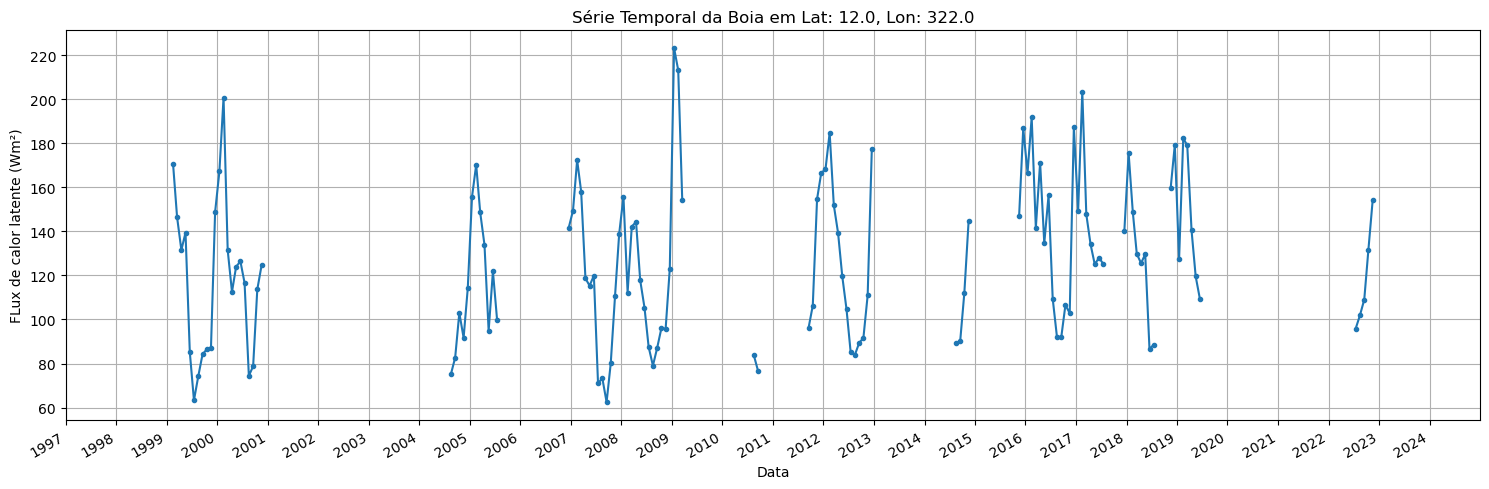

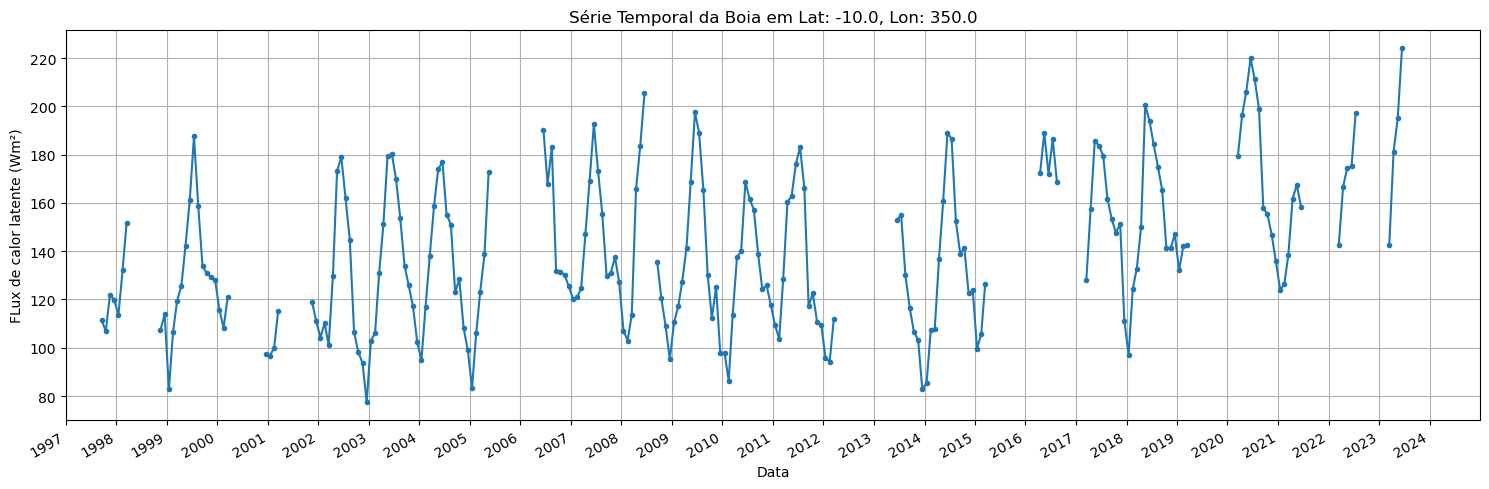

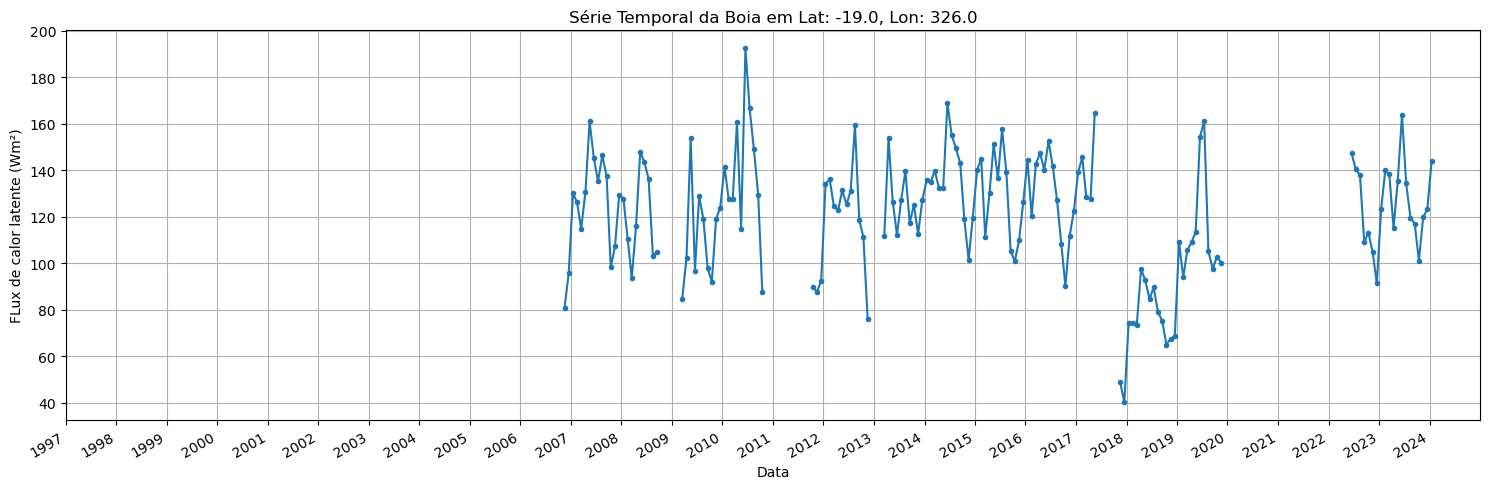

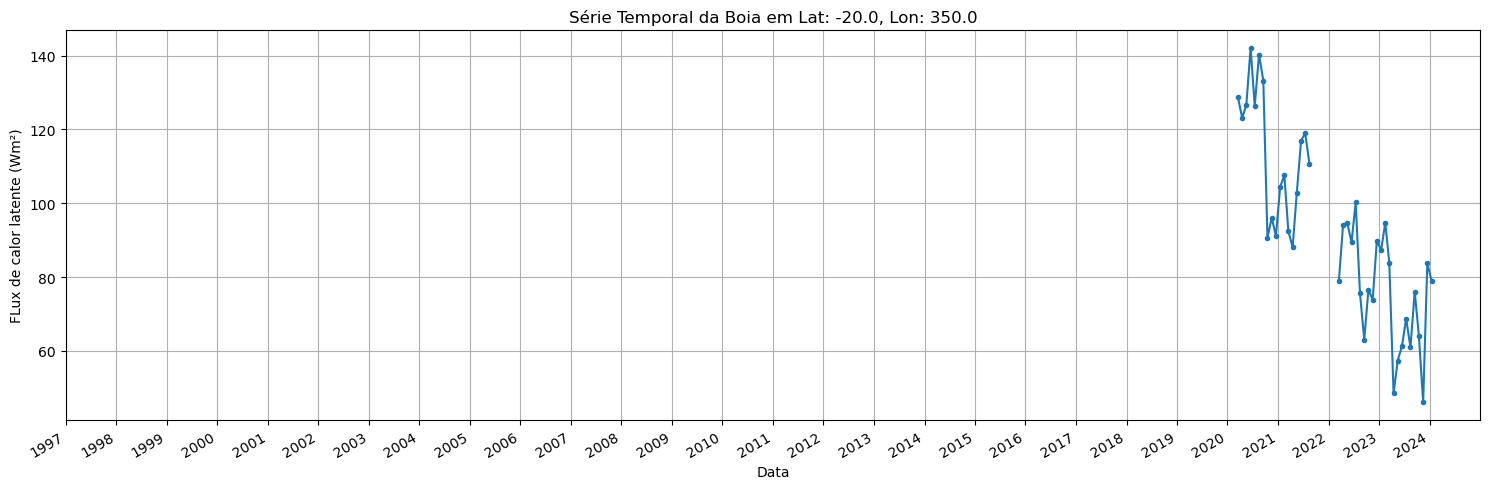

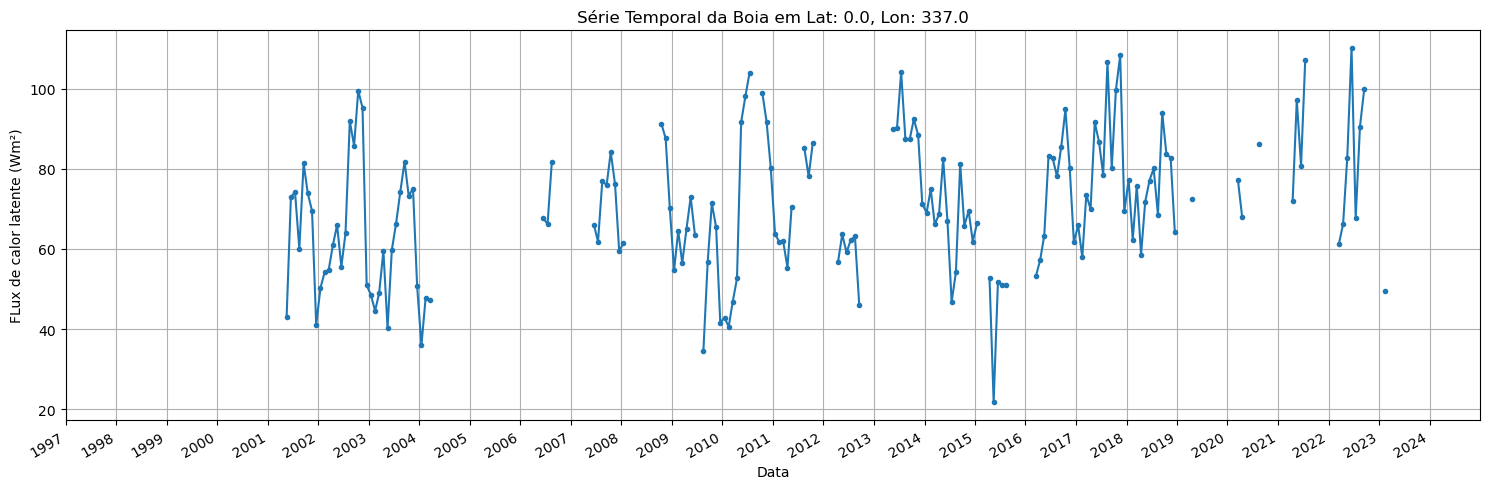

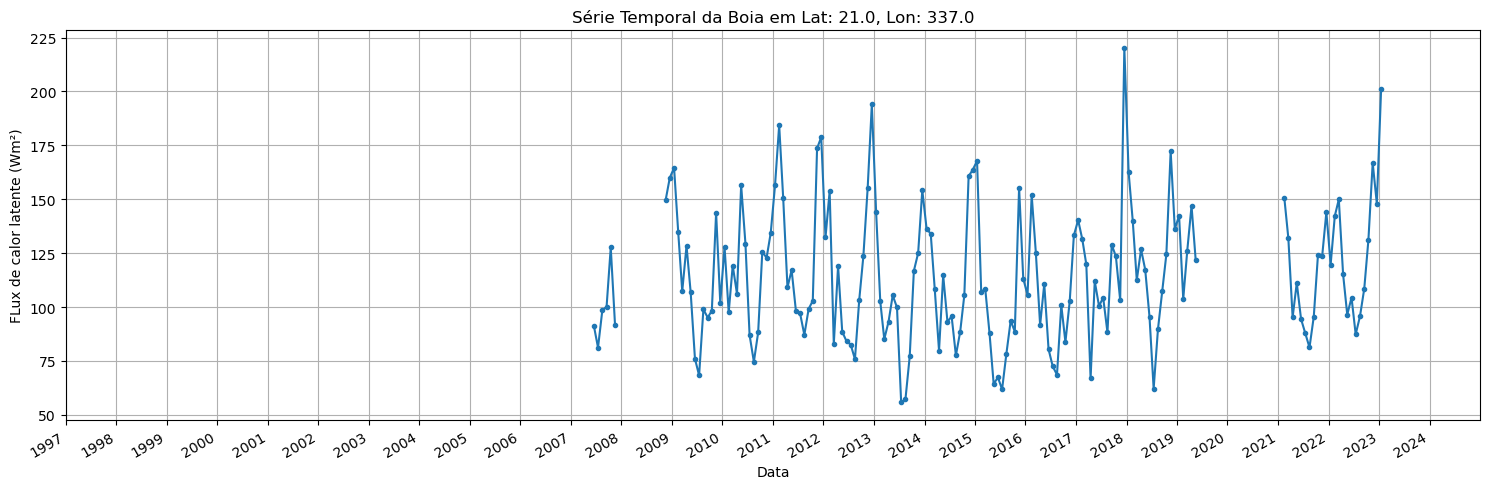

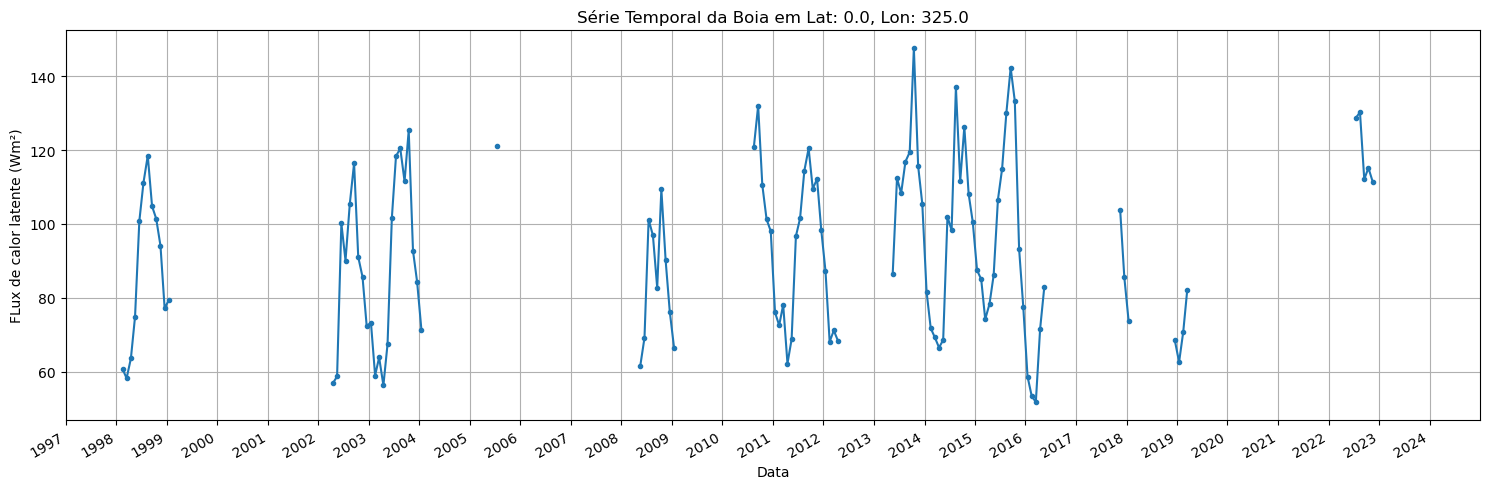

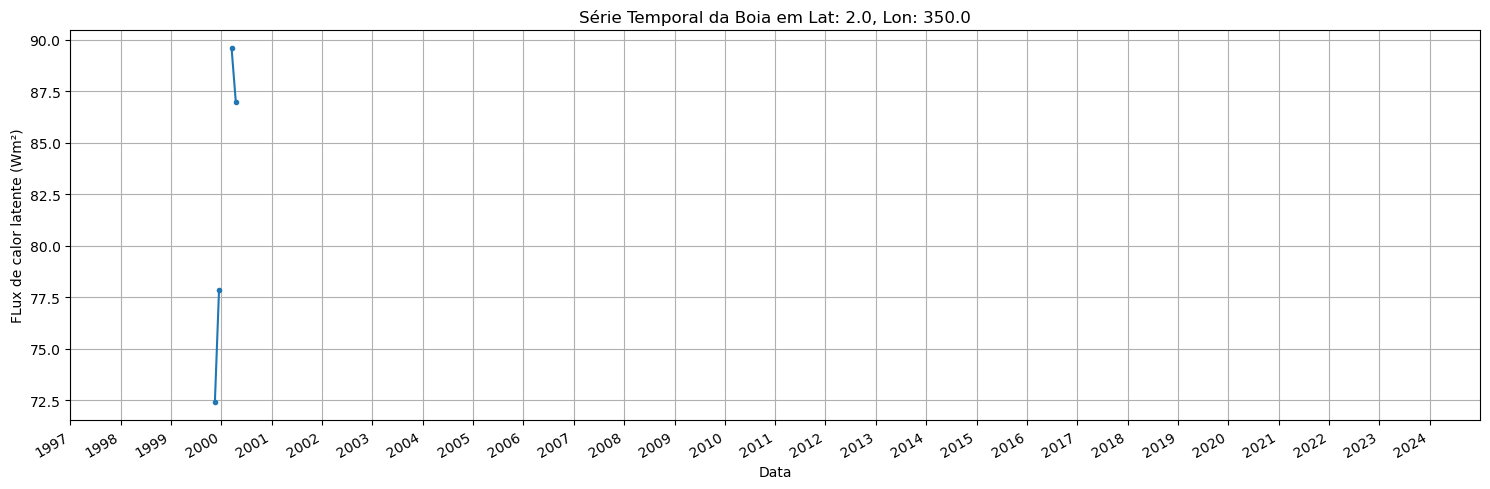

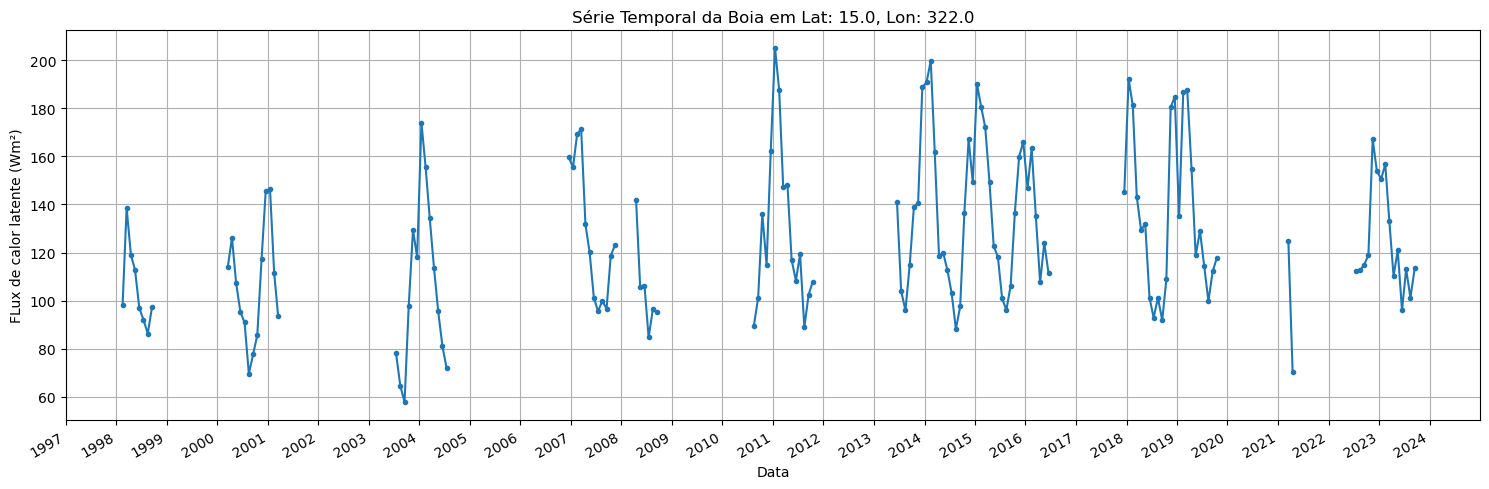

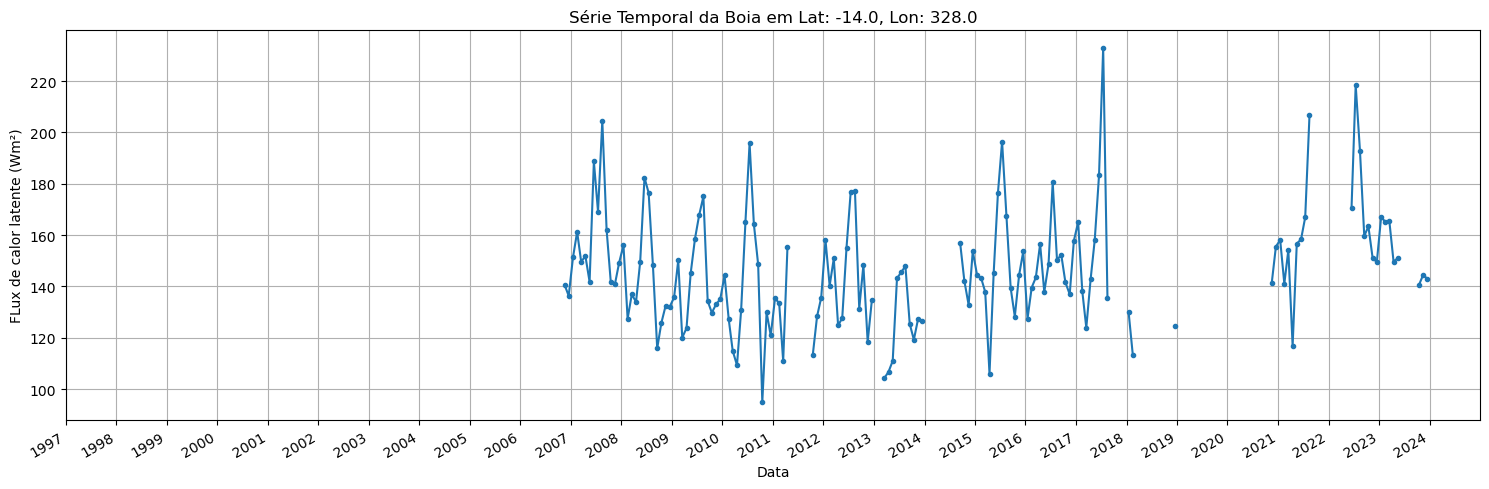

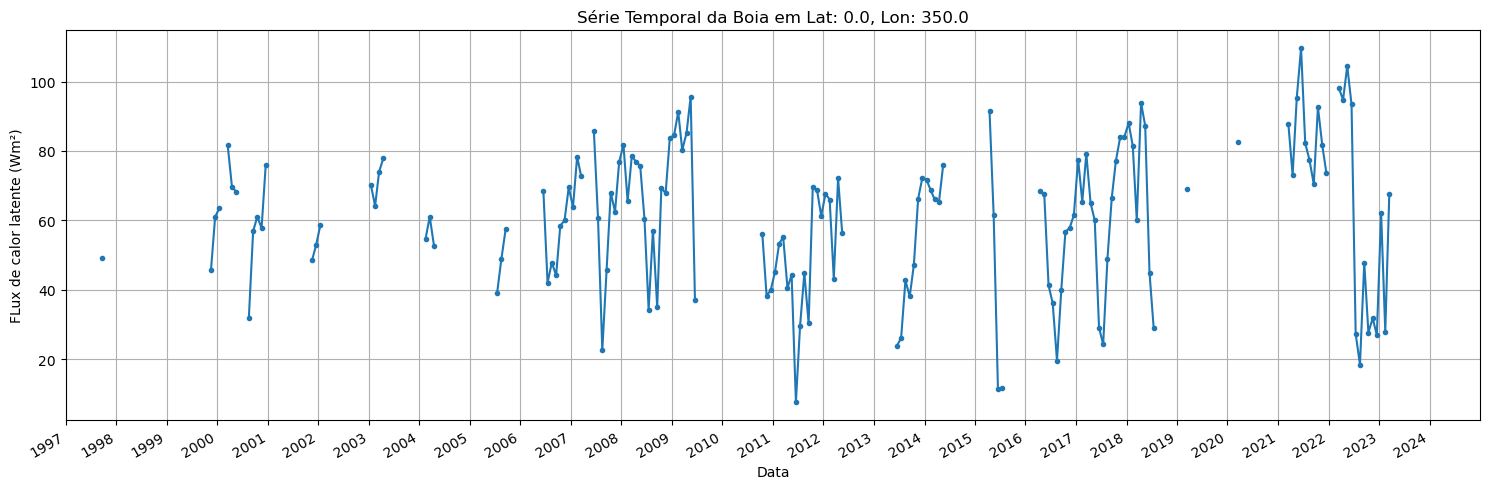

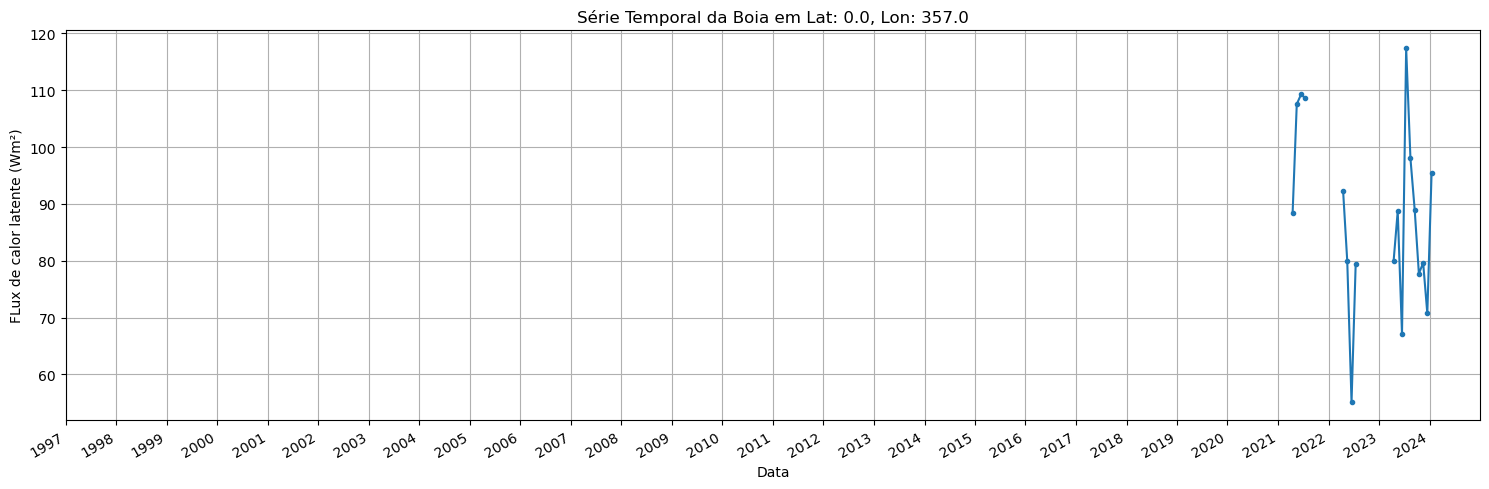

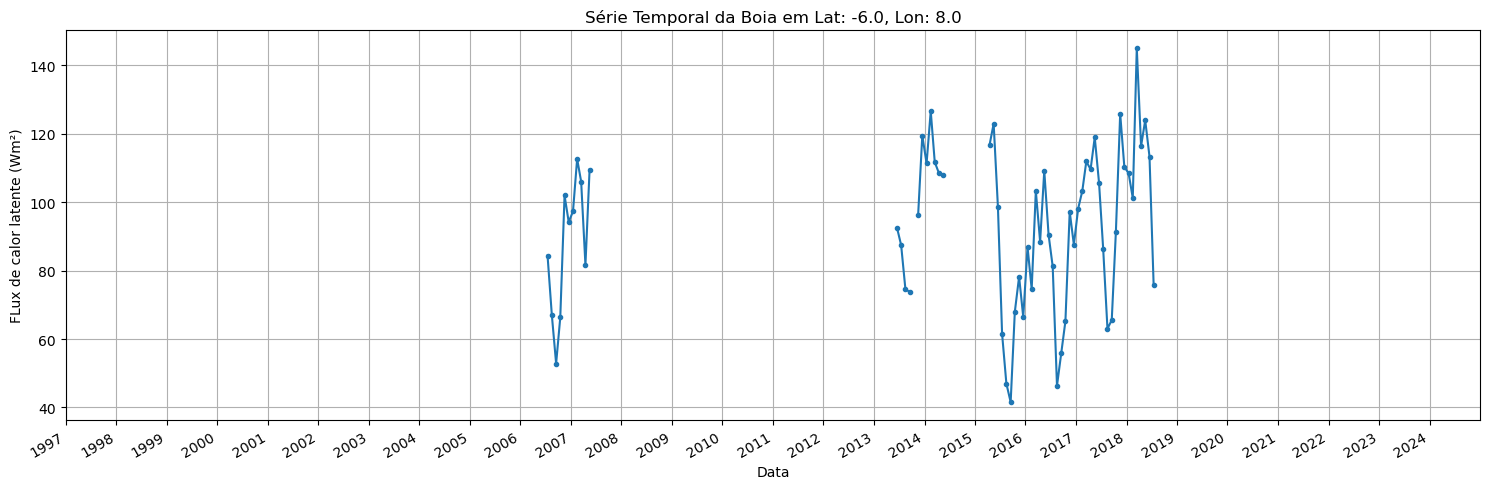

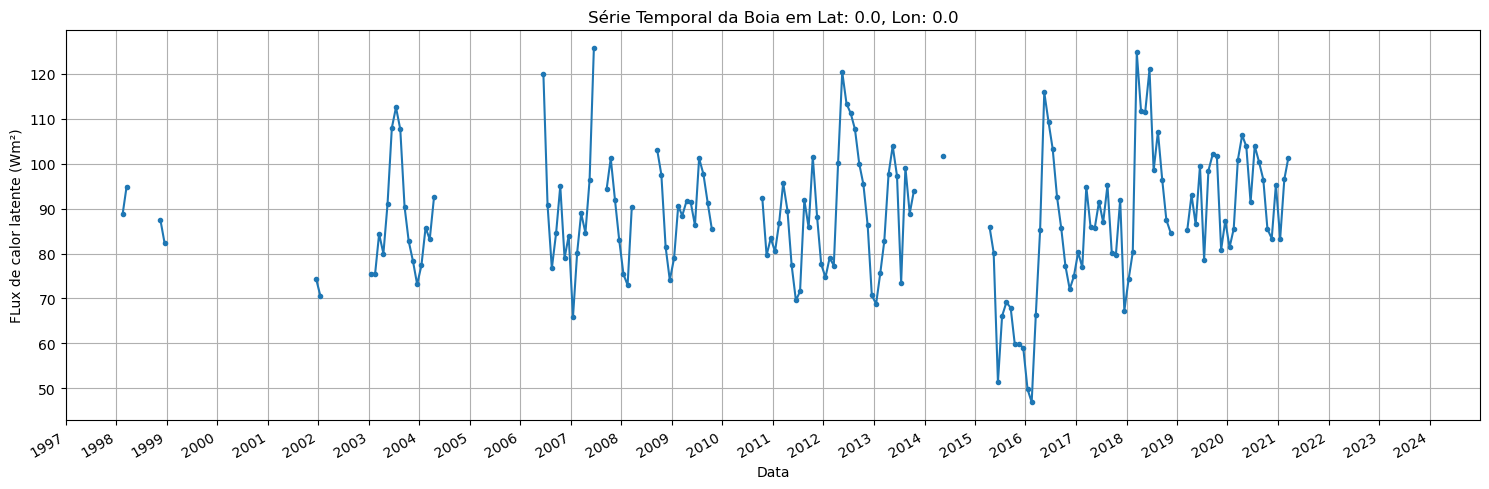

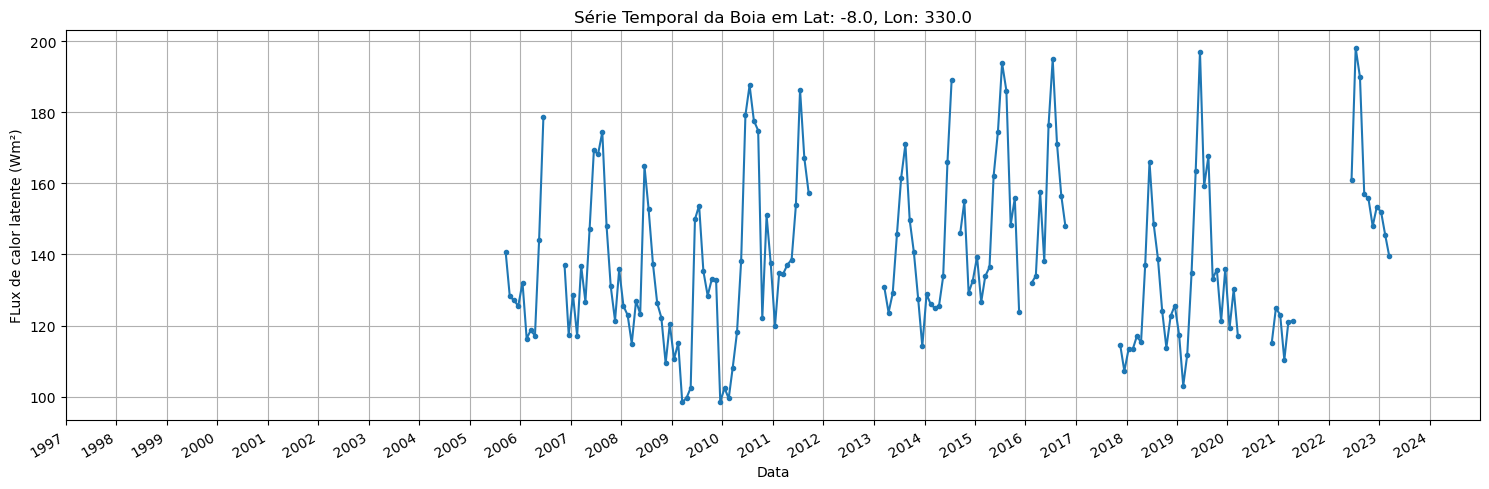

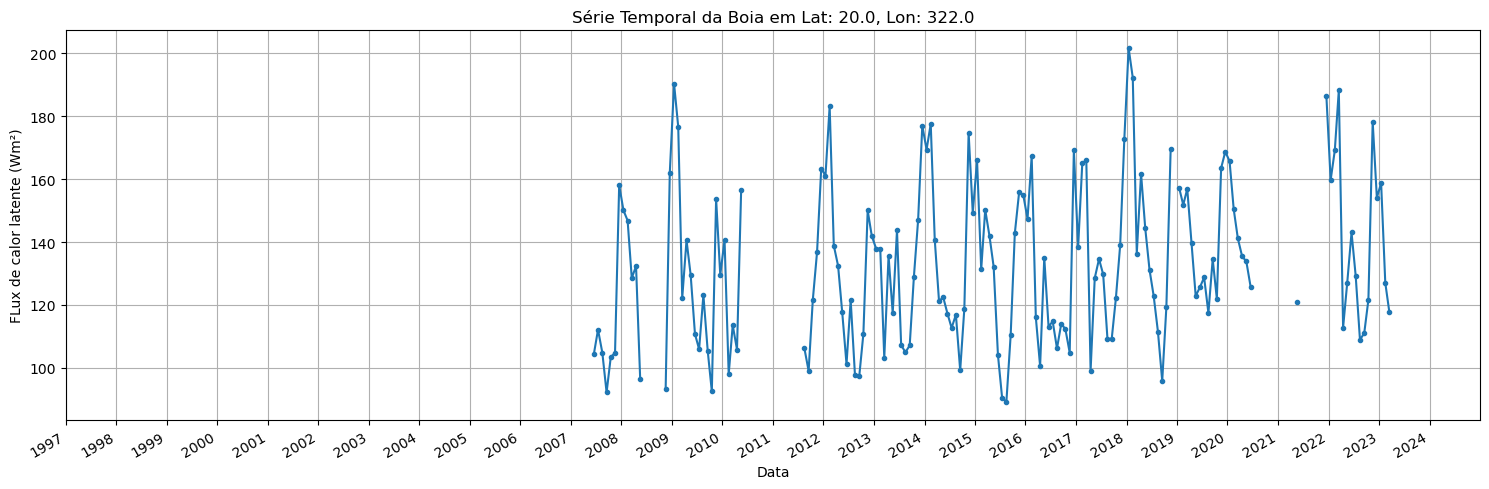

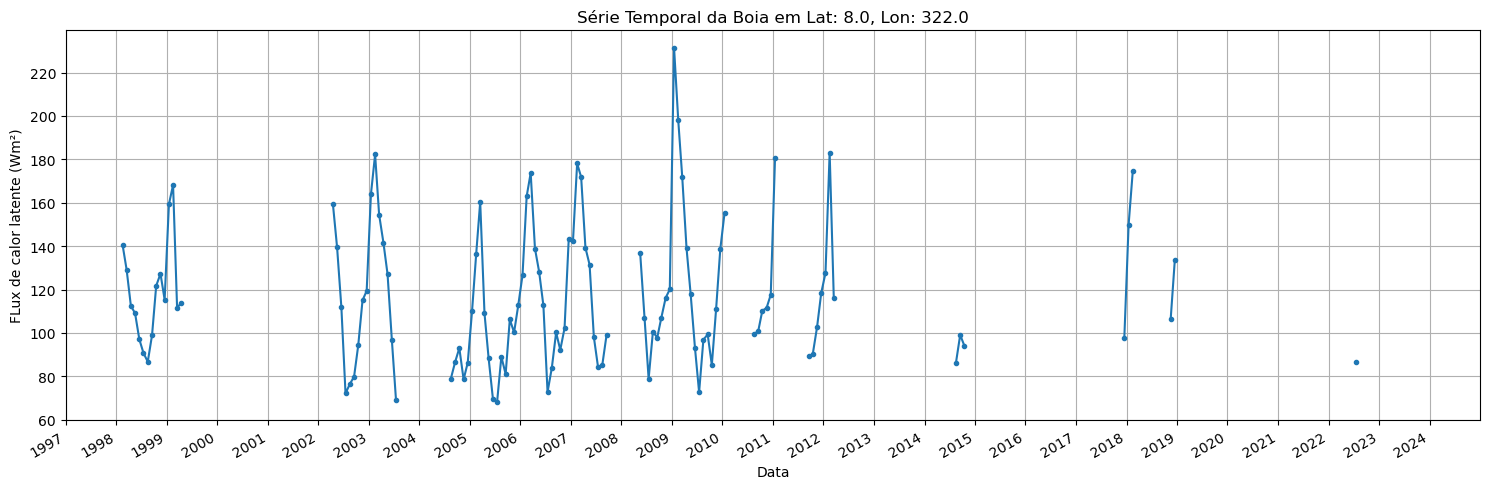

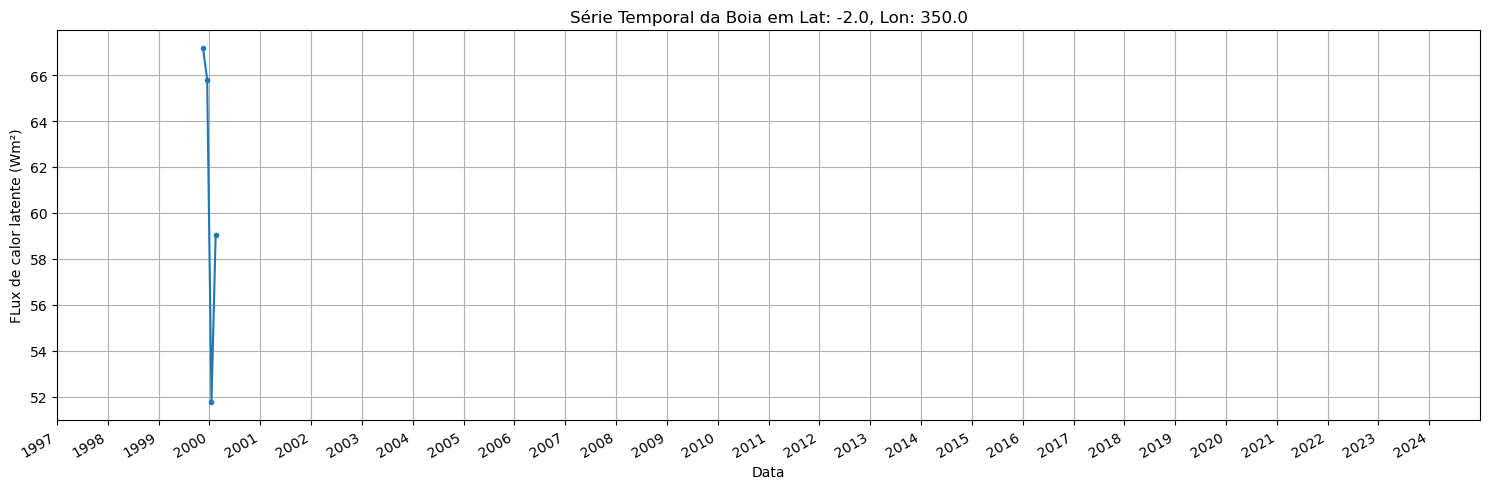

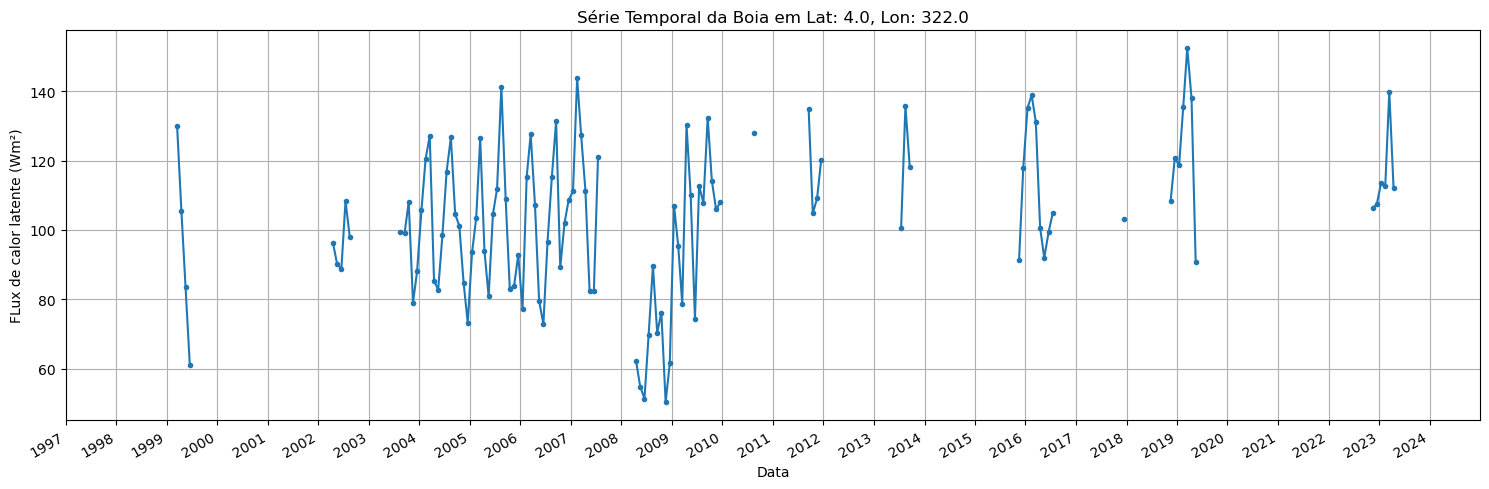

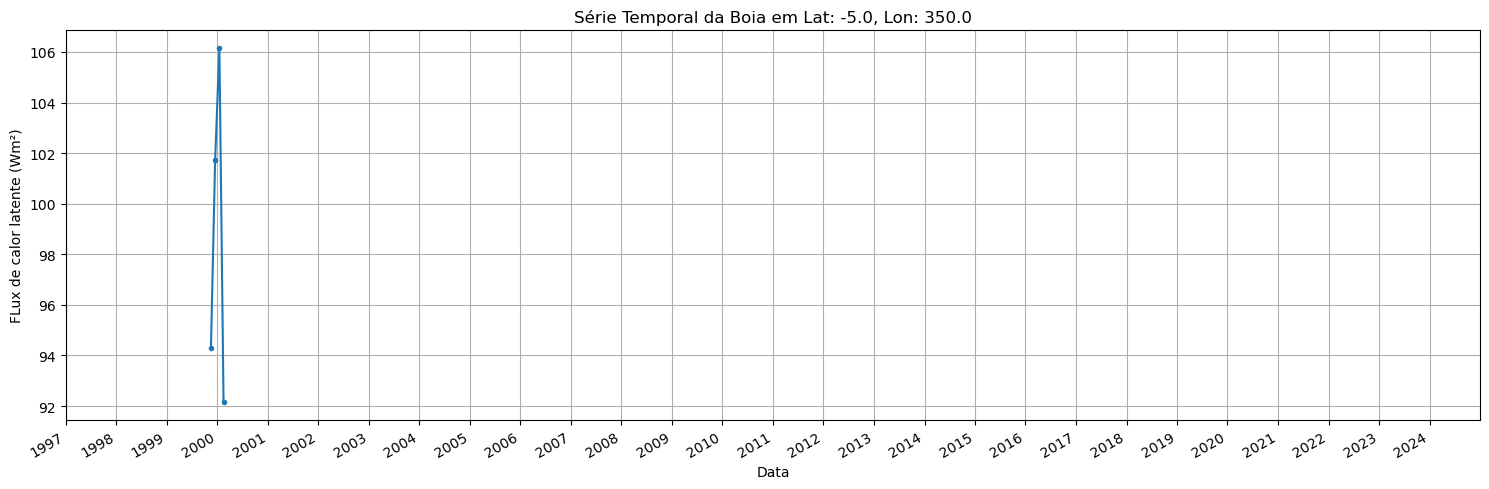

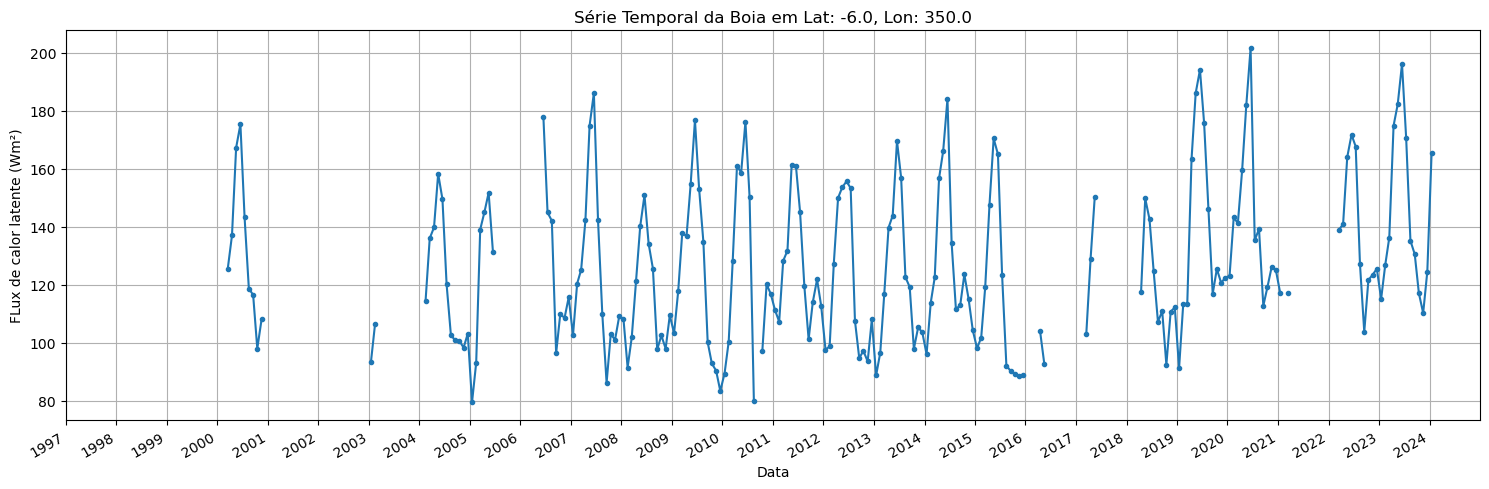

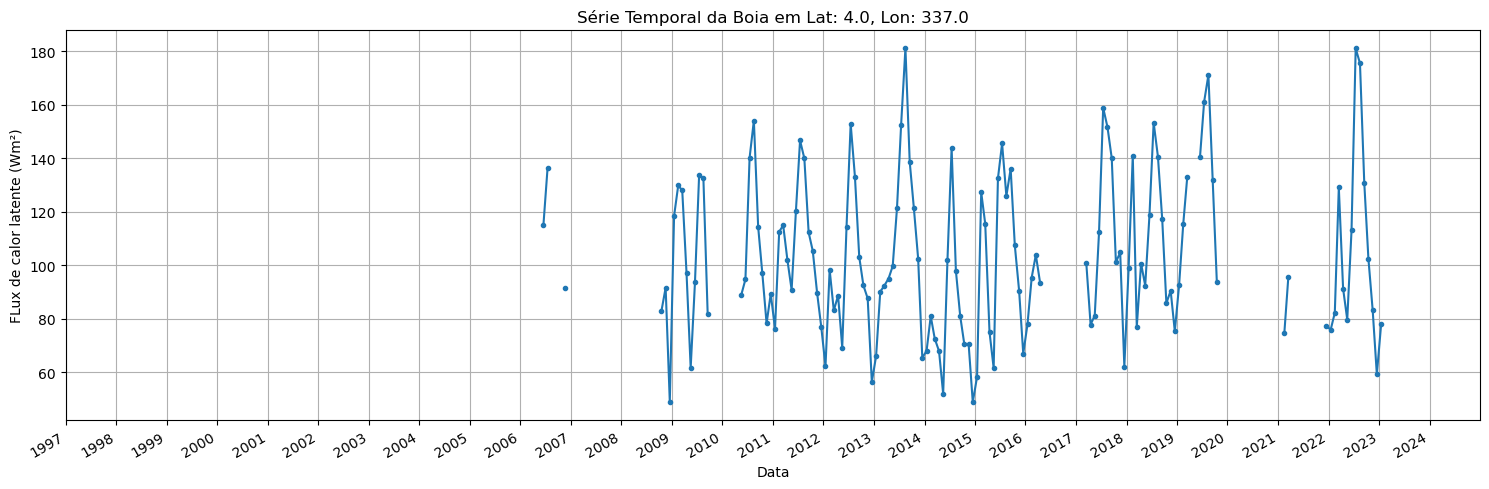

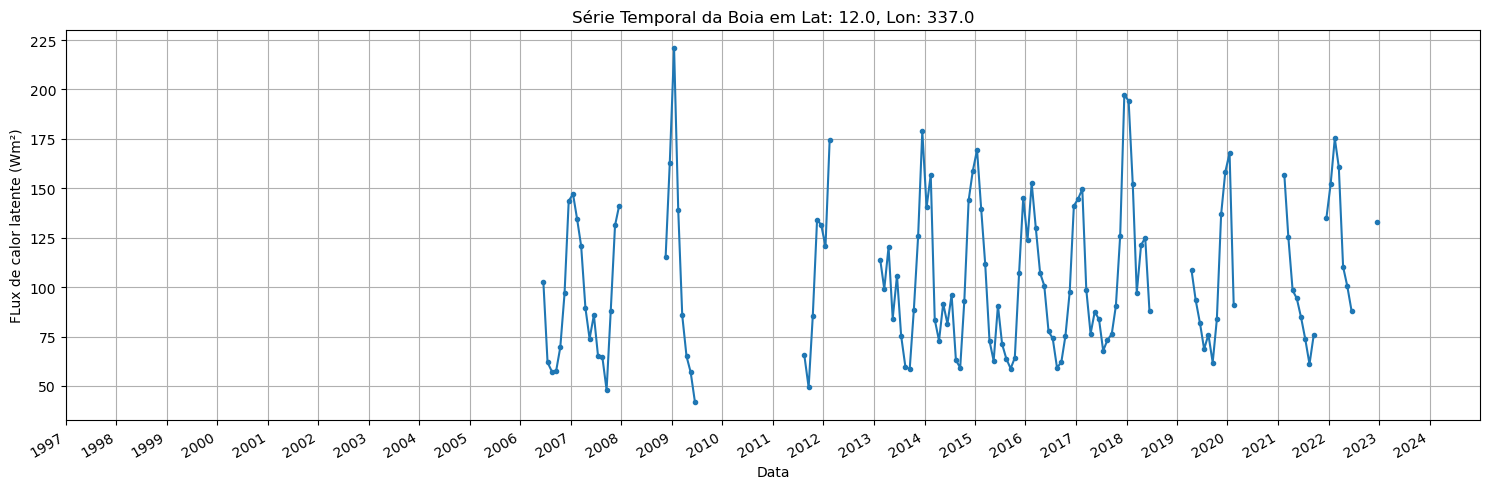

In [4]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]  # A variável 'time' geralmente está em dias desde uma data base
    temperatura = ds.variables['QL_137'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze() 

    # Converte o tempo de unidades relativas (dias desde uma data) para objetos datetime
    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    return lat, lon, datas, temperatura

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/latente/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

def plotar_serie_temporal(datas, temperatura, titulo):
    plt.figure(figsize=(15,5))  # Ajuste o tamanho conforme necessário

    # Converte objetos 'cftime.DatetimeGregorian' para 'datetime.datetime'
    datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
    datas_num = mdates.date2num(datas_convertidas)  # Converte para o formato numérico do Matplotlib

    temperatura = np.array(temperatura)
    
    plt.plot(datas_num, temperatura, '-o', markersize=3)
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('FLux de calor latente (Wm²)')
    plt.grid(True)
    
    # Define os limites do eixo x para o intervalo de interesse
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    
    # Formatar o eixo x para mostrar apenas o ano
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    plt.gcf().autofmt_xdate()  # Rotação automática das datas para melhor visualização
    plt.tight_layout()  # Ajuste automático do layout
    plt.show()

for arquivo in arquivos_netCDF:
    lat, lon, datas, temperatura = ler_dados(arquivo)
    titulo = f"Série Temporal da Boia em Lat: {lat.mean():.1f}, Lon: {lon.mean():.1f}"
    plotar_serie_temporal(datas, temperatura, titulo)

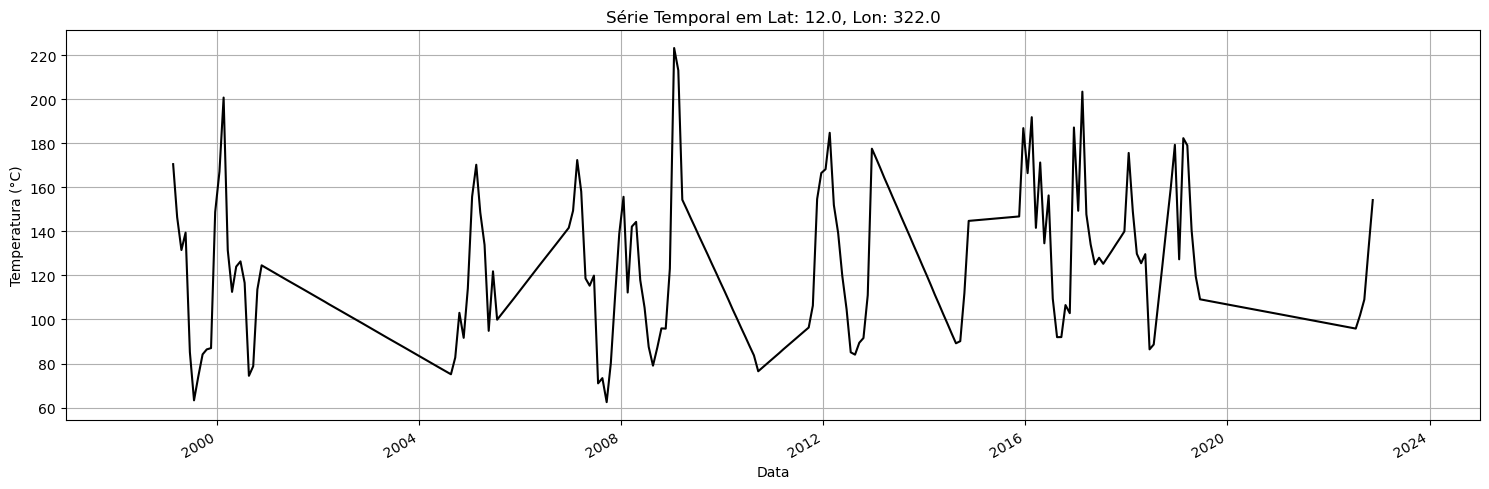

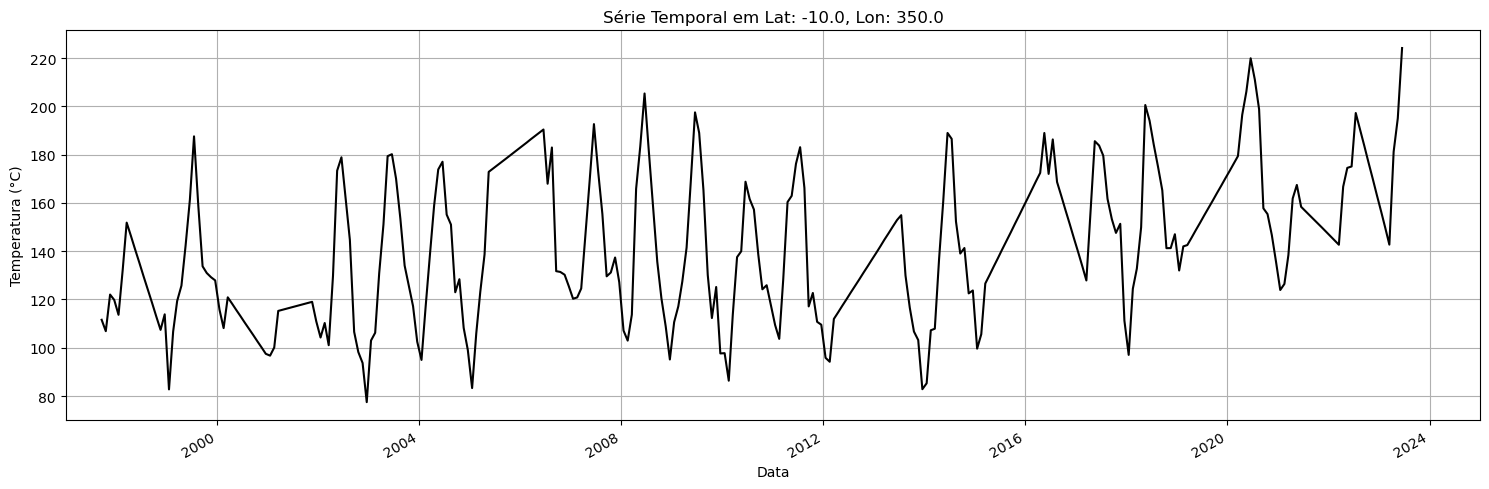

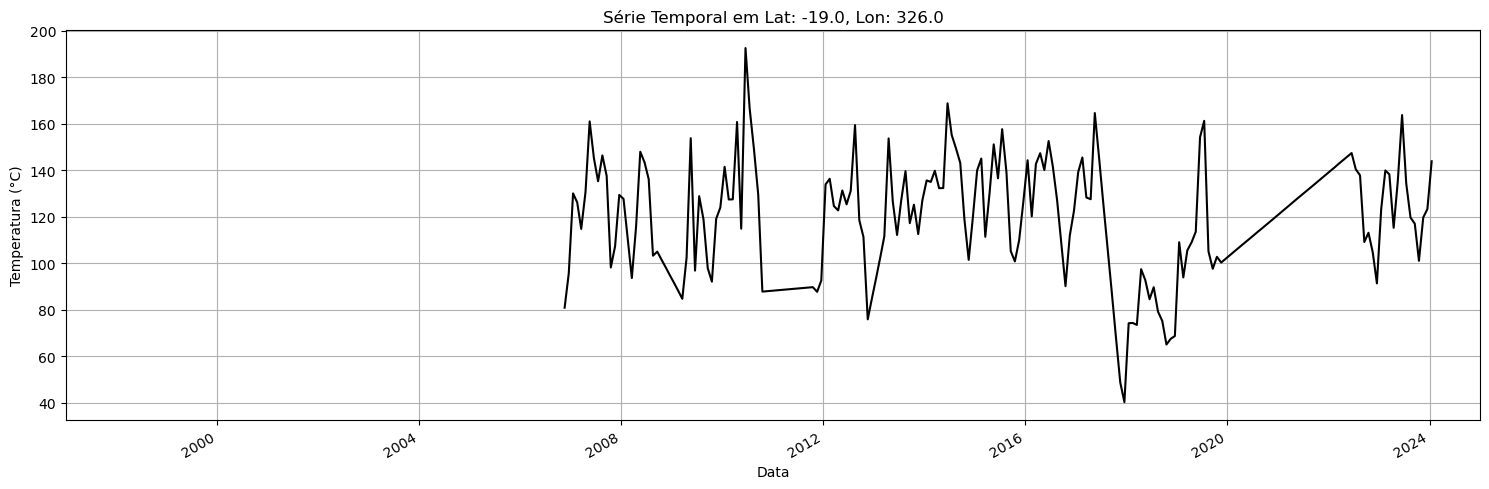

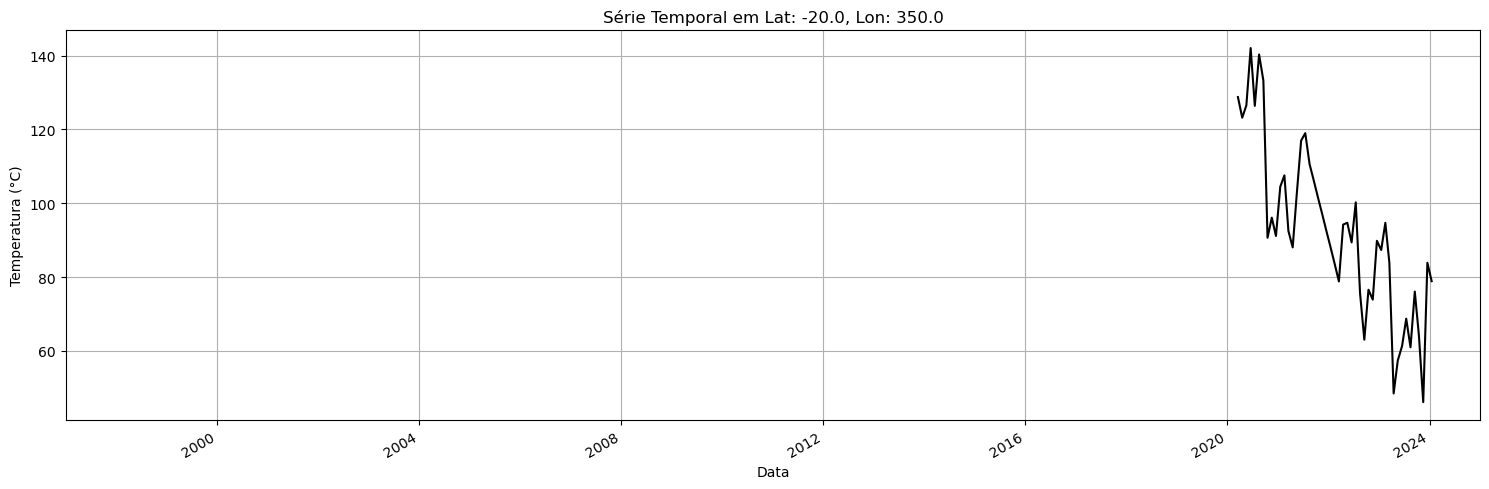

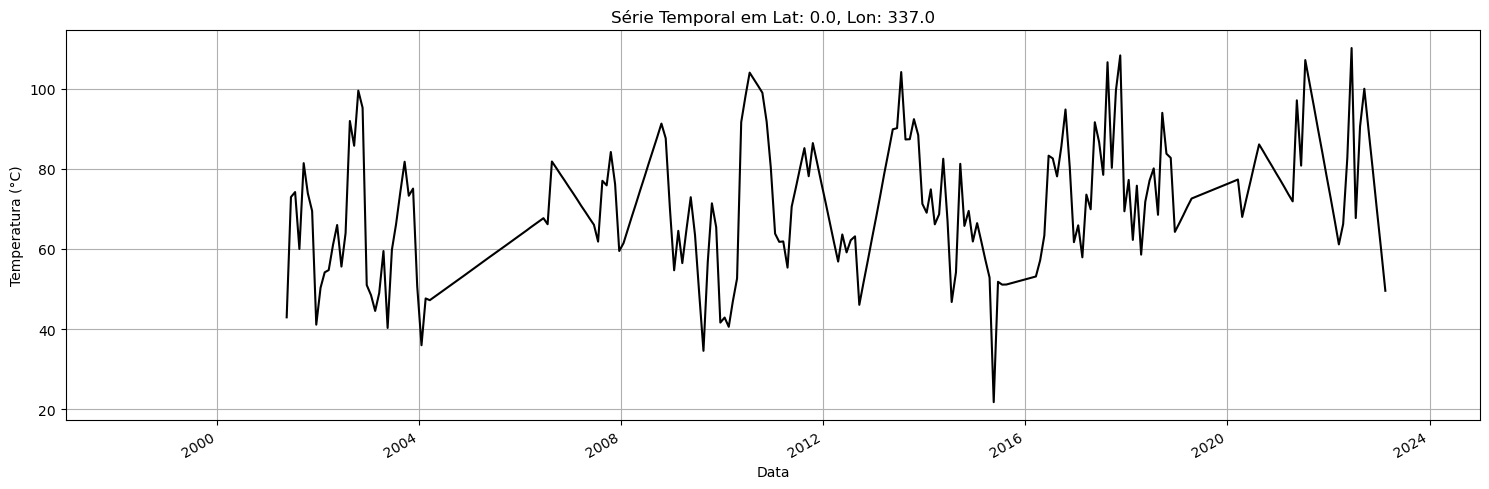

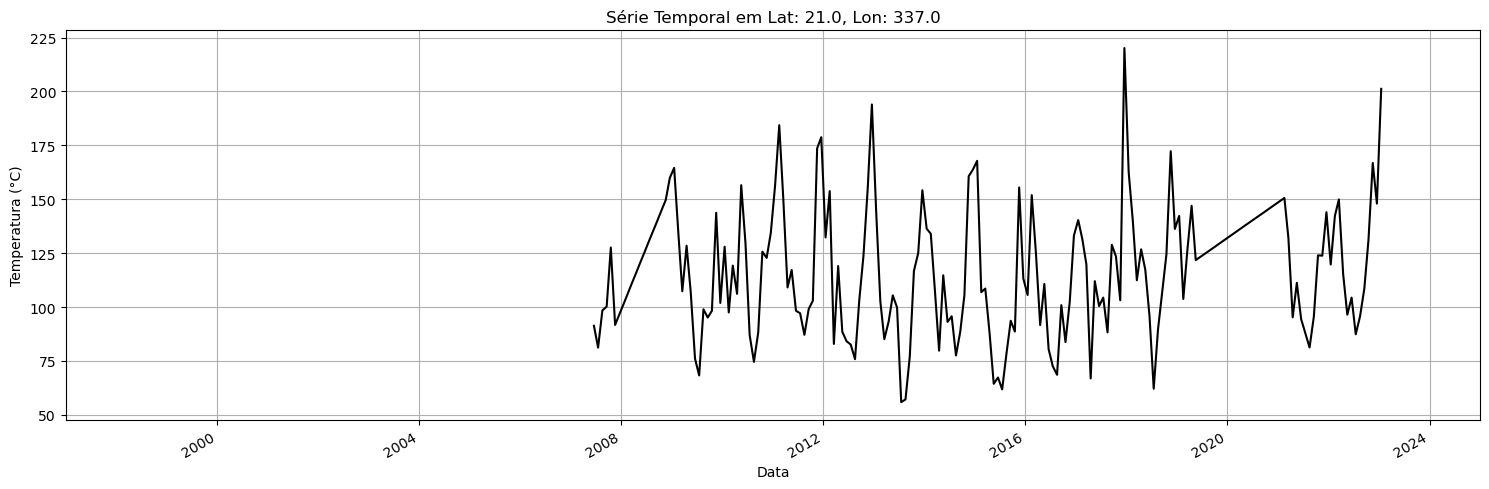

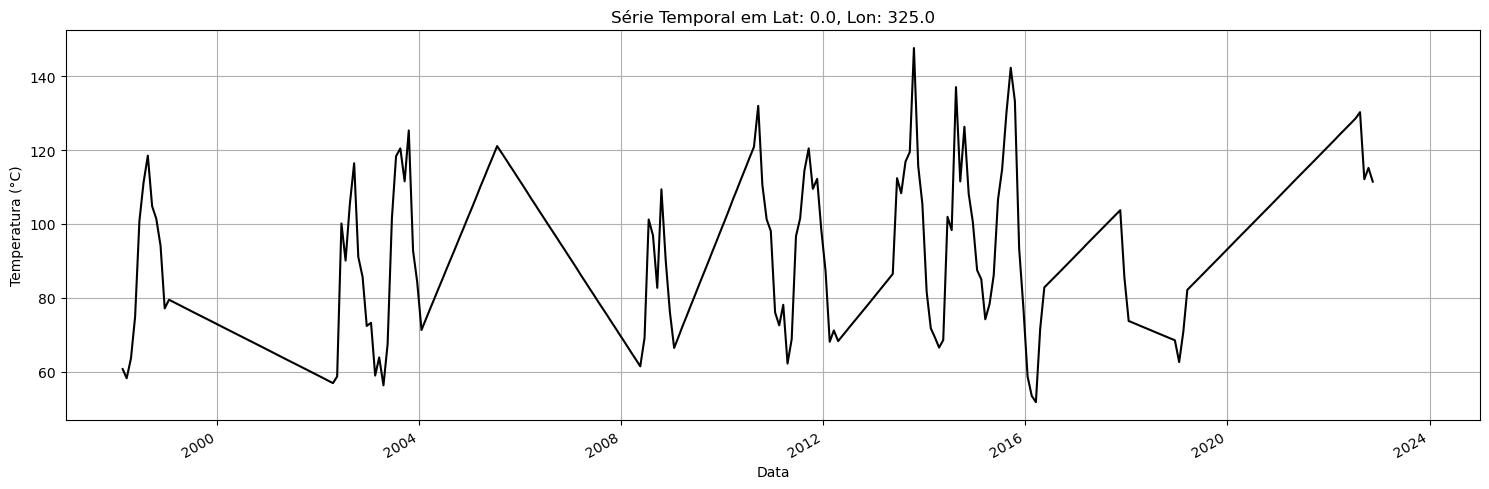

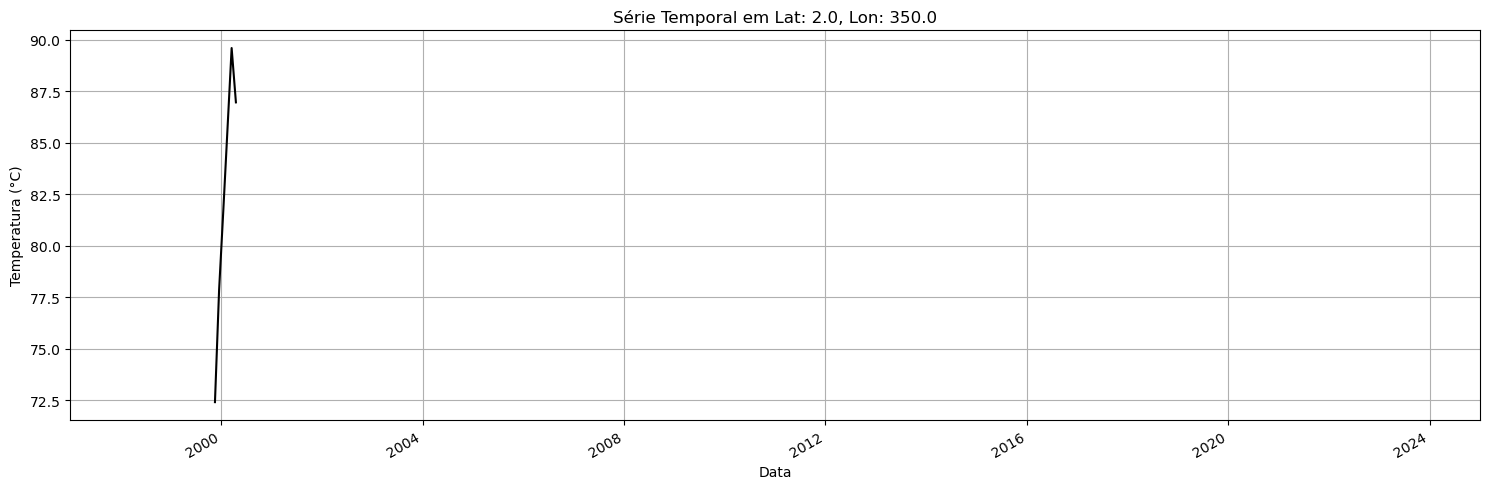

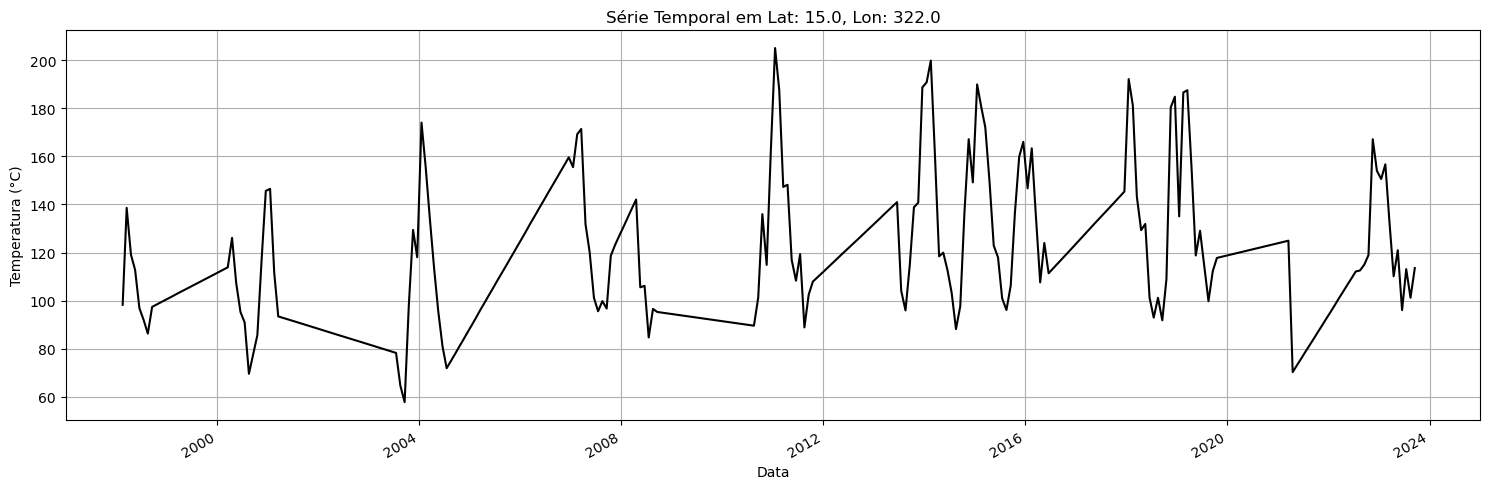

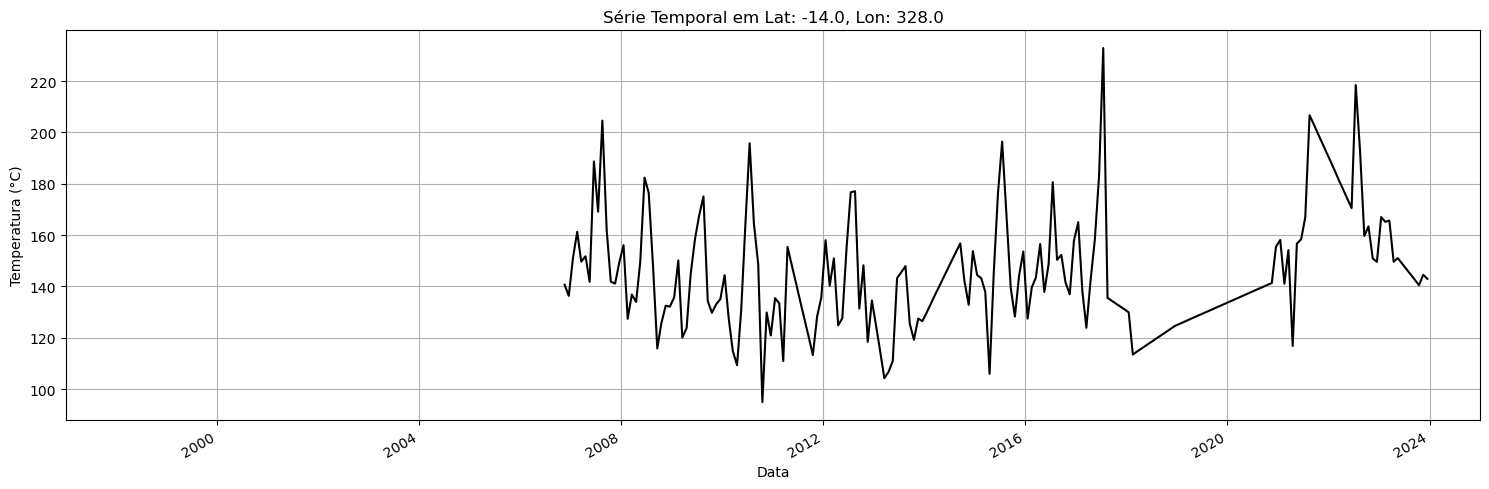

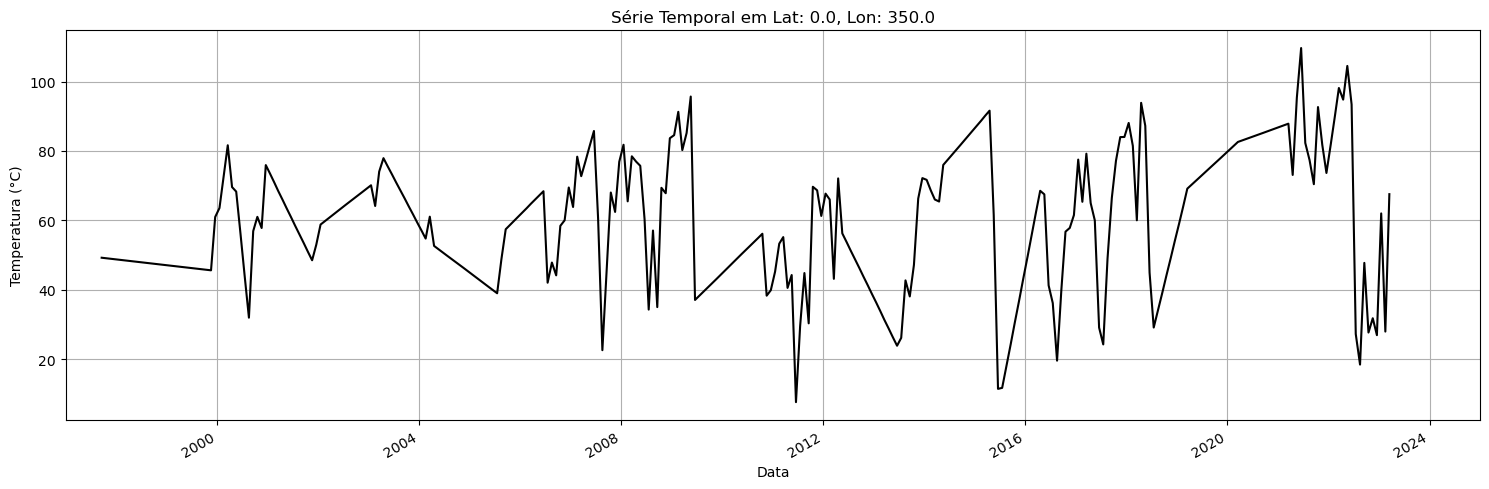

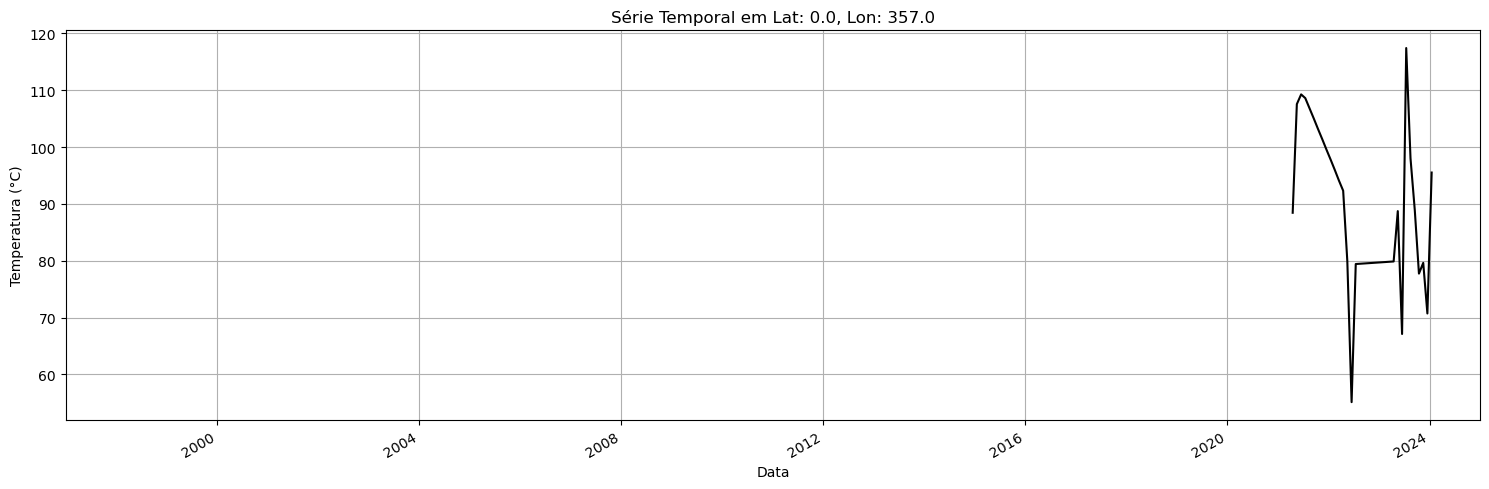

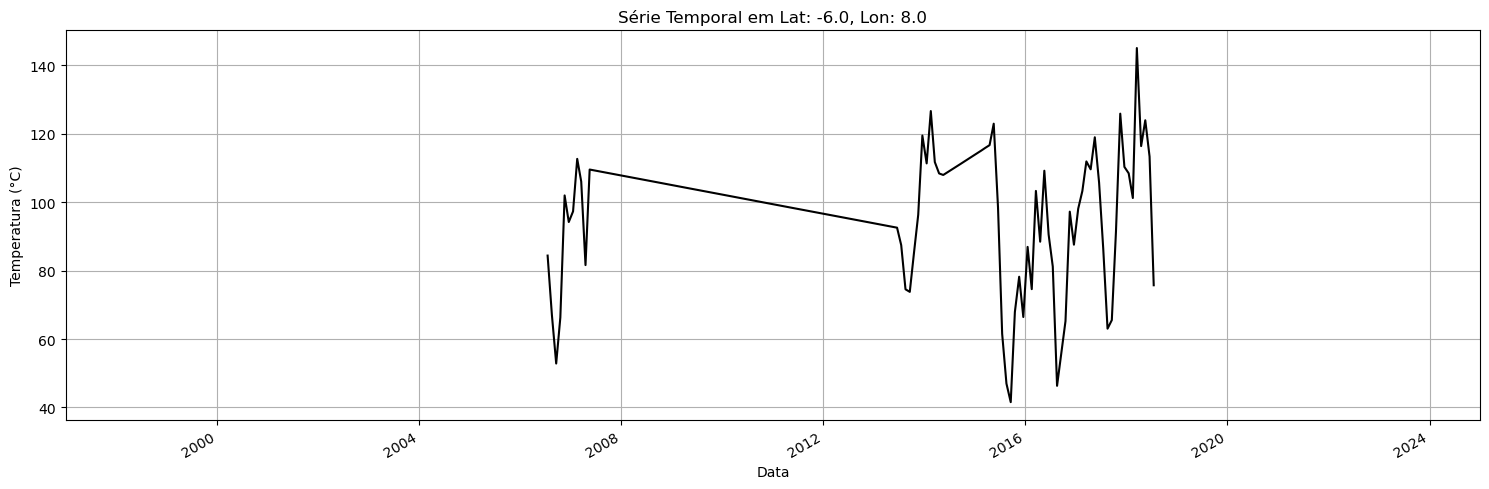

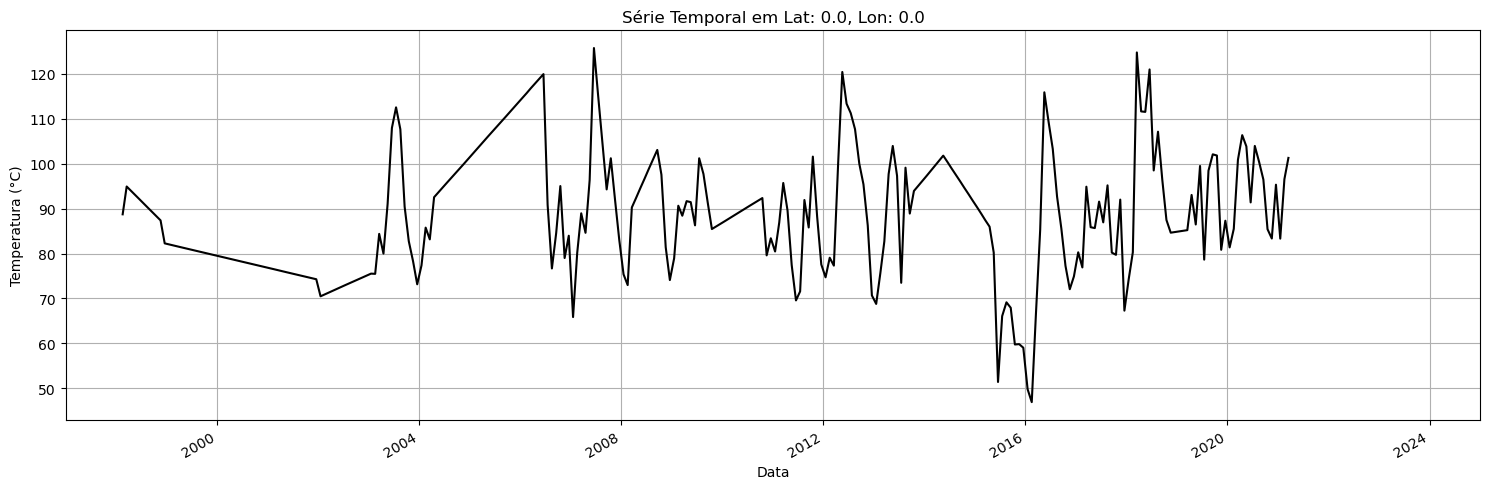

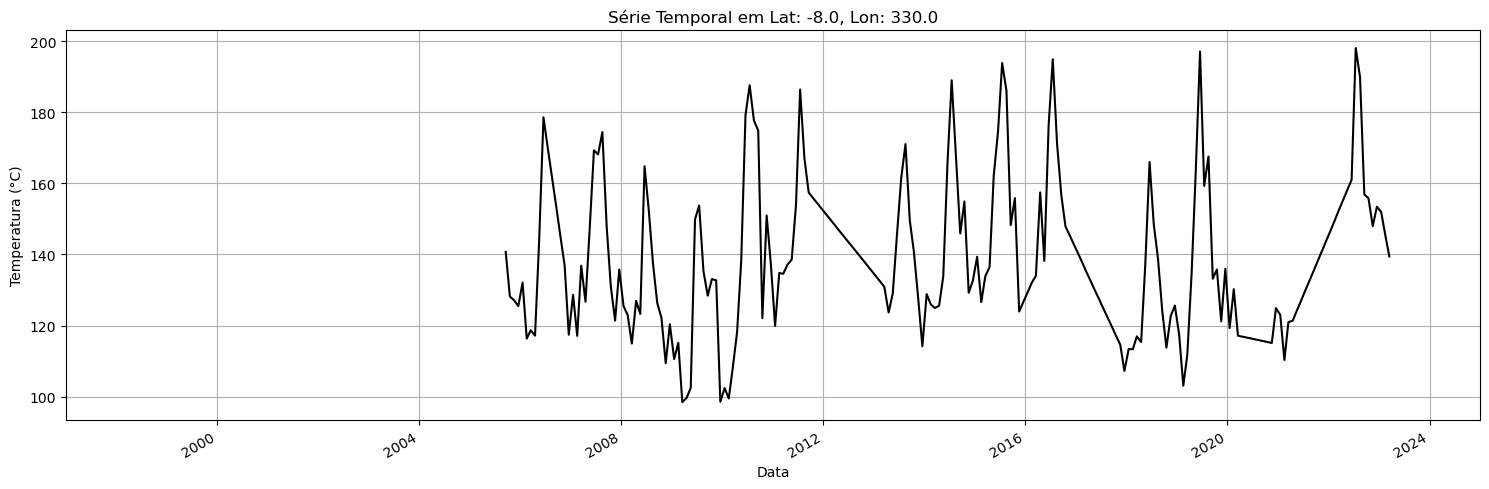

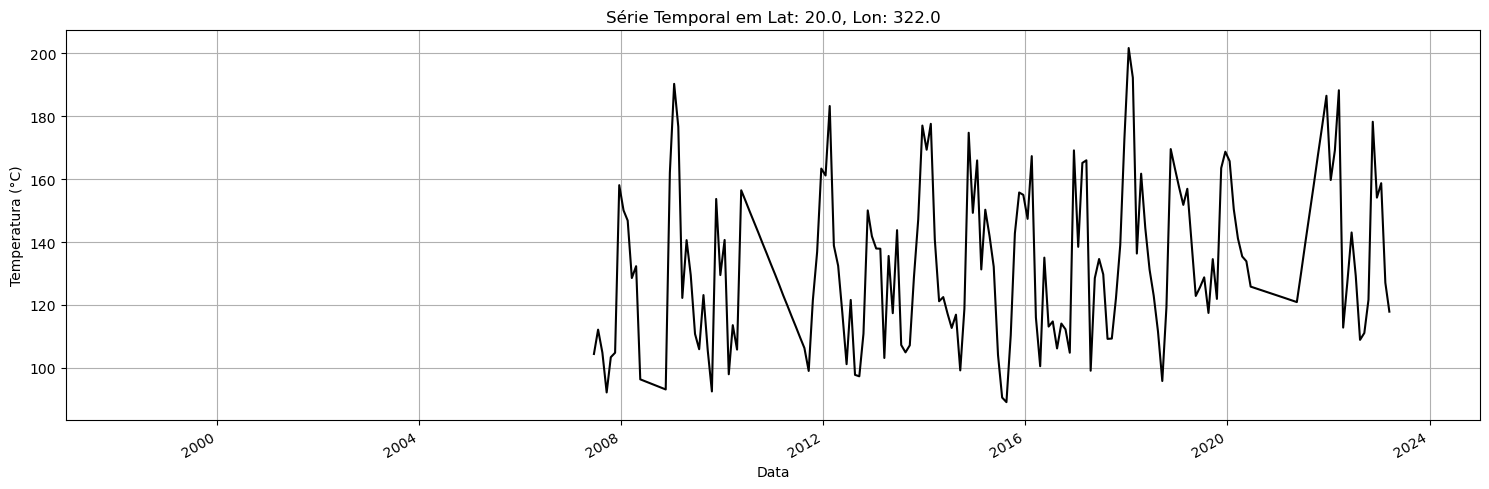

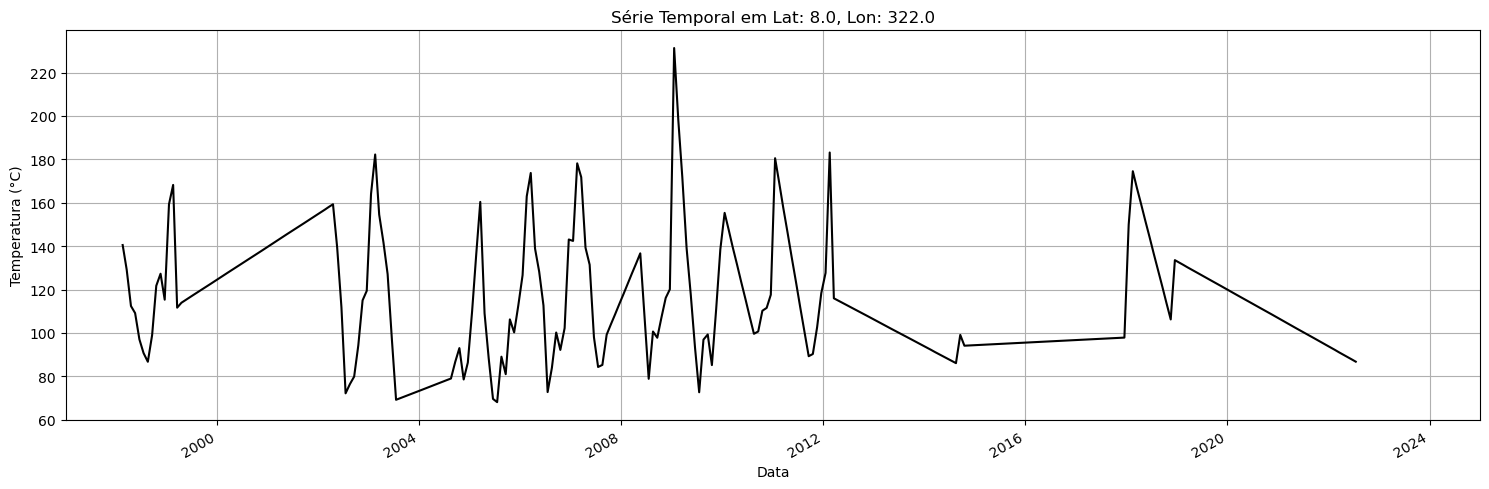

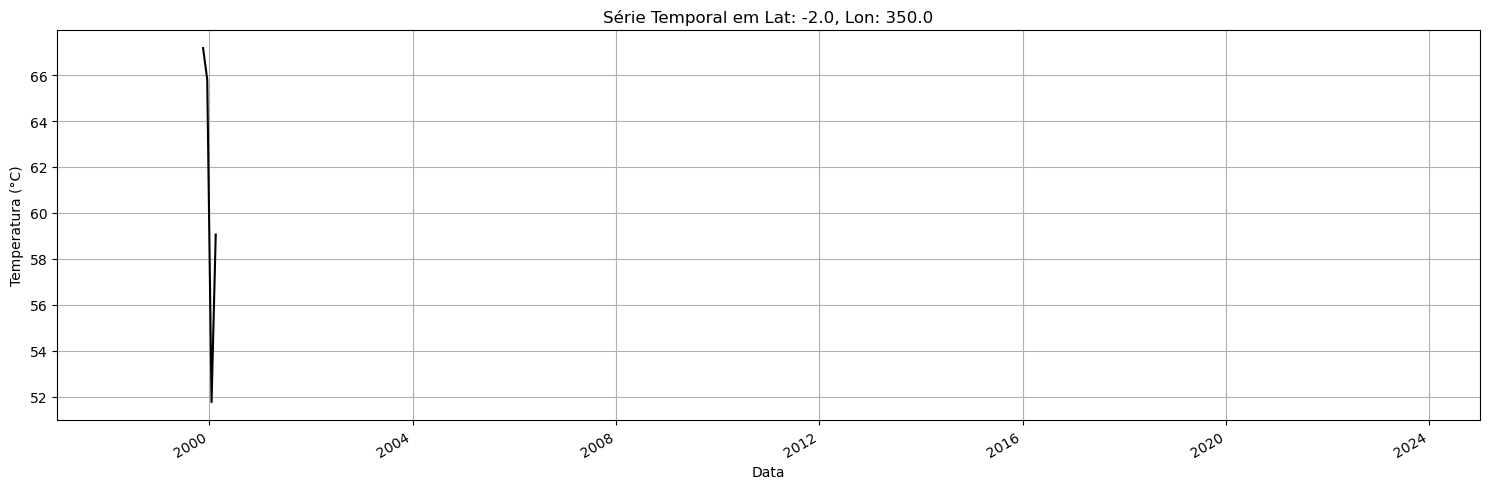

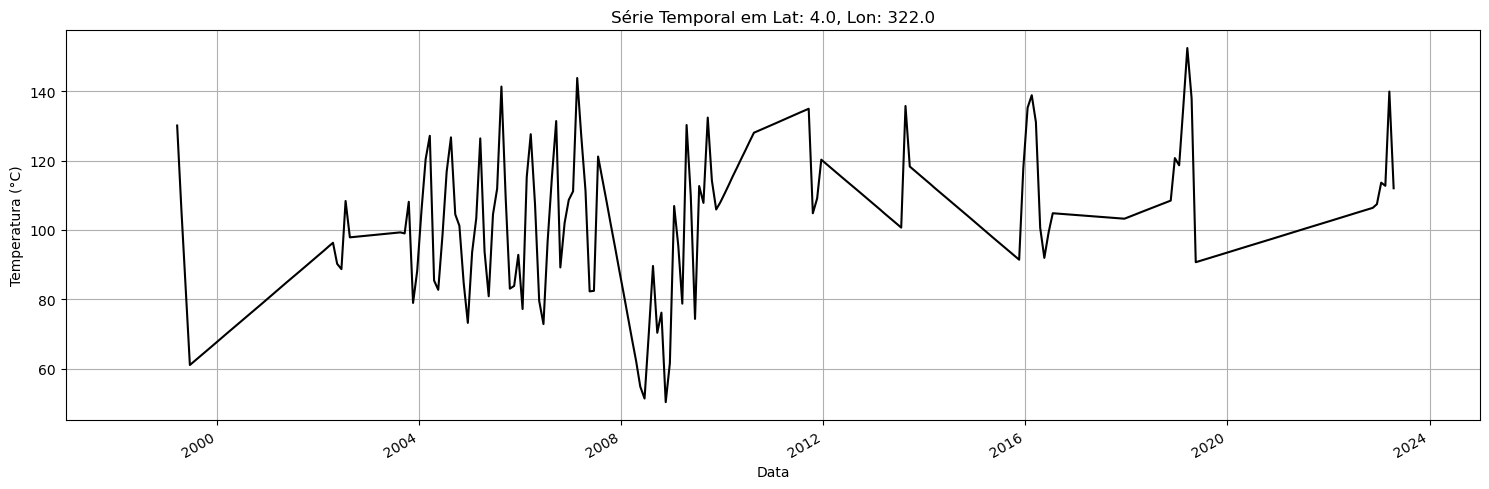

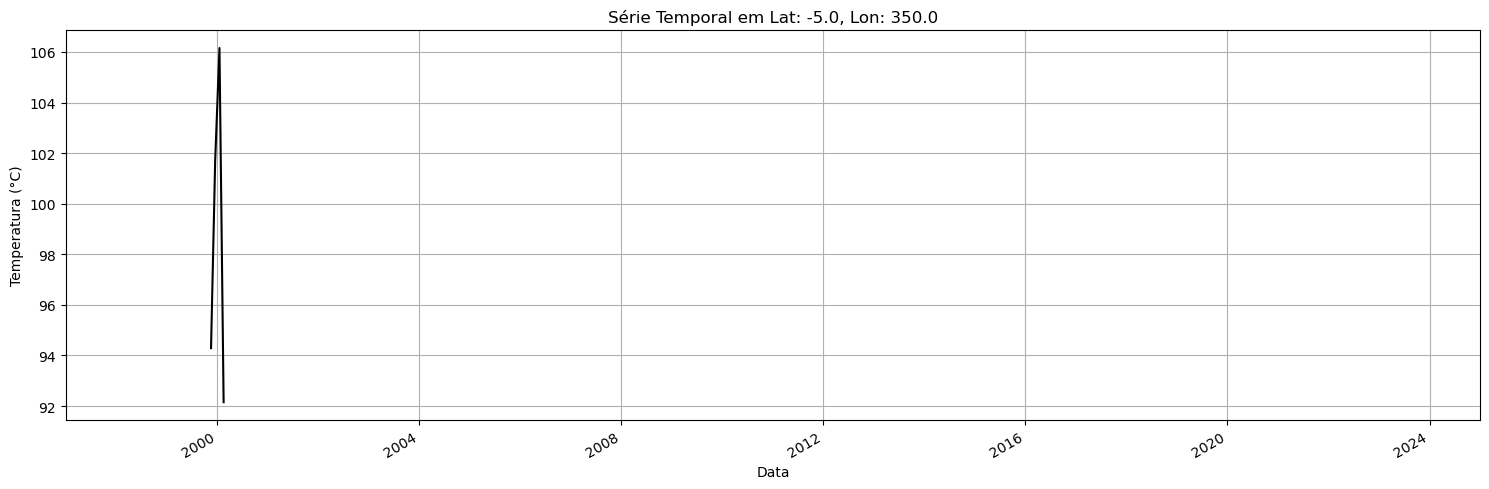

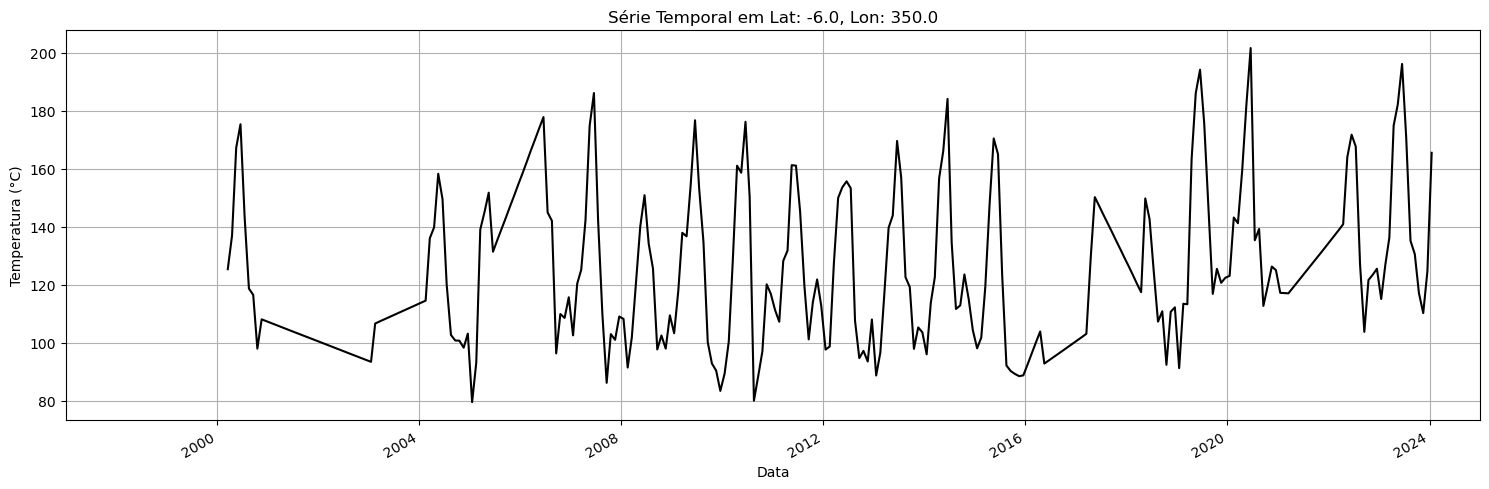

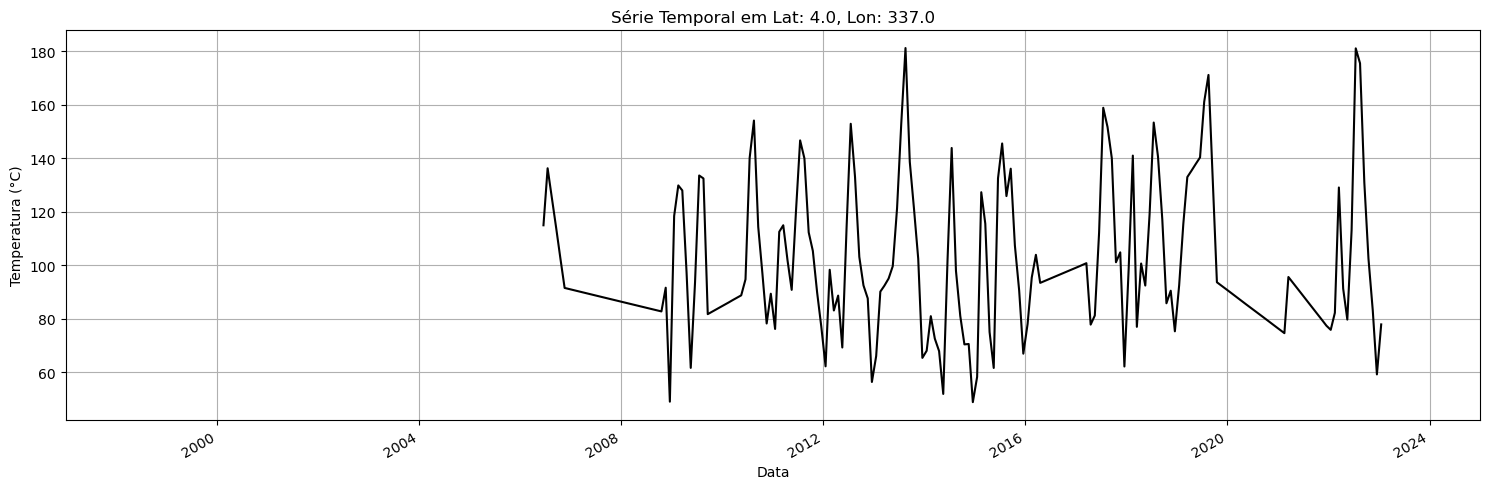

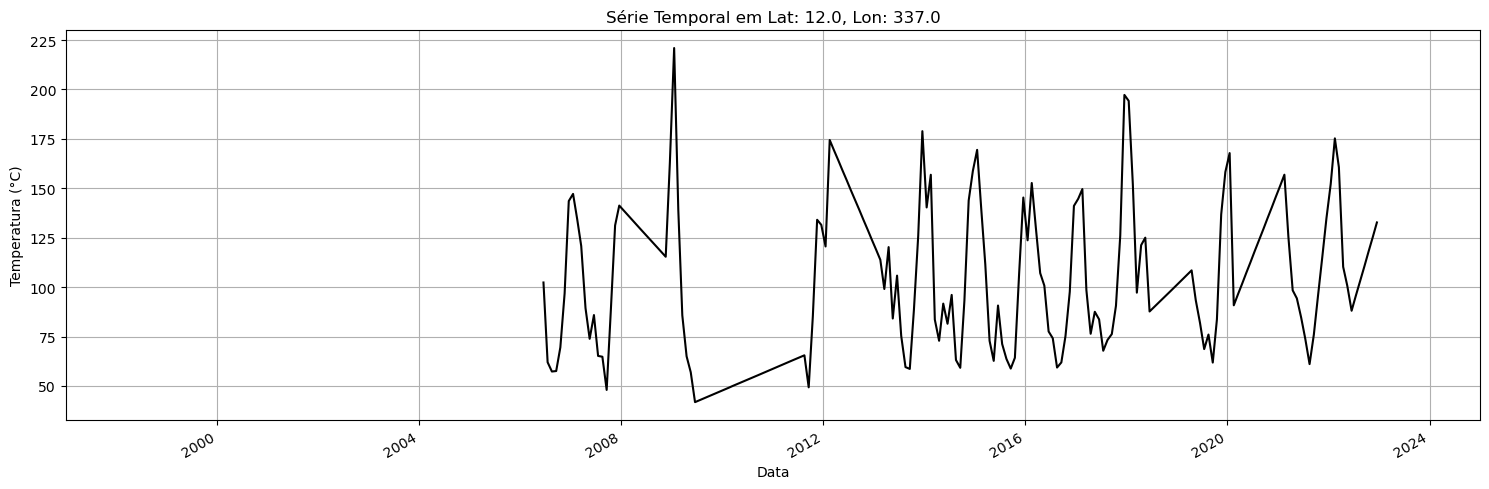

In [26]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['QL_137'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)
    
    # Convertendo objetos cftime para pandas.Timestamp
    datas_convertidas = [pd.Timestamp(data.strftime()) for data in datas]
    
    df = pd.DataFrame({
        'Temperatura': temperatura
    }, index=pd.DatetimeIndex(datas_convertidas))
    
    df['Temperatura_Interpolada'] = df['Temperatura'].interpolate(method='linear')
    
    return lat, lon, df

def plotar_serie_temporal(df, titulo):
    plt.figure(figsize=(15, 5))
    df_filtrado = df[(df.index >= pd.Timestamp('1997-01-01')) & (df.index <= pd.Timestamp('2024-12-31'))]
    df_filtrado['Temperatura_Interpolada'].plot(color='k', xlabel='Data', ylabel='Temperatura (°C)')
    
    plt.title(titulo)
    plt.grid(True)
    plt.xlim(pd.Timestamp('1997-01-01'), pd.Timestamp('2024-12-31'))
    plt.tight_layout()
    plt.show()

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/latente/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

for arquivo in arquivos_netCDF:
    lat, lon, df = ler_dados(arquivo)
    titulo = f"Série Temporal em Lat: {lat.mean():.1f}, Lon: {lon.mean():.1f}"
    plotar_serie_temporal(df, titulo)



# CALOR SENSÍVEL


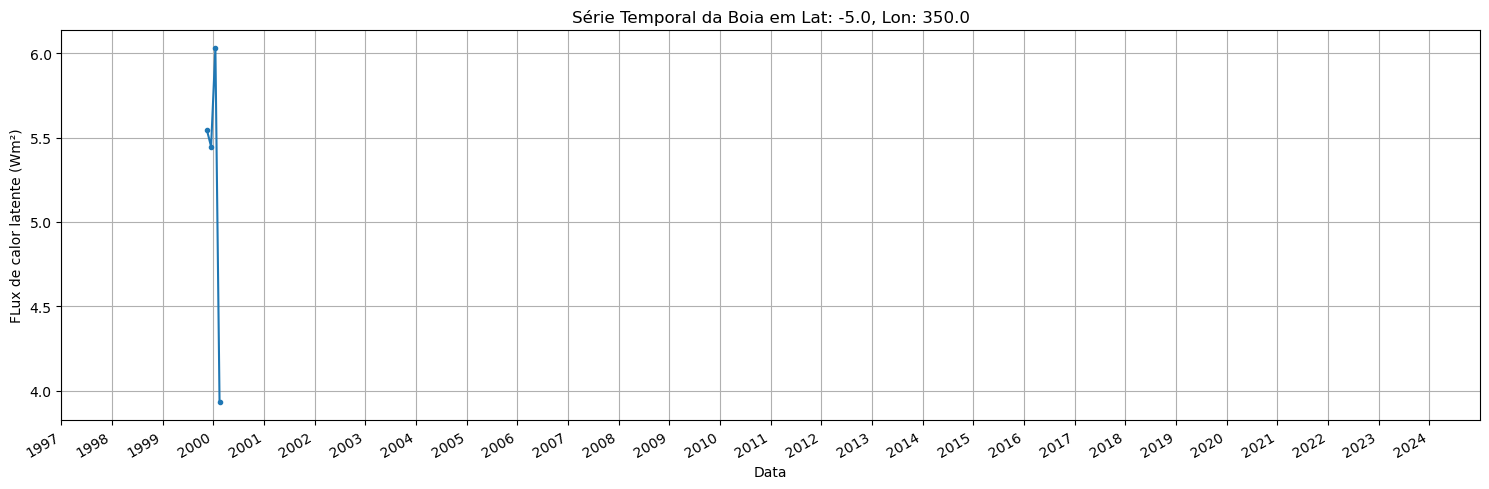

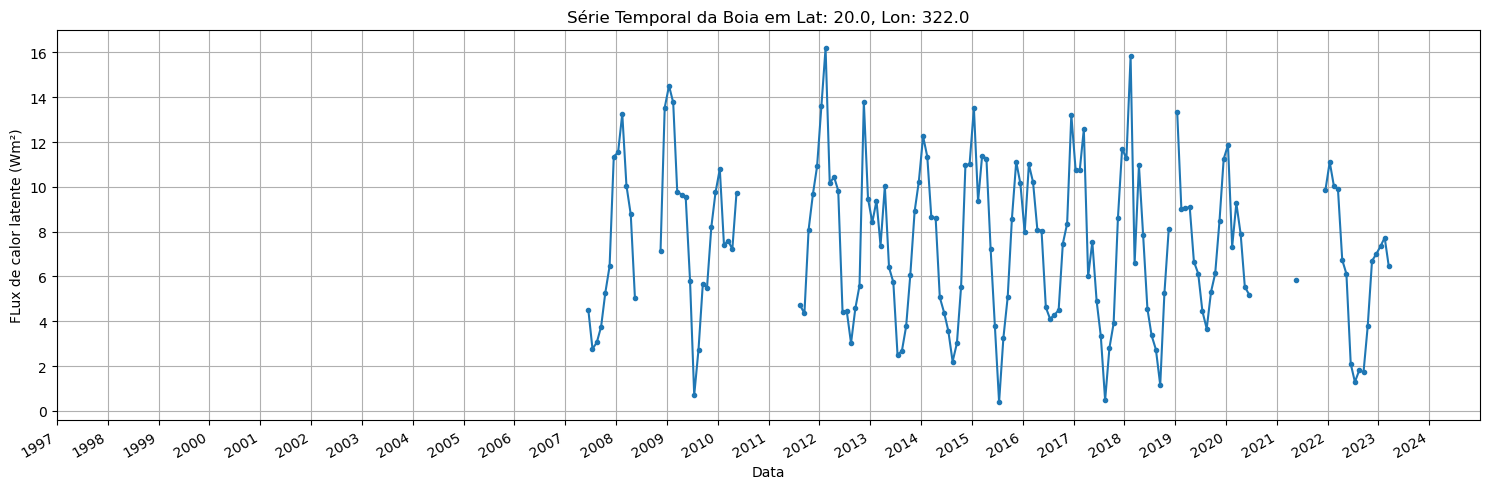

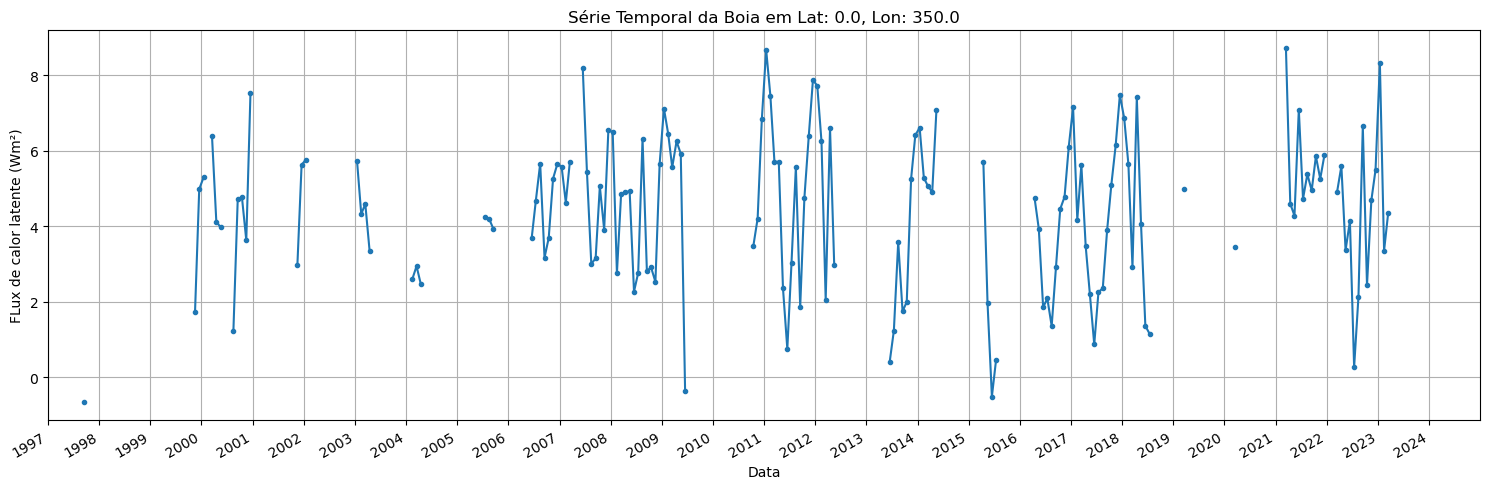

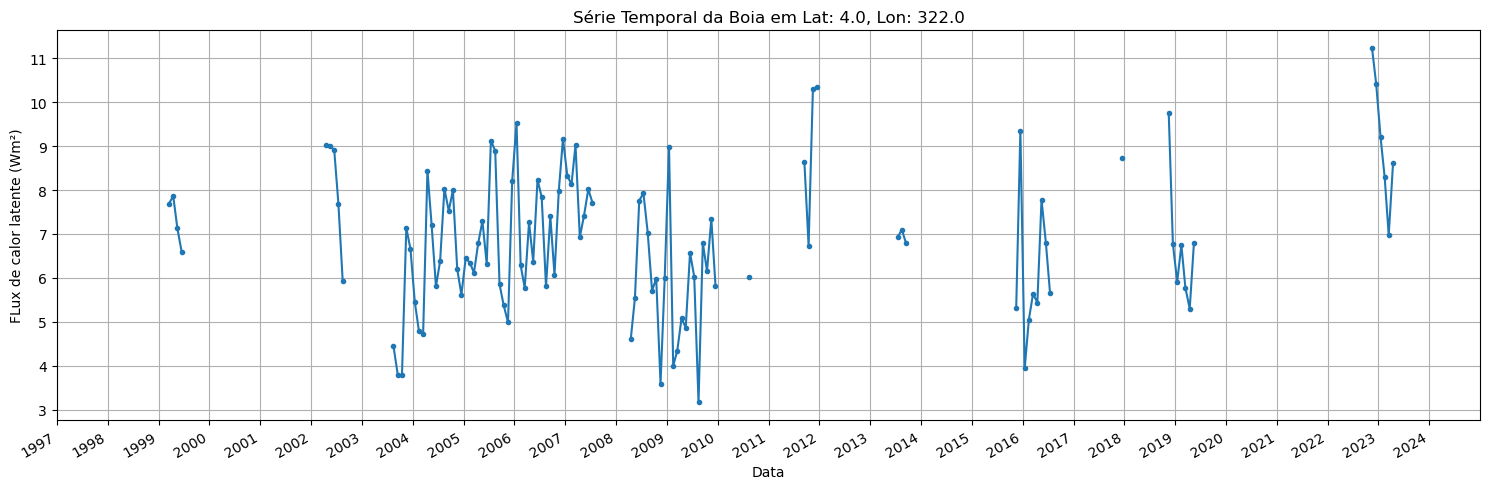

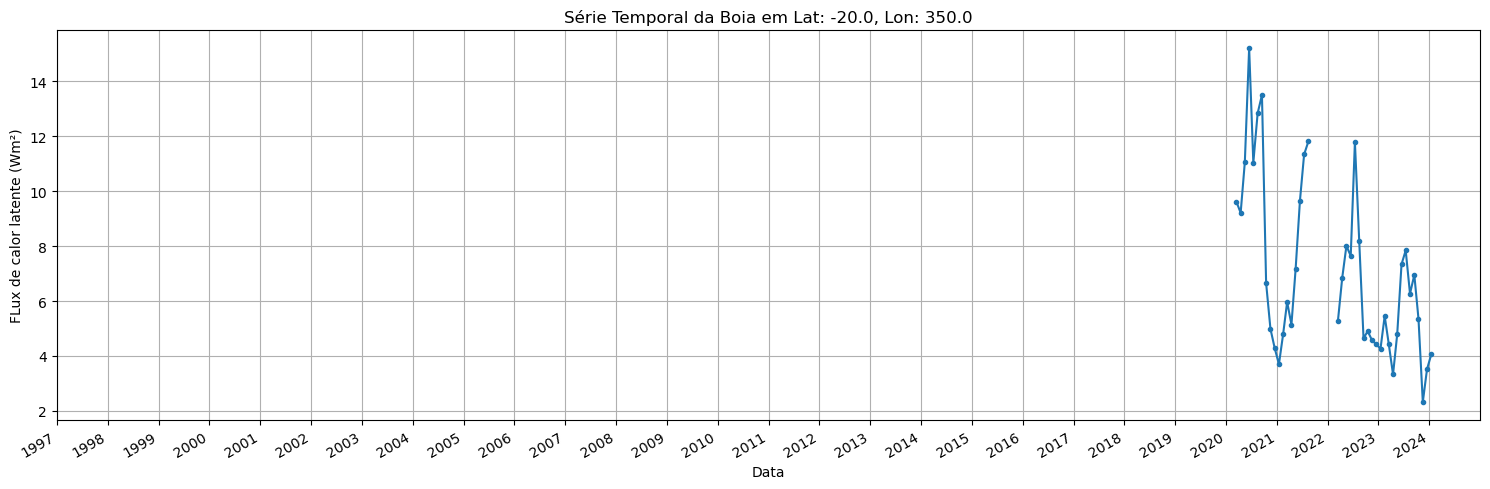

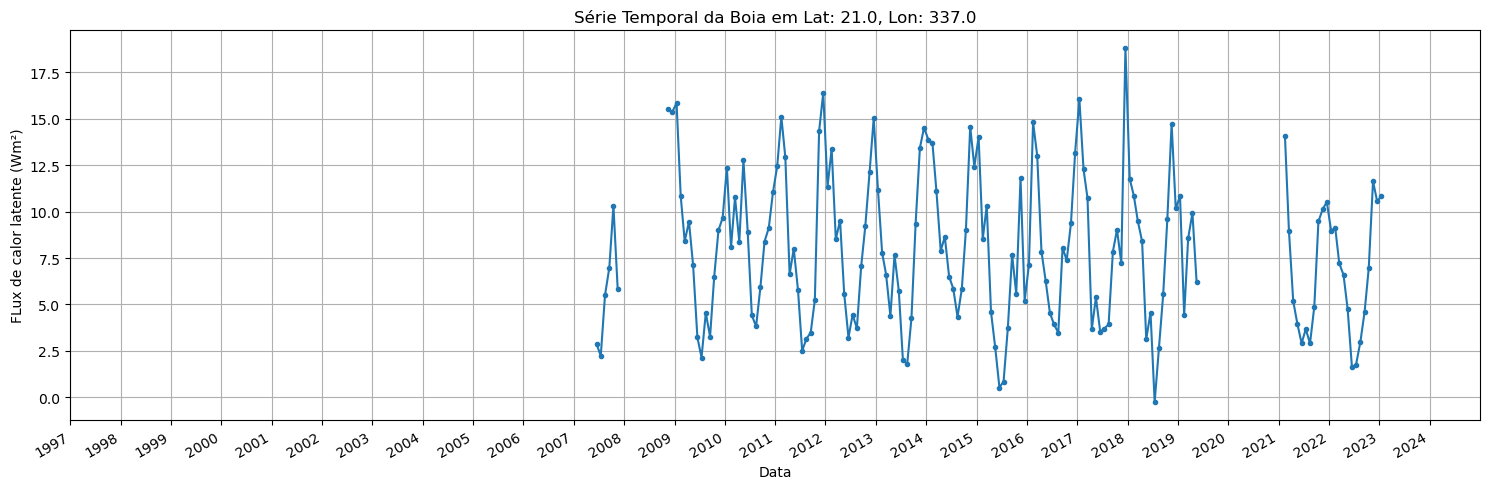

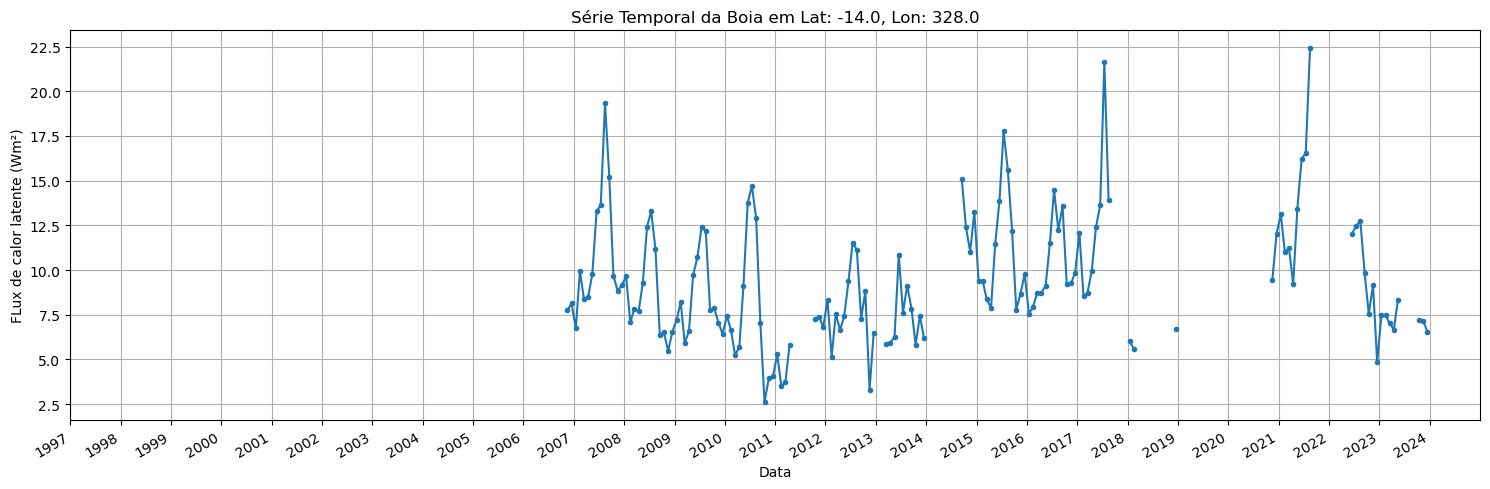

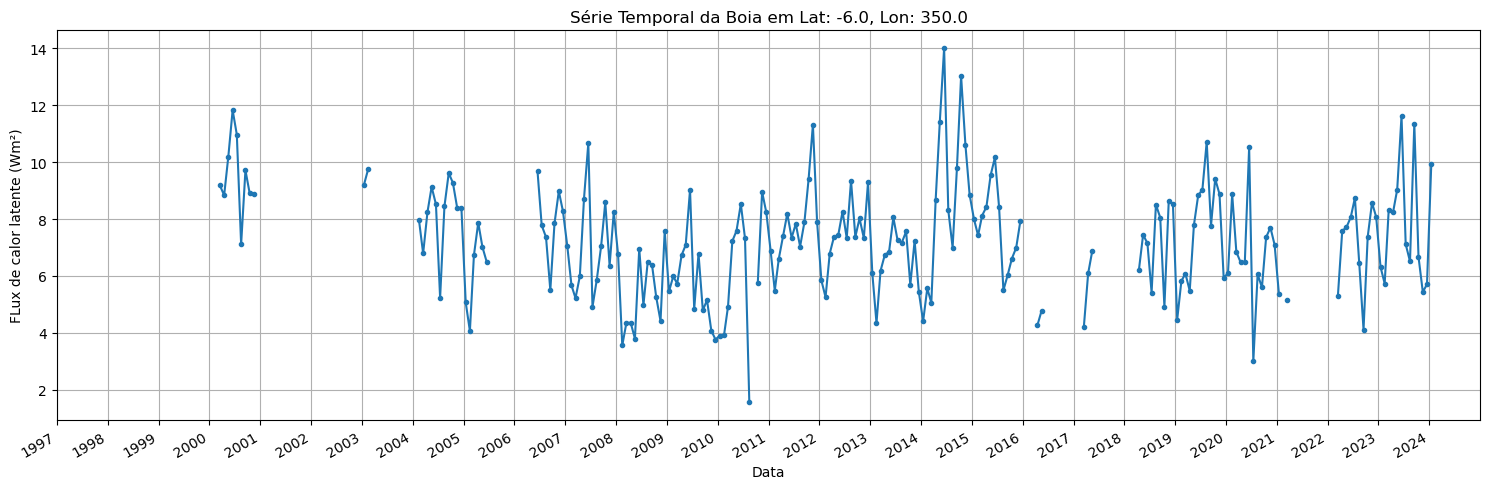

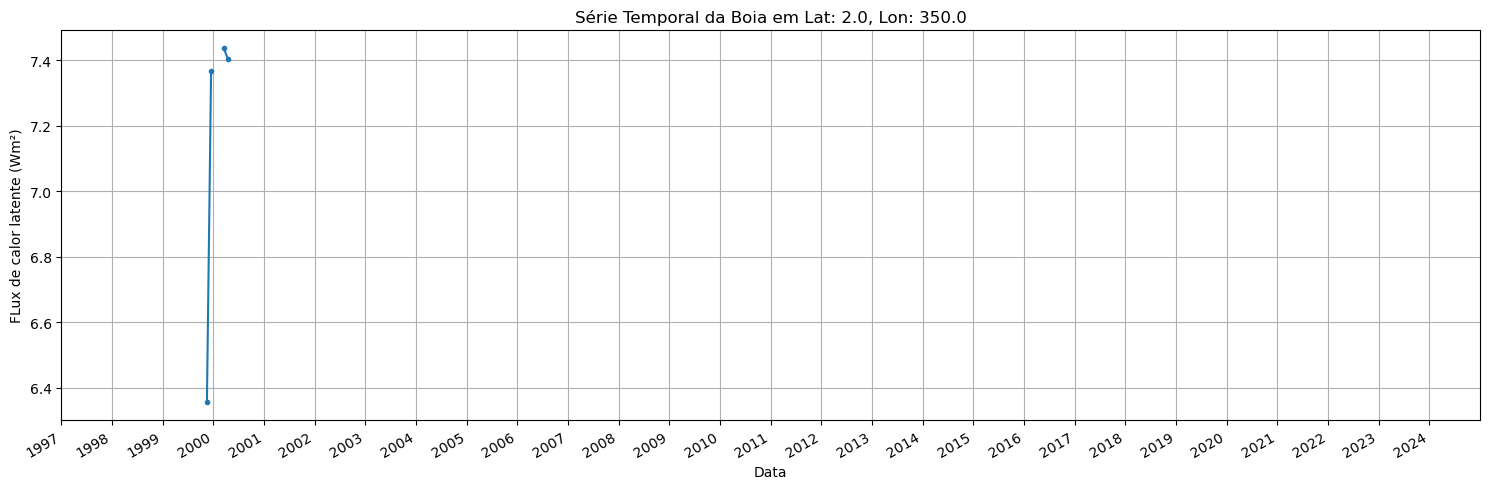

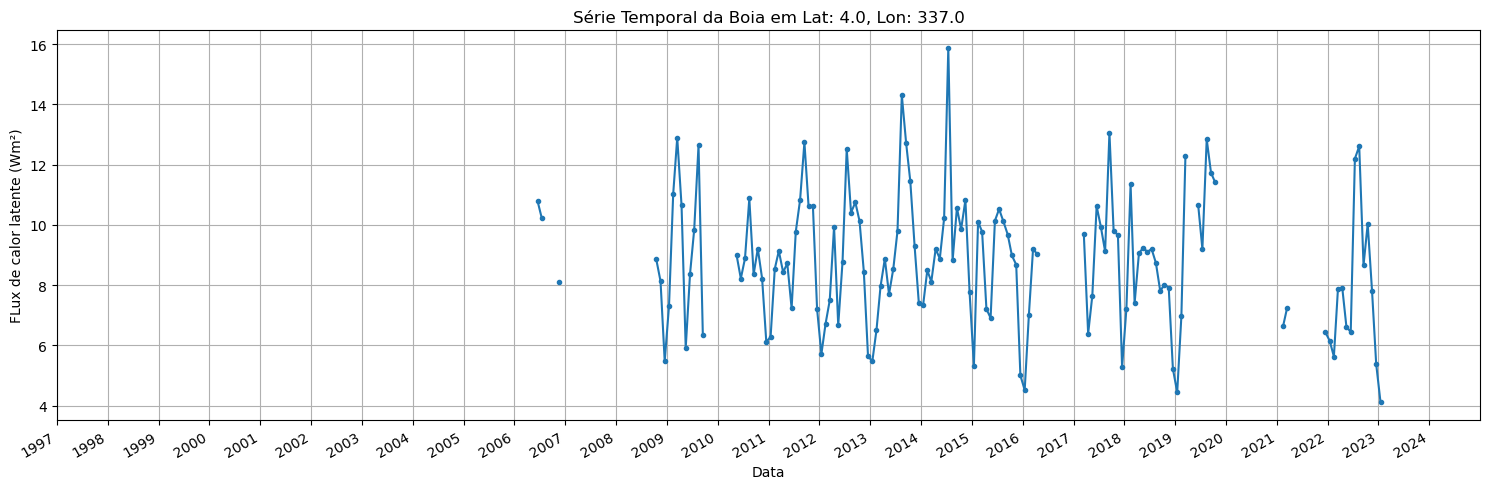

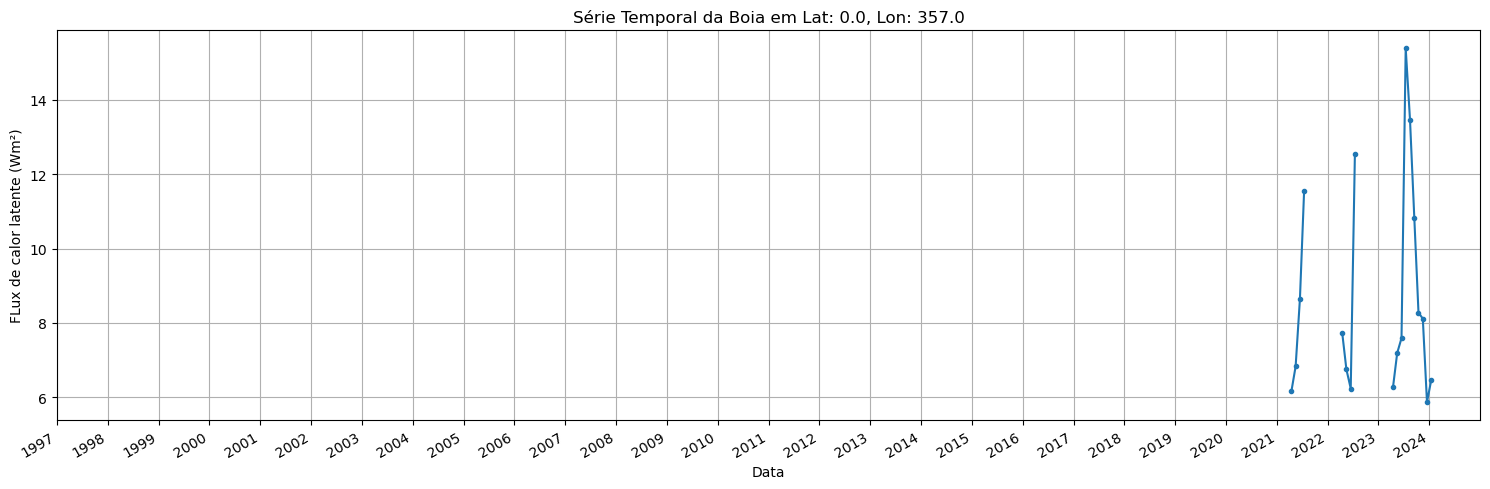

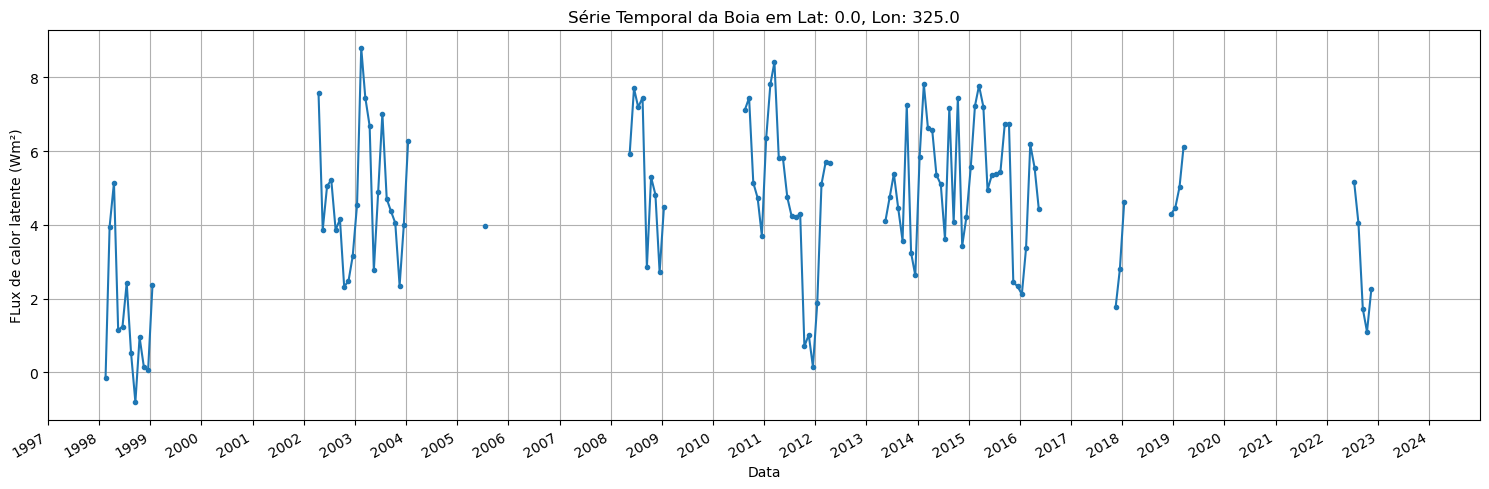

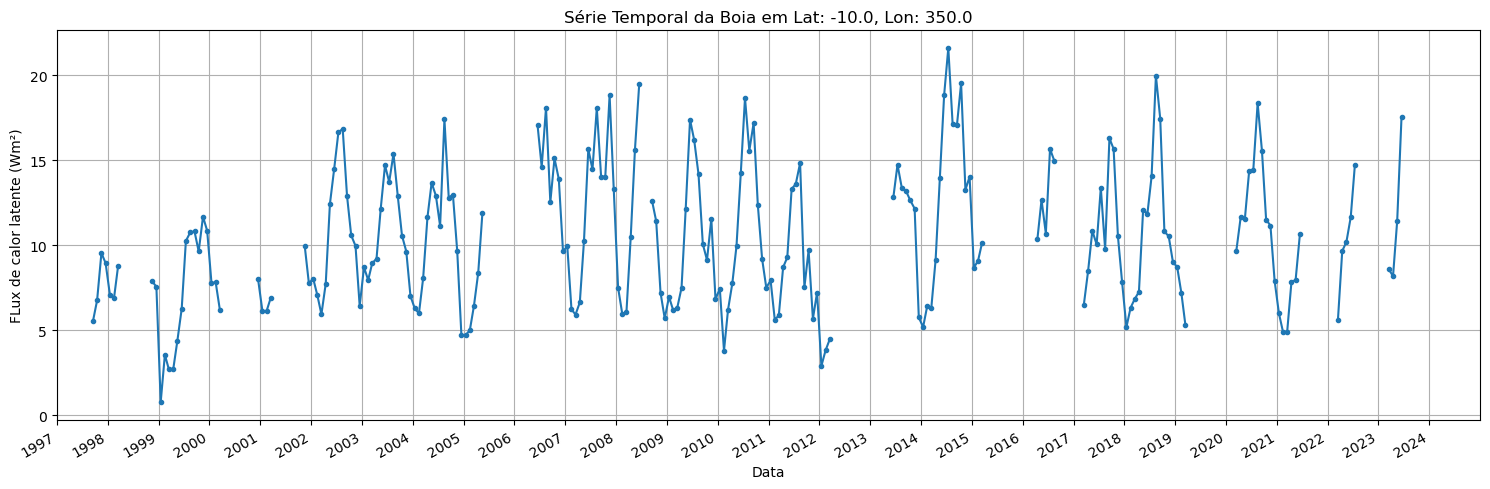

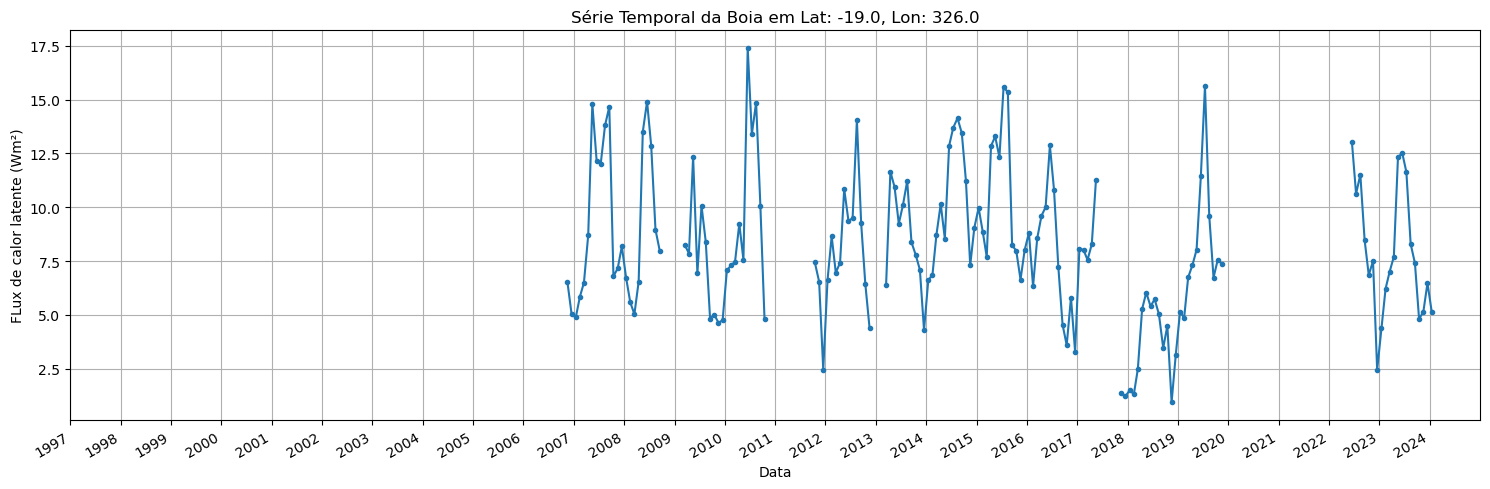

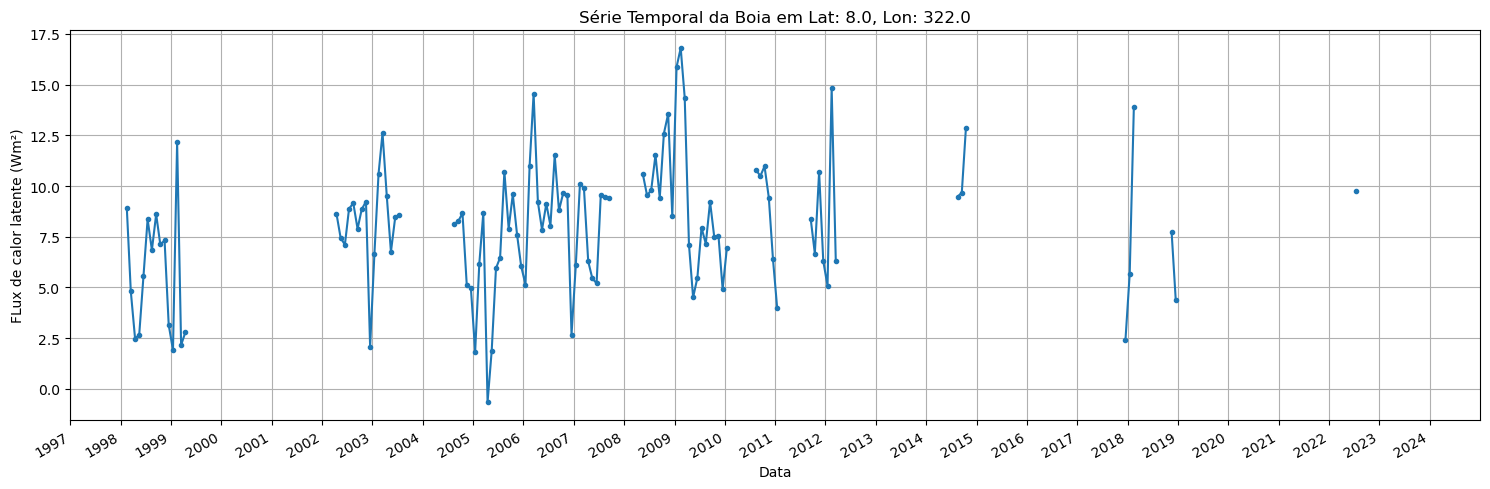

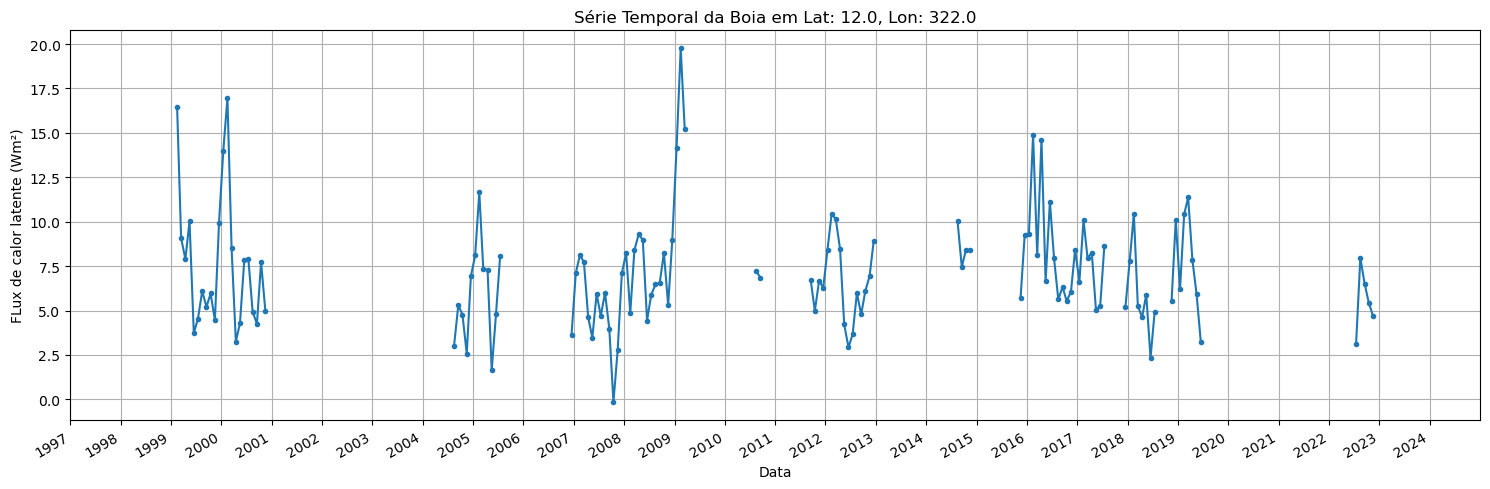

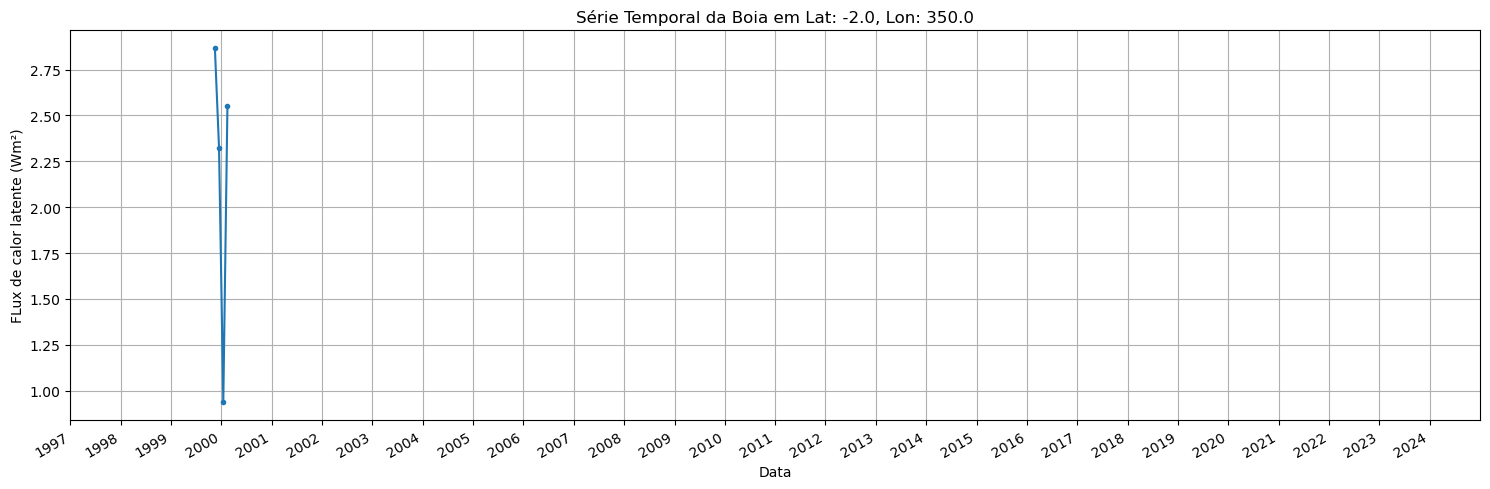

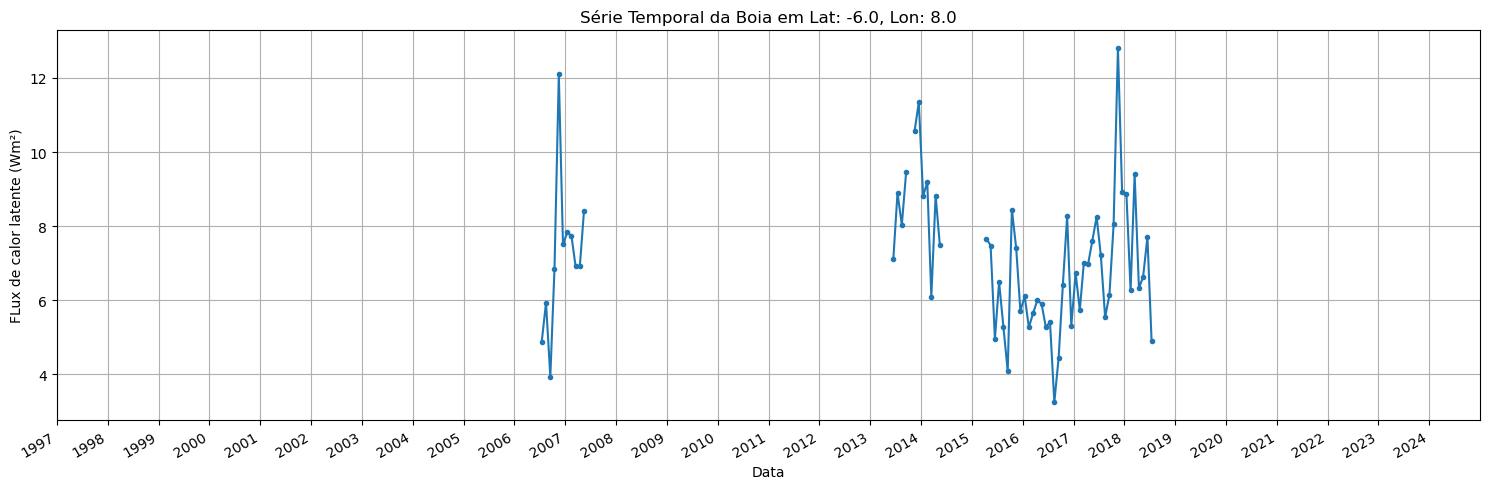

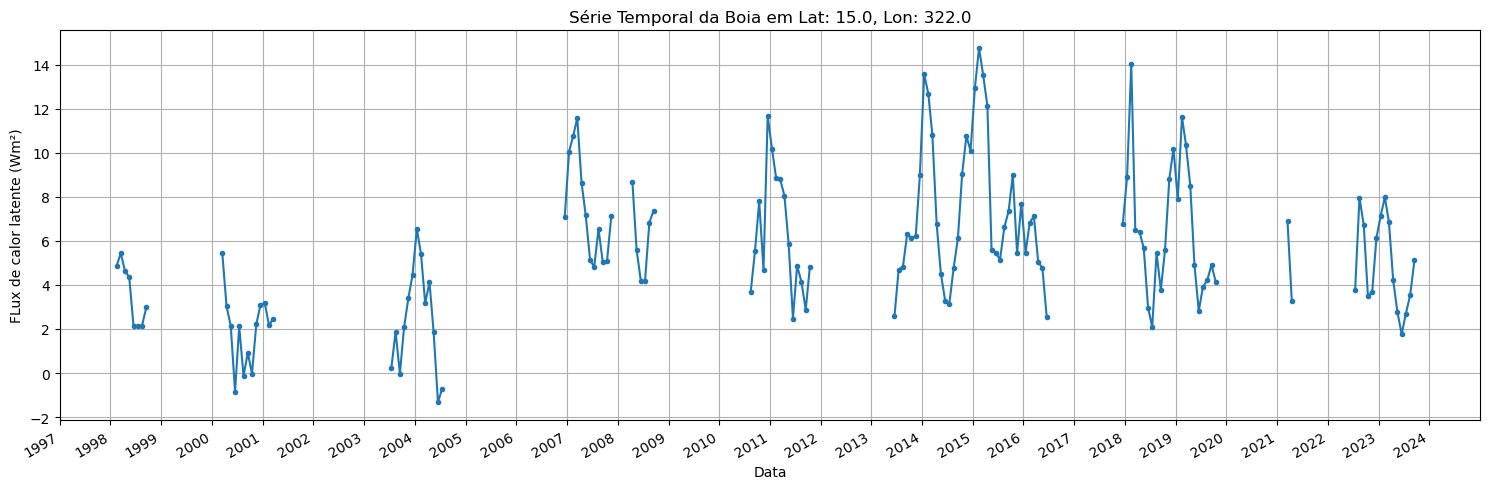

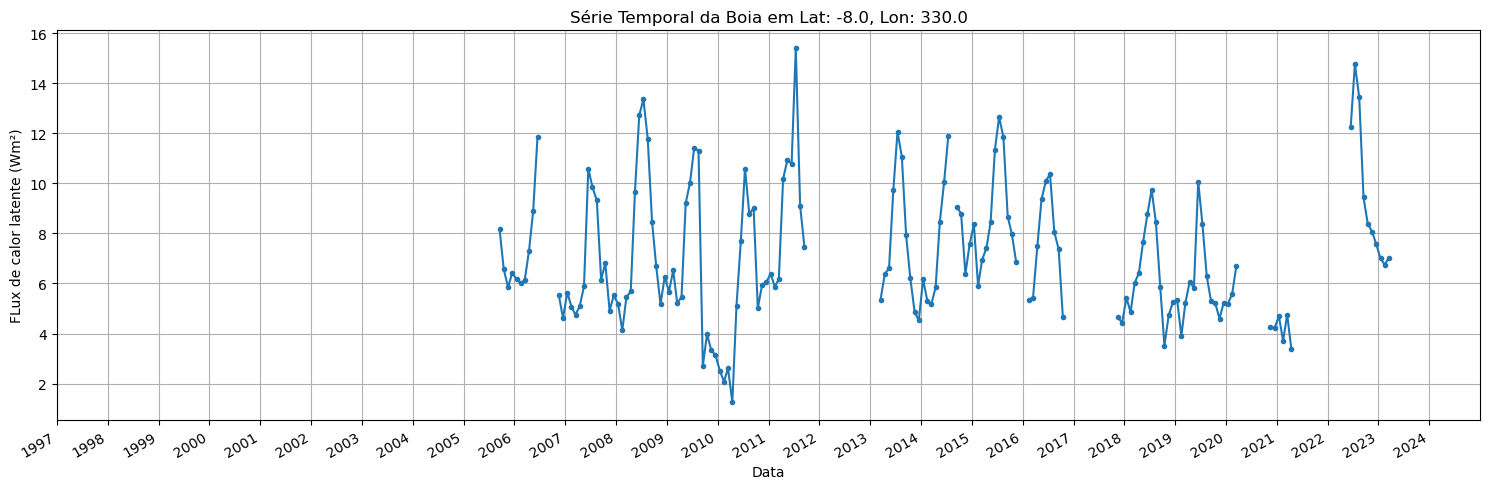

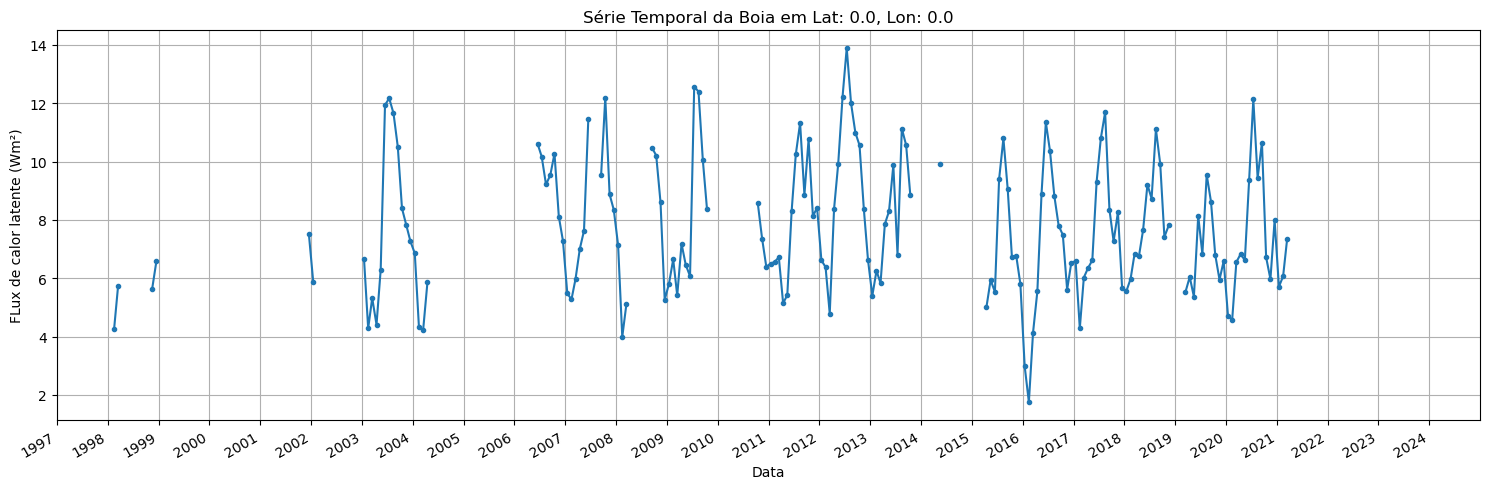

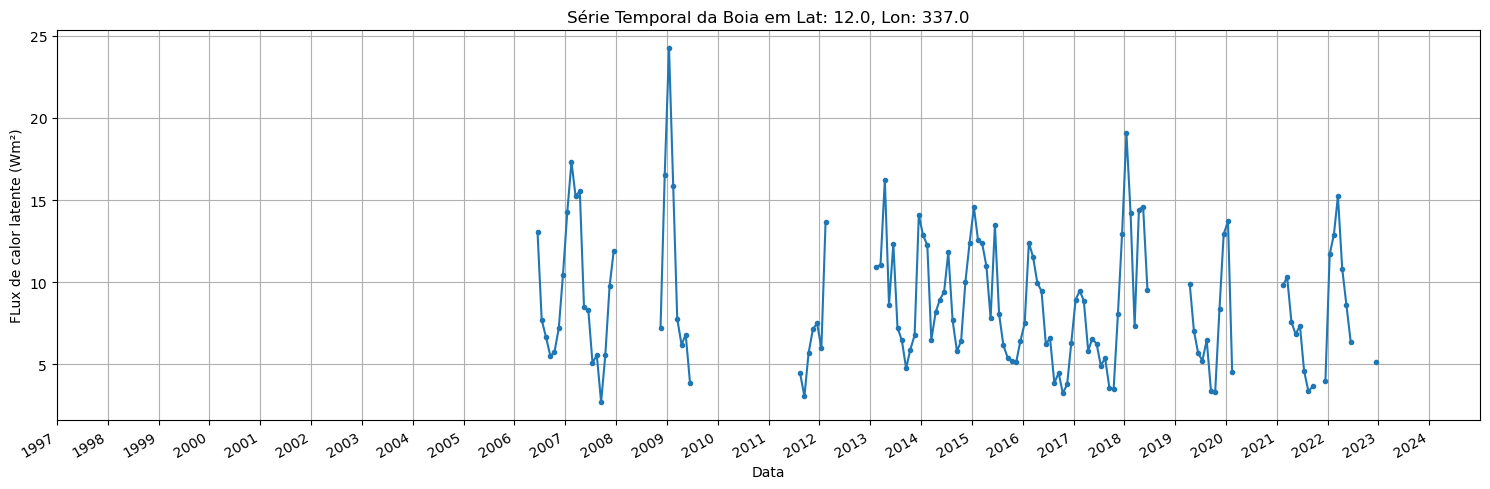

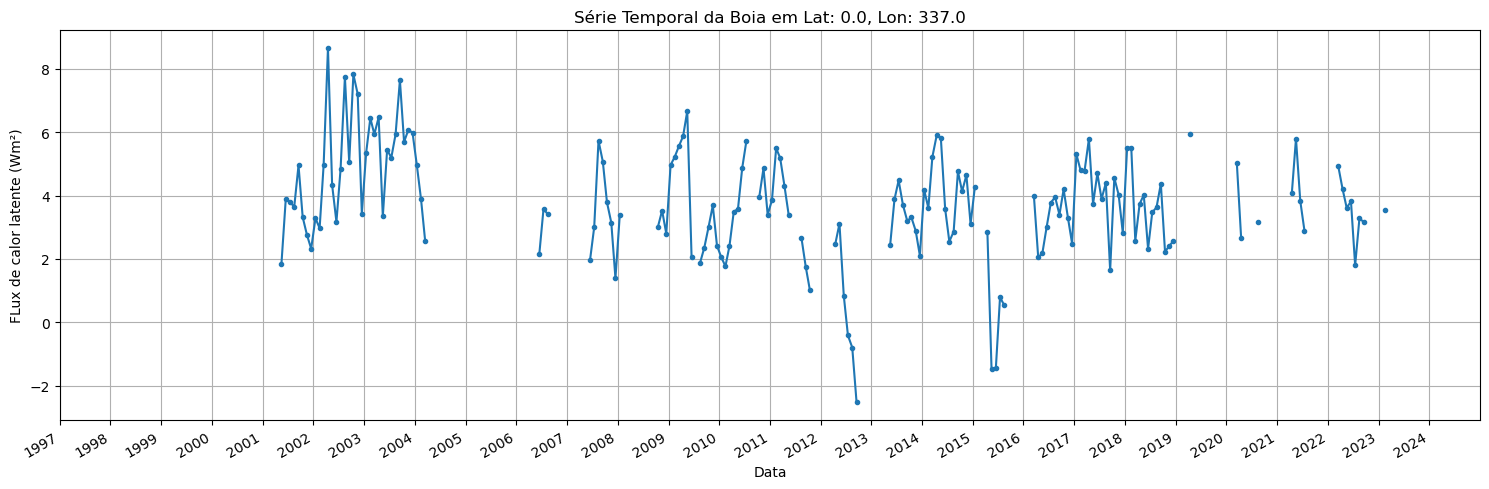

In [5]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]  # A variável 'time' geralmente está em dias desde uma data base
    temperatura = ds.variables['QS_138'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze() 

    # Converte o tempo de unidades relativas (dias desde uma data) para objetos datetime
    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    return lat, lon, datas, temperatura

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/sensivel/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

def plotar_serie_temporal(datas, temperatura, titulo):
    plt.figure(figsize=(15,5))  # Ajuste o tamanho conforme necessário

    # Converte objetos 'cftime.DatetimeGregorian' para 'datetime.datetime'
    datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
    datas_num = mdates.date2num(datas_convertidas)  # Converte para o formato numérico do Matplotlib

    temperatura = np.array(temperatura)
    
    plt.plot(datas_num, temperatura, '-o', markersize=3)
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('FLux de calor sensível (Wm²)')
    plt.grid(True)
    
    # Define os limites do eixo x para o intervalo de interesse
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    
    # Formatar o eixo x para mostrar apenas o ano
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    plt.gcf().autofmt_xdate()  # Rotação automática das datas para melhor visualização
    plt.tight_layout()  # Ajuste automático do layout
    plt.show()

for arquivo in arquivos_netCDF:
    lat, lon, datas, temperatura = ler_dados(arquivo)
    titulo = f"Série Temporal da Boia em Lat: {lat.mean():.1f}, Lon: {lon.mean():.1f}"
    plotar_serie_temporal(datas, temperatura, titulo)

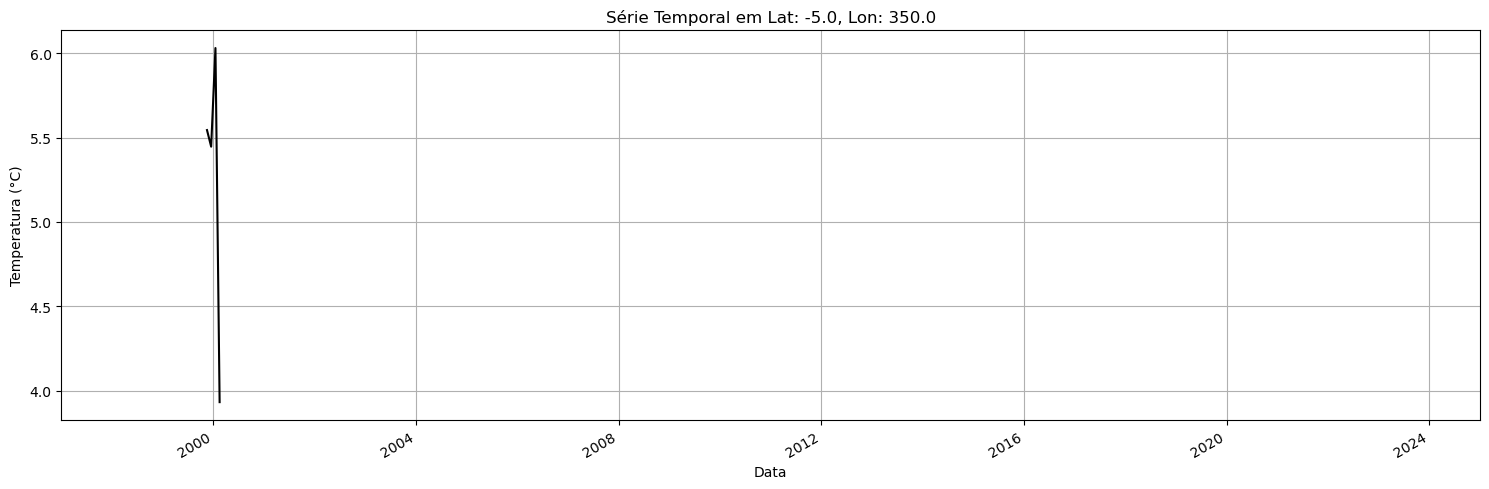

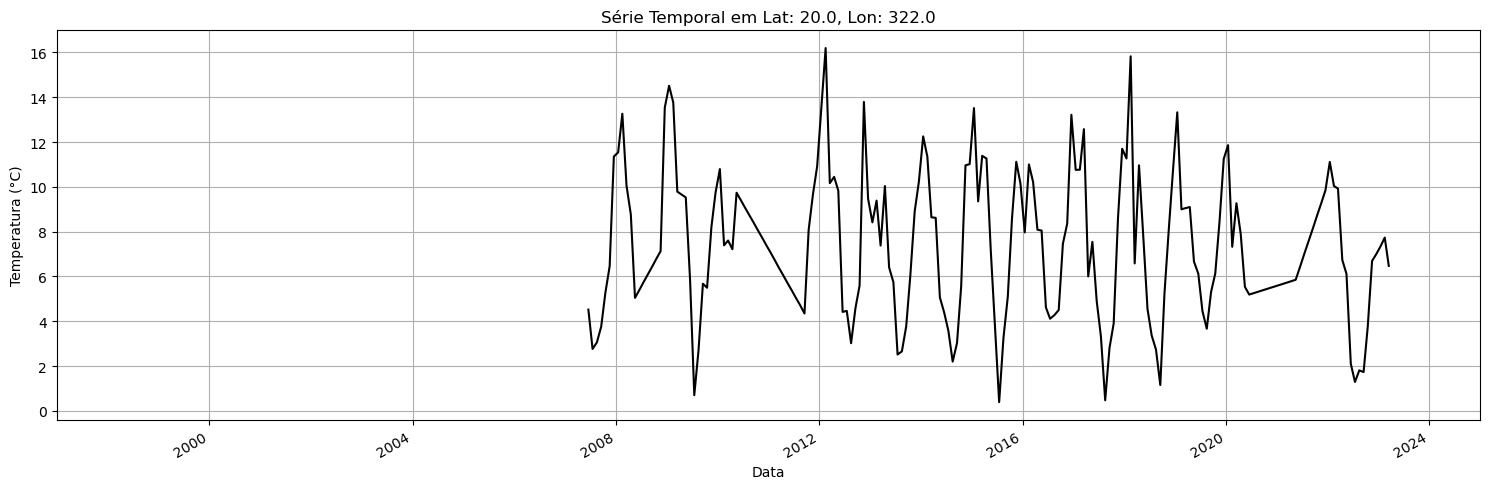

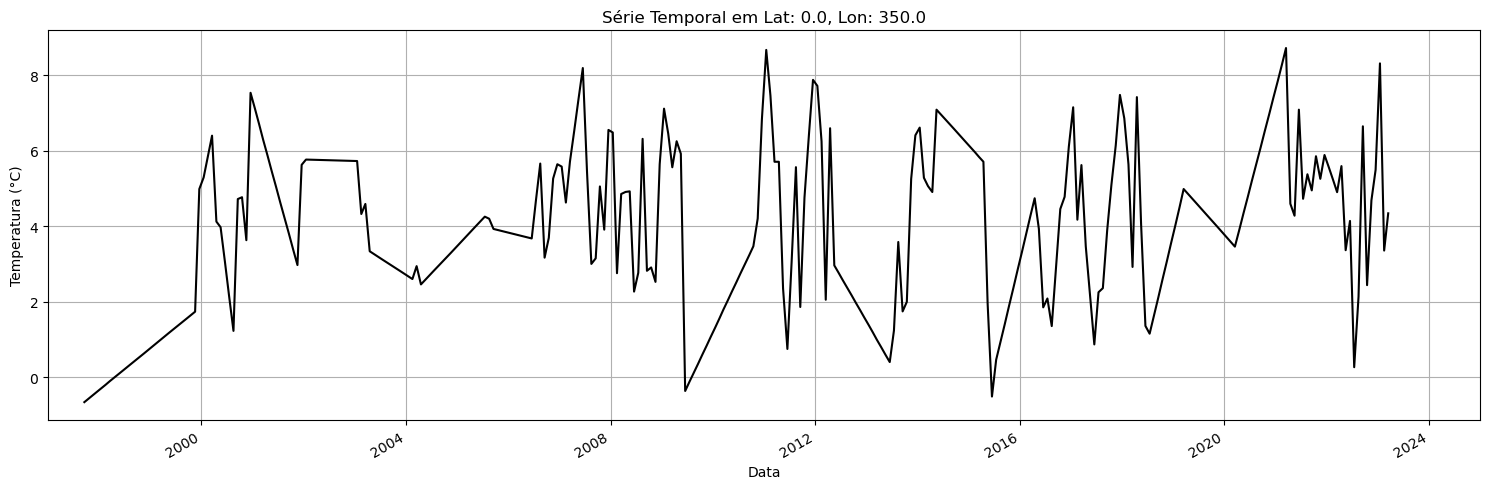

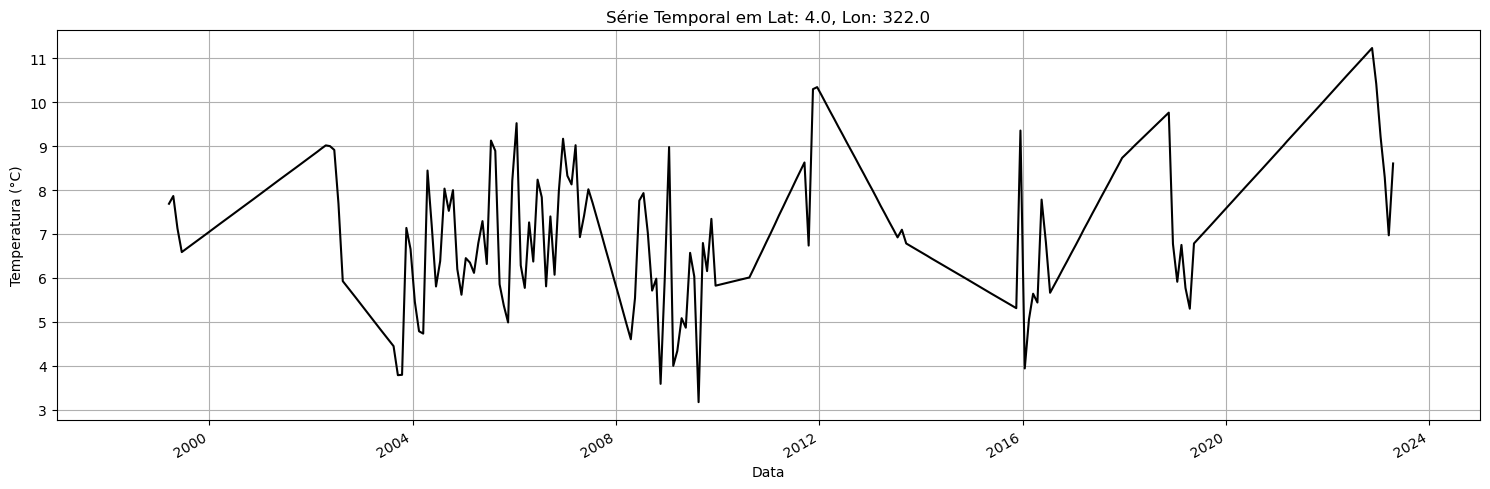

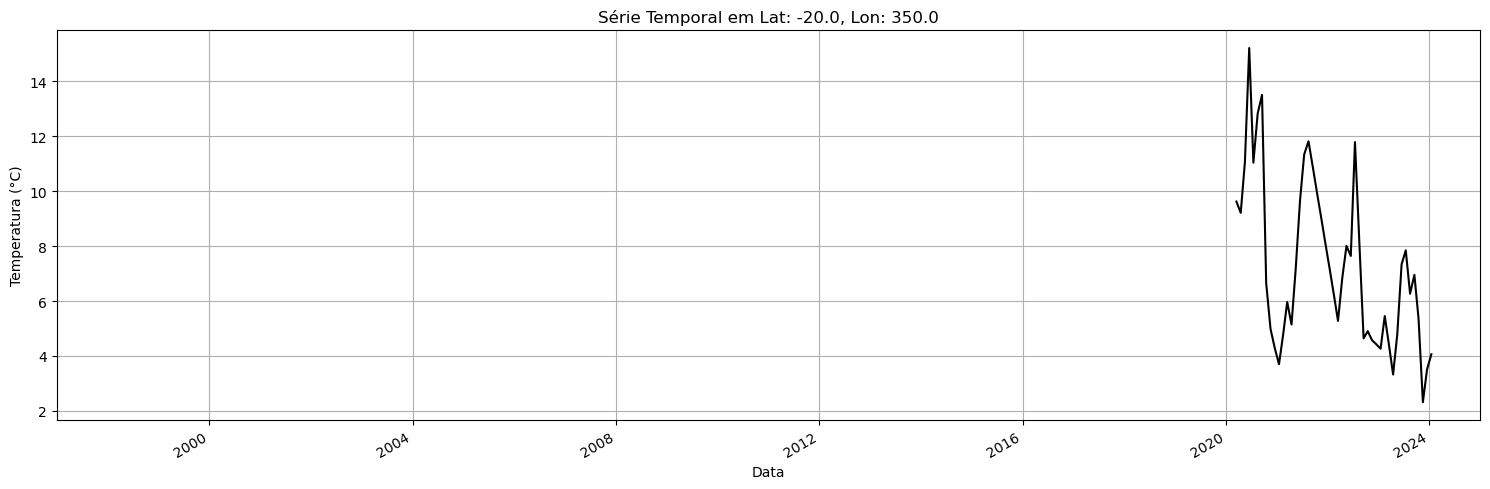

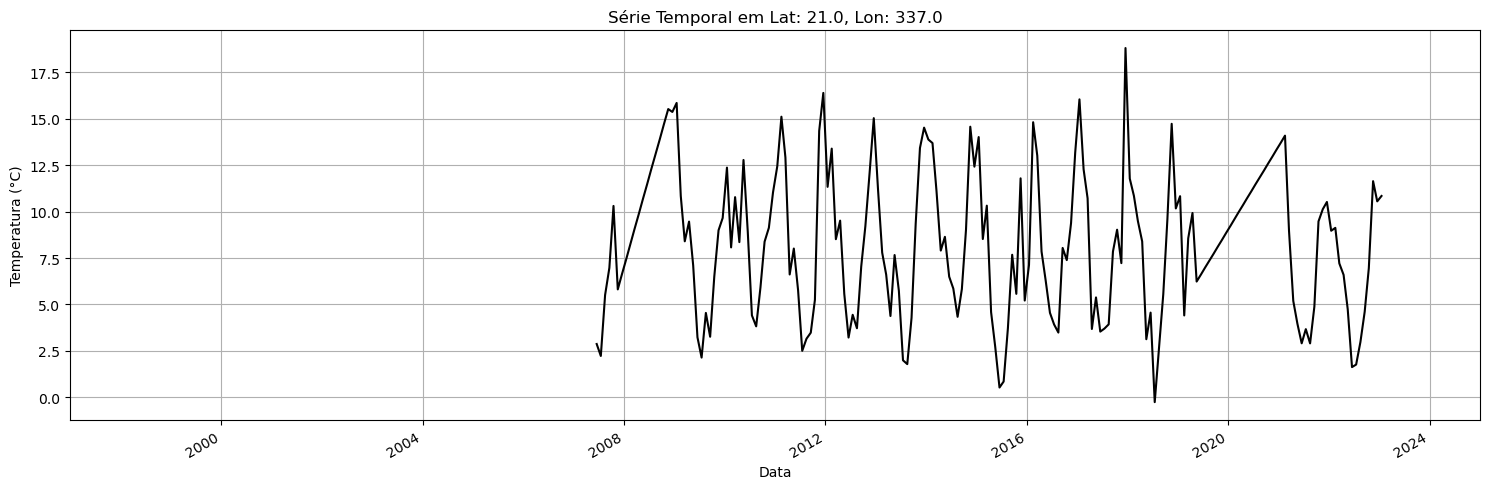

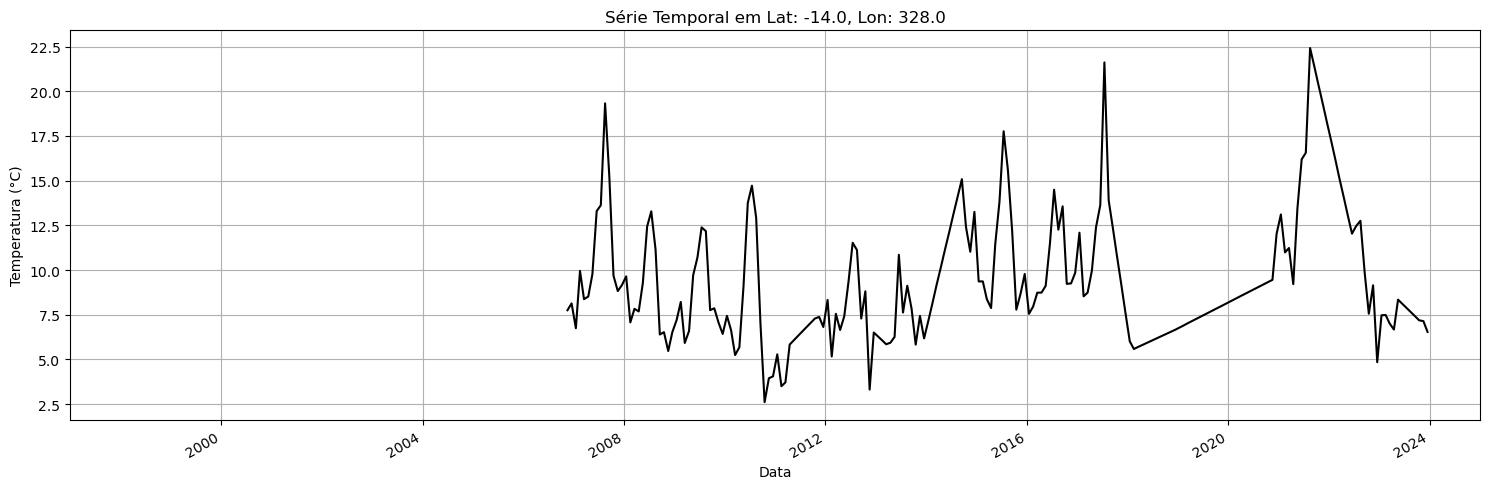

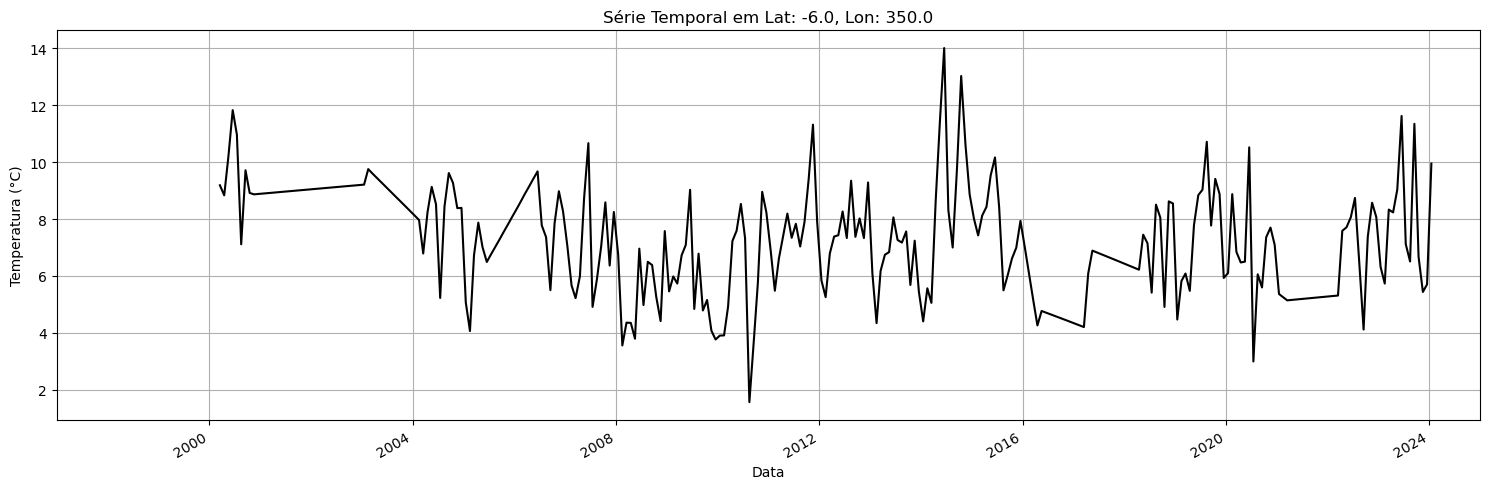

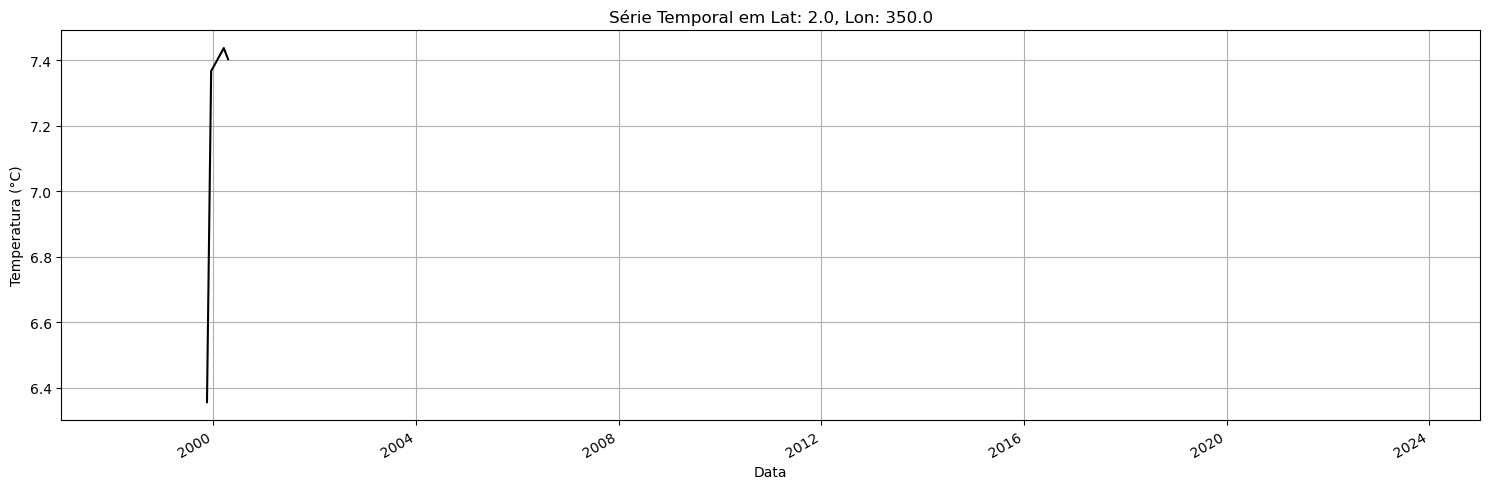

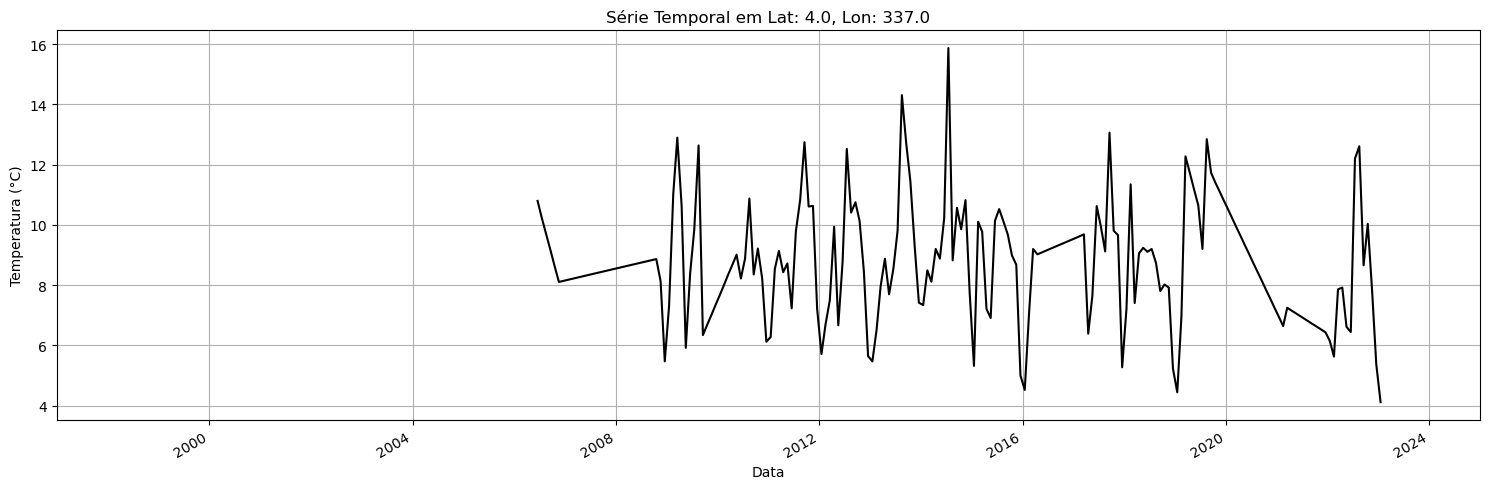

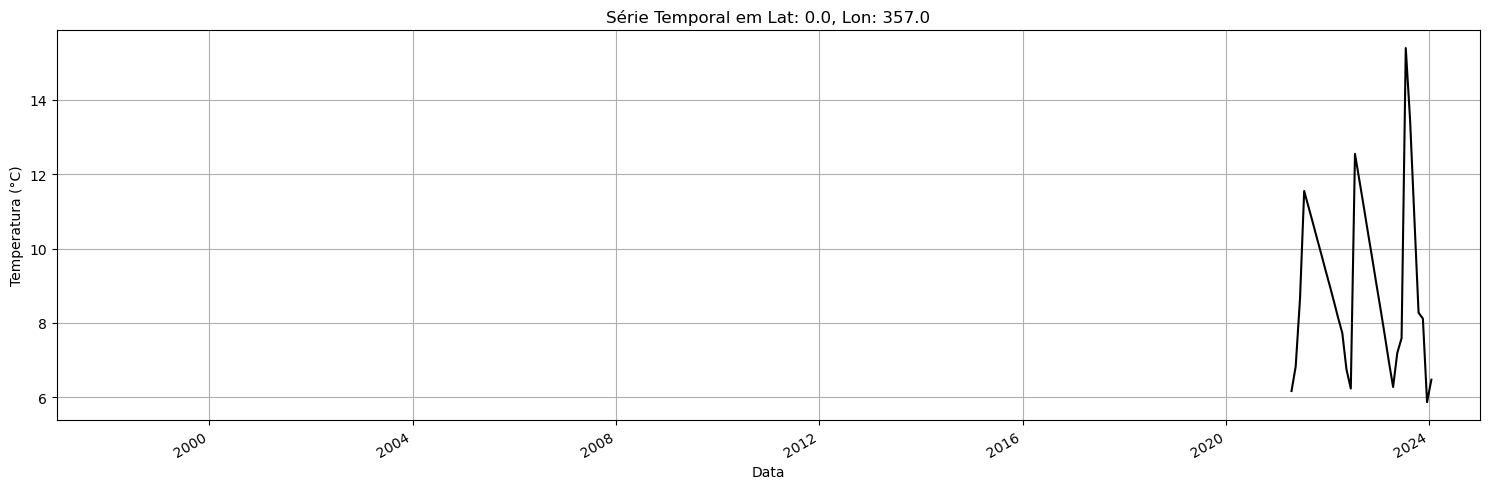

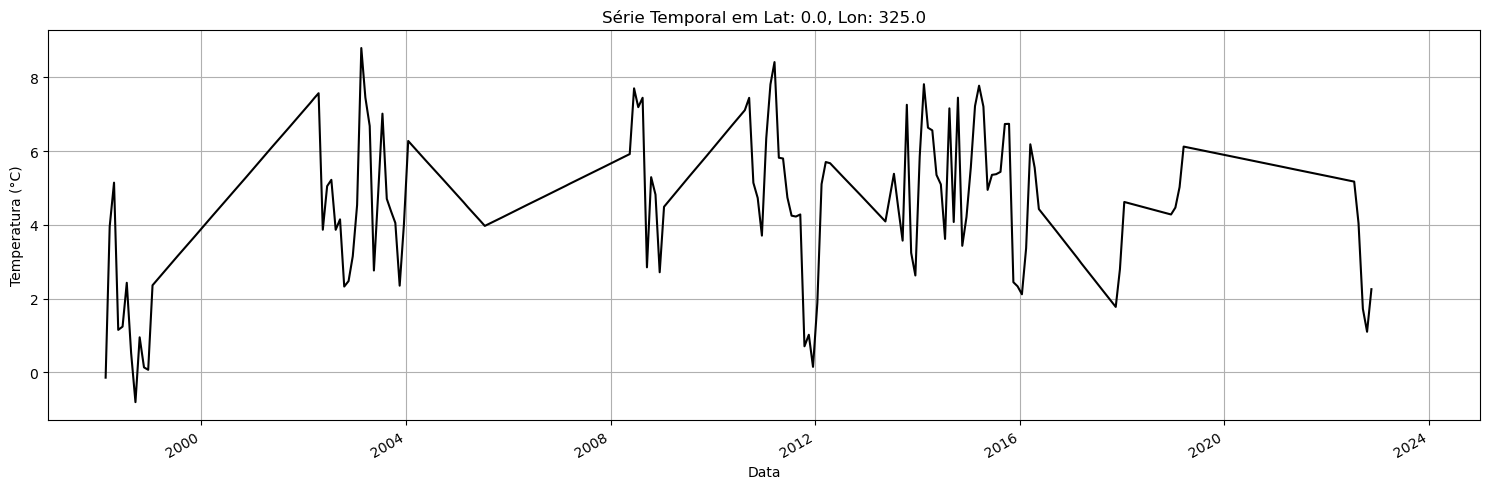

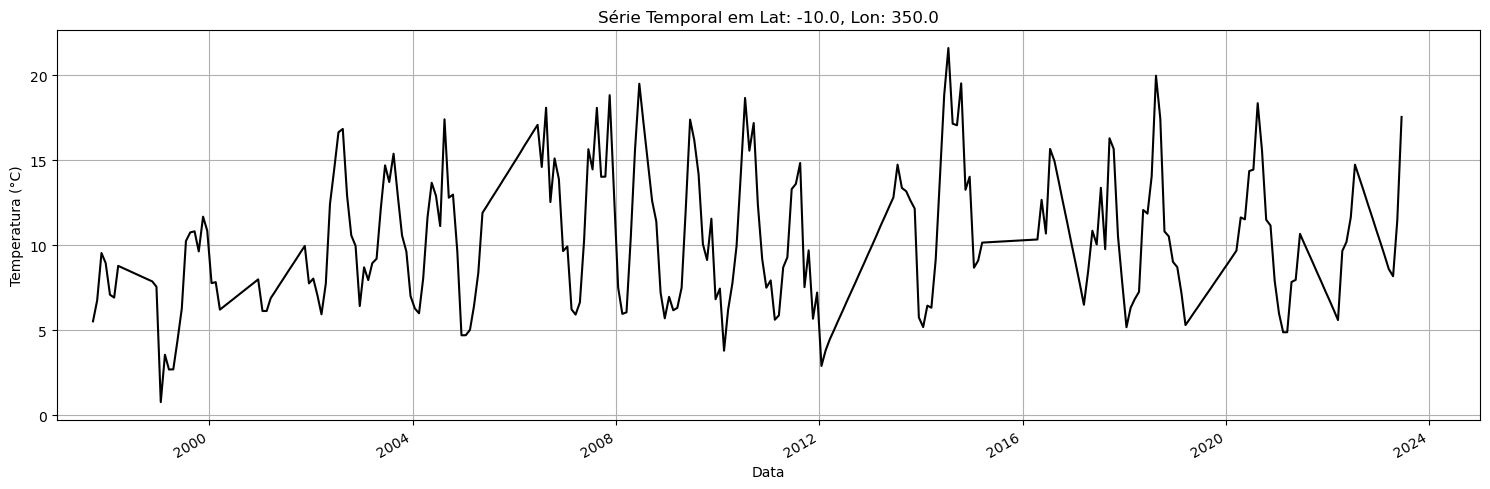

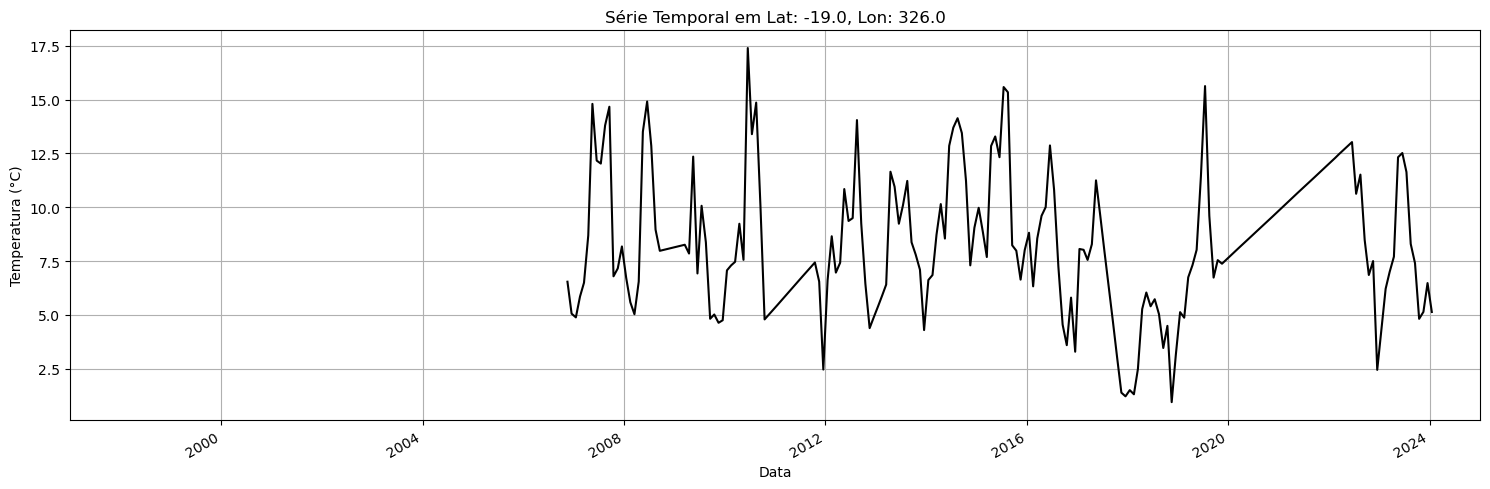

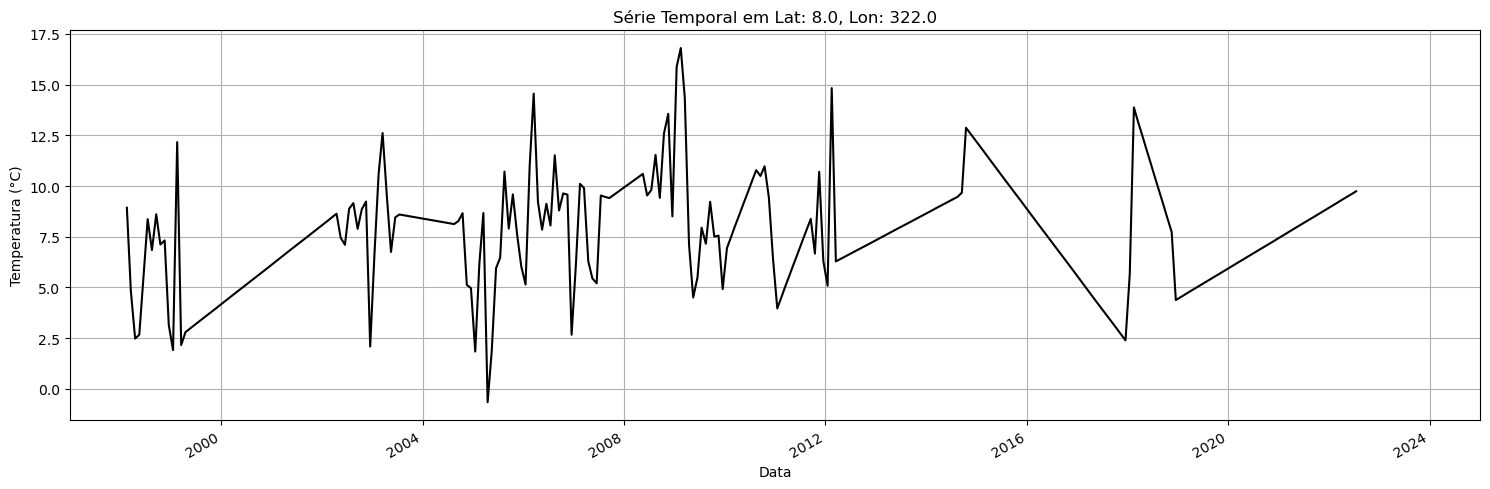

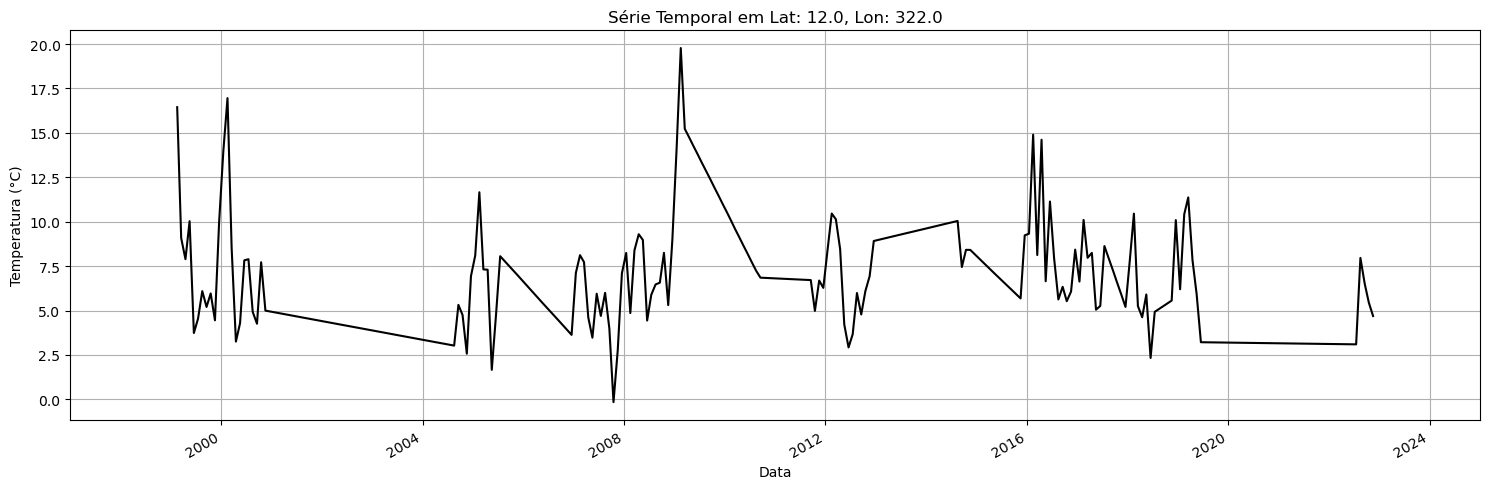

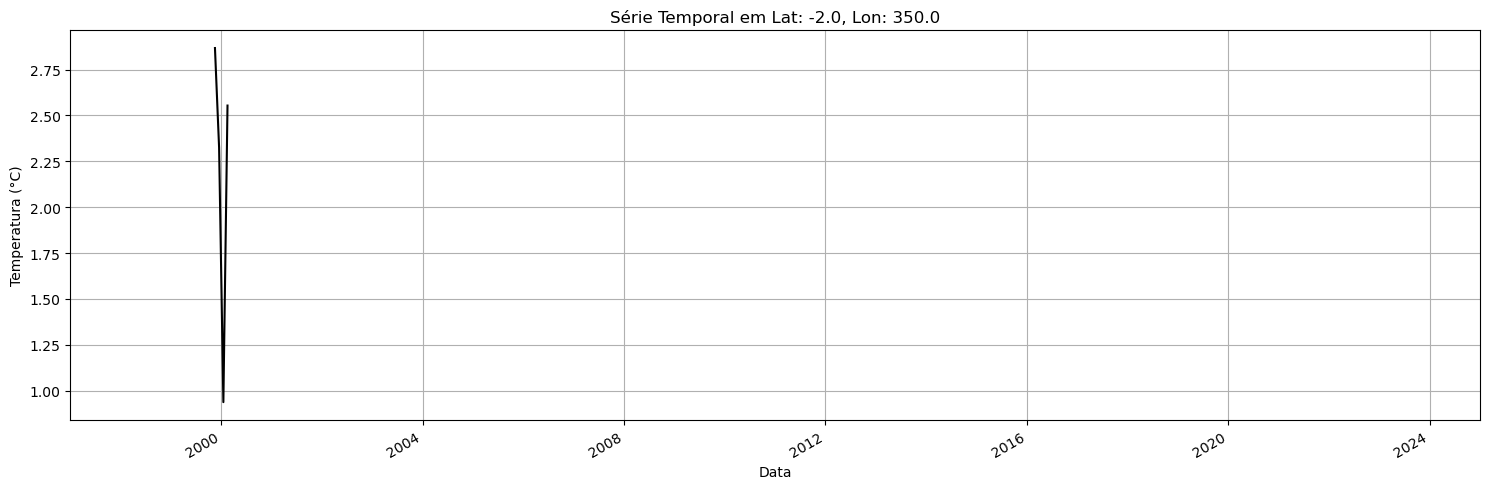

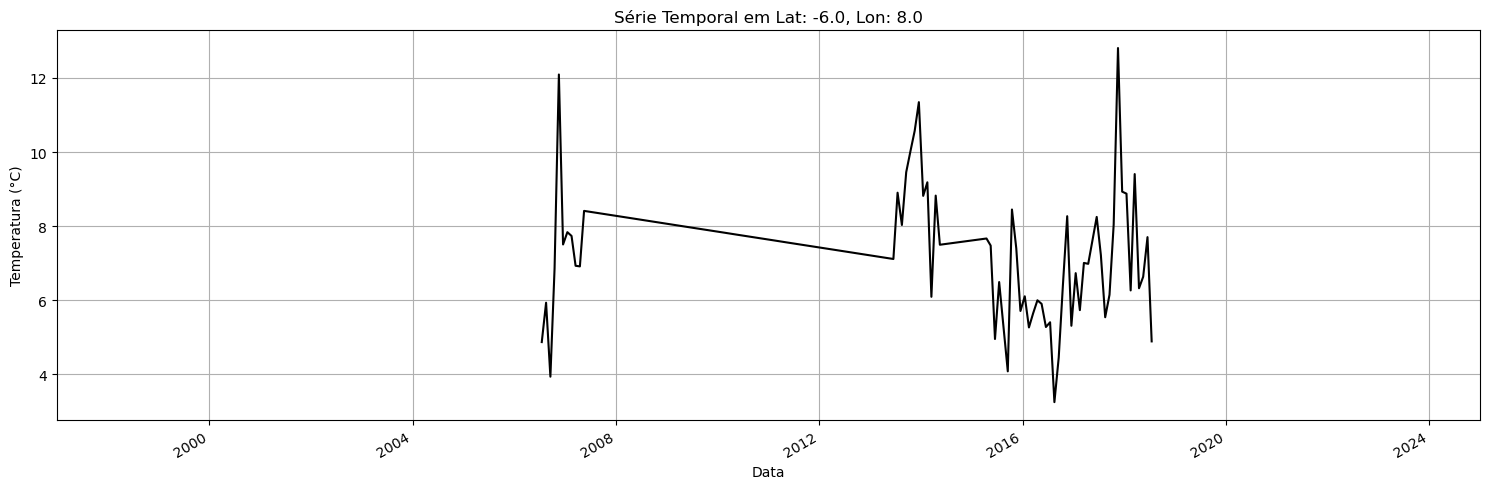

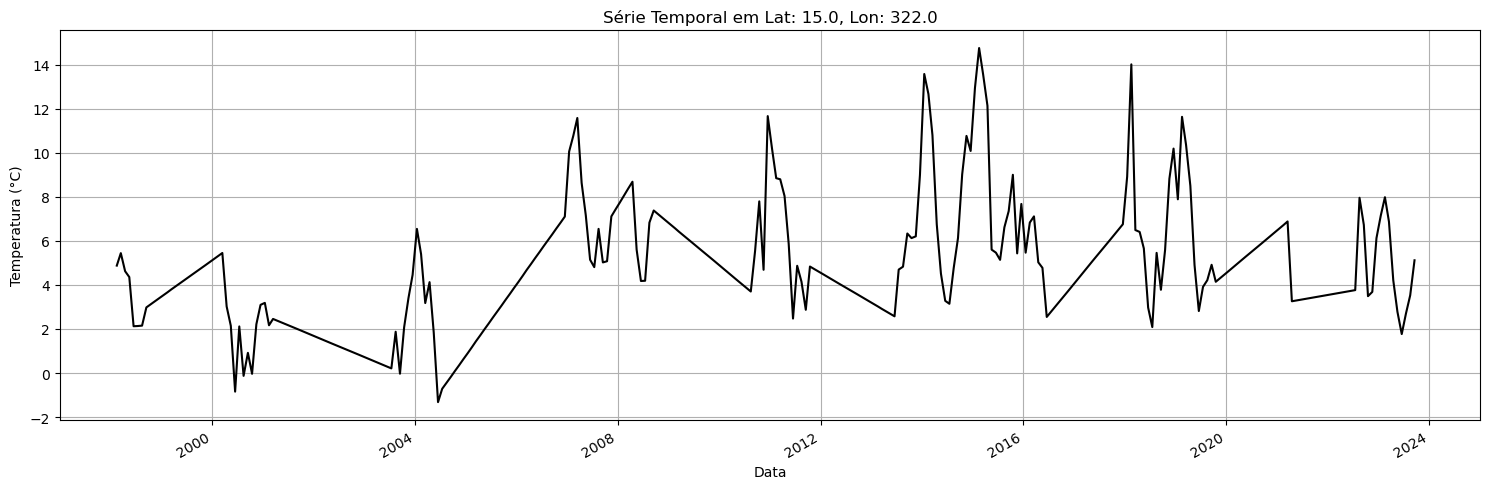

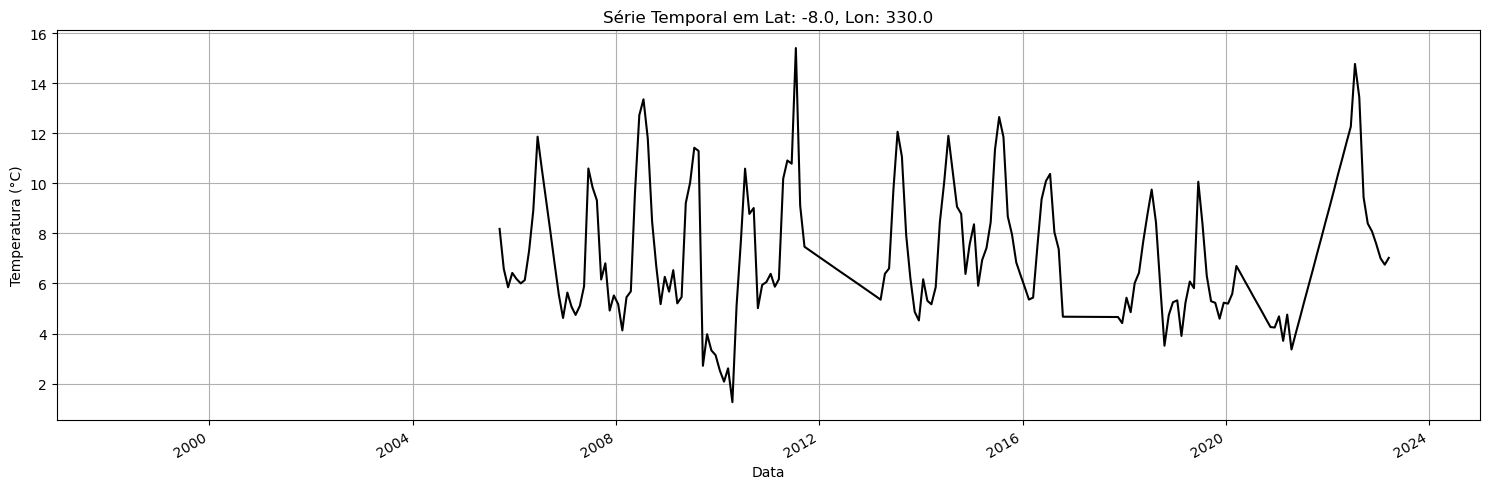

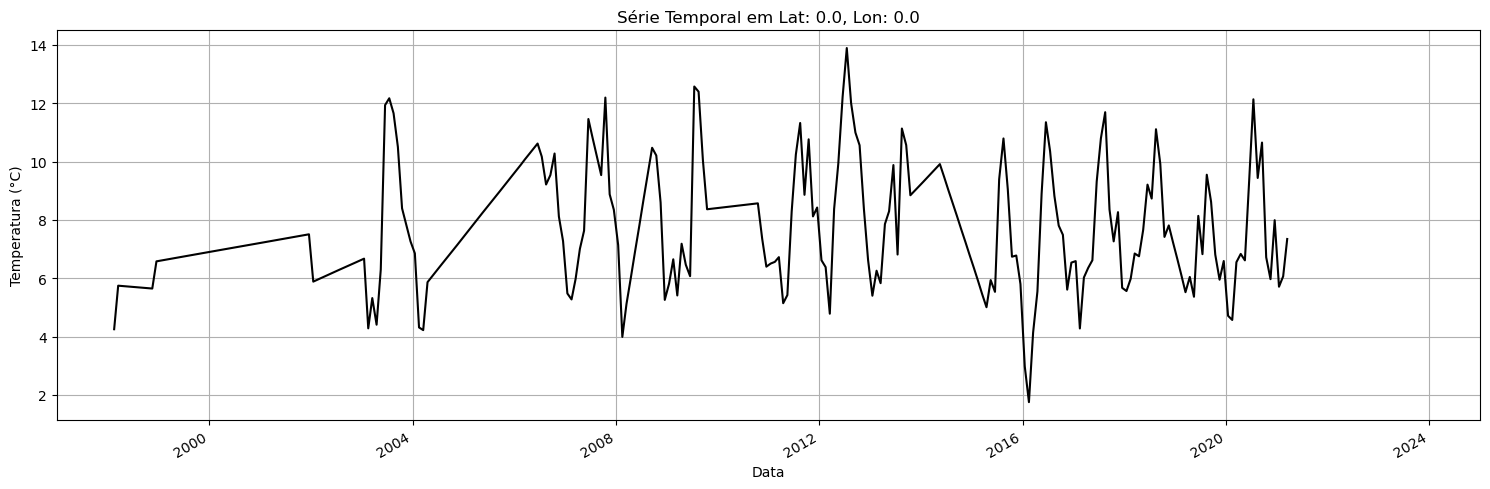

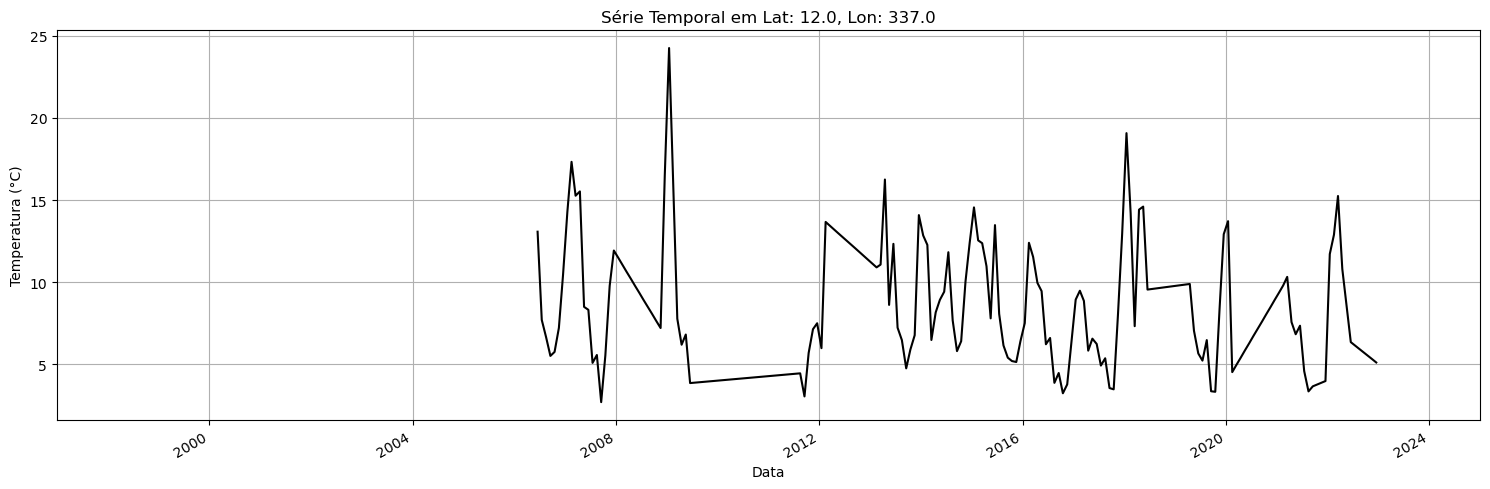

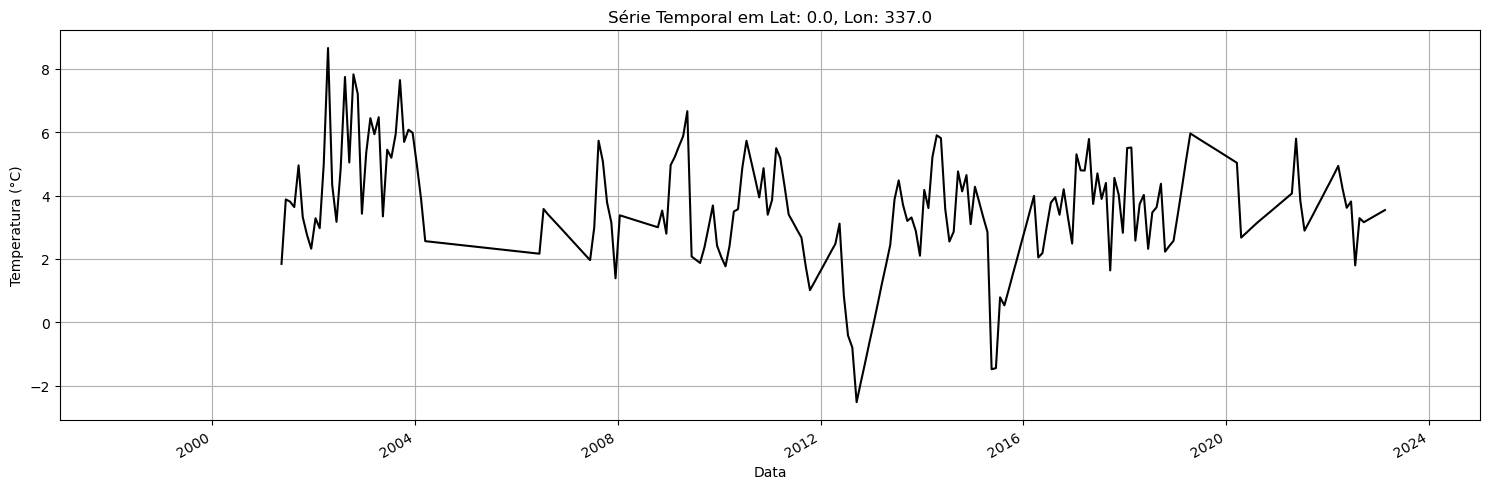

In [27]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['QS_138'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)
    
    # Convertendo objetos cftime para pandas.Timestamp
    datas_convertidas = [pd.Timestamp(data.strftime()) for data in datas]
    
    df = pd.DataFrame({
        'Temperatura': temperatura
    }, index=pd.DatetimeIndex(datas_convertidas))
    
    df['Temperatura_Interpolada'] = df['Temperatura'].interpolate(method='linear')
    
    return lat, lon, df

def plotar_serie_temporal(df, titulo):
    plt.figure(figsize=(15, 5))
    df_filtrado = df[(df.index >= pd.Timestamp('1997-01-01')) & (df.index <= pd.Timestamp('2024-12-31'))]
    df_filtrado['Temperatura_Interpolada'].plot(color='k', xlabel='Data', ylabel='Temperatura (°C)')
    
    plt.title(titulo)
    plt.grid(True)
    plt.xlim(pd.Timestamp('1997-01-01'), pd.Timestamp('2024-12-31'))
    plt.tight_layout()
    plt.show()

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/sensivel/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

for arquivo in arquivos_netCDF:
    lat, lon, df = ler_dados(arquivo)
    titulo = f"Série Temporal em Lat: {lat.mean():.1f}, Lon: {lon.mean():.1f}"
    plotar_serie_temporal(df, titulo)


In [29]:
%pip install git+https://github.com/mabelcalim/waipy.git

  Cloning https://github.com/mabelcalim/waipy.git to /tmp/pip-req-build-getb16l0
  Running command git clone --filter=blob:none --quiet https://github.com/mabelcalim/waipy.git /tmp/pip-req-build-getb16l0
  Resolved https://github.com/mabelcalim/waipy.git to commit bcba7430fb7f0de5f6732f74634d9ac11ebb380a
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


Nr of Scales: 28
scales [0.16666666666666666, 0.19820118583378682, 0.23570226039551584, 0.2802988050845715, 0.3333333333333333, 0.39640237166757364, 0.4714045207910317, 0.560597610169143, 0.6666666666666666, 0.7928047433351473, 0.9428090415820634, 1.121195220338286, 1.3333333333333333, 1.5856094866702946, 1.8856180831641267, 2.242390440676572, 2.6666666666666665, 3.171218973340589, 3.7712361663282534, 4.484780881353144, 5.333333333333333, 6.342437946681178, 7.542472332656507, 8.969561762706288, 10.666666666666666, 12.684875893362356, 15.084944665313014, 17.939123525412576, 21.333333333333332]


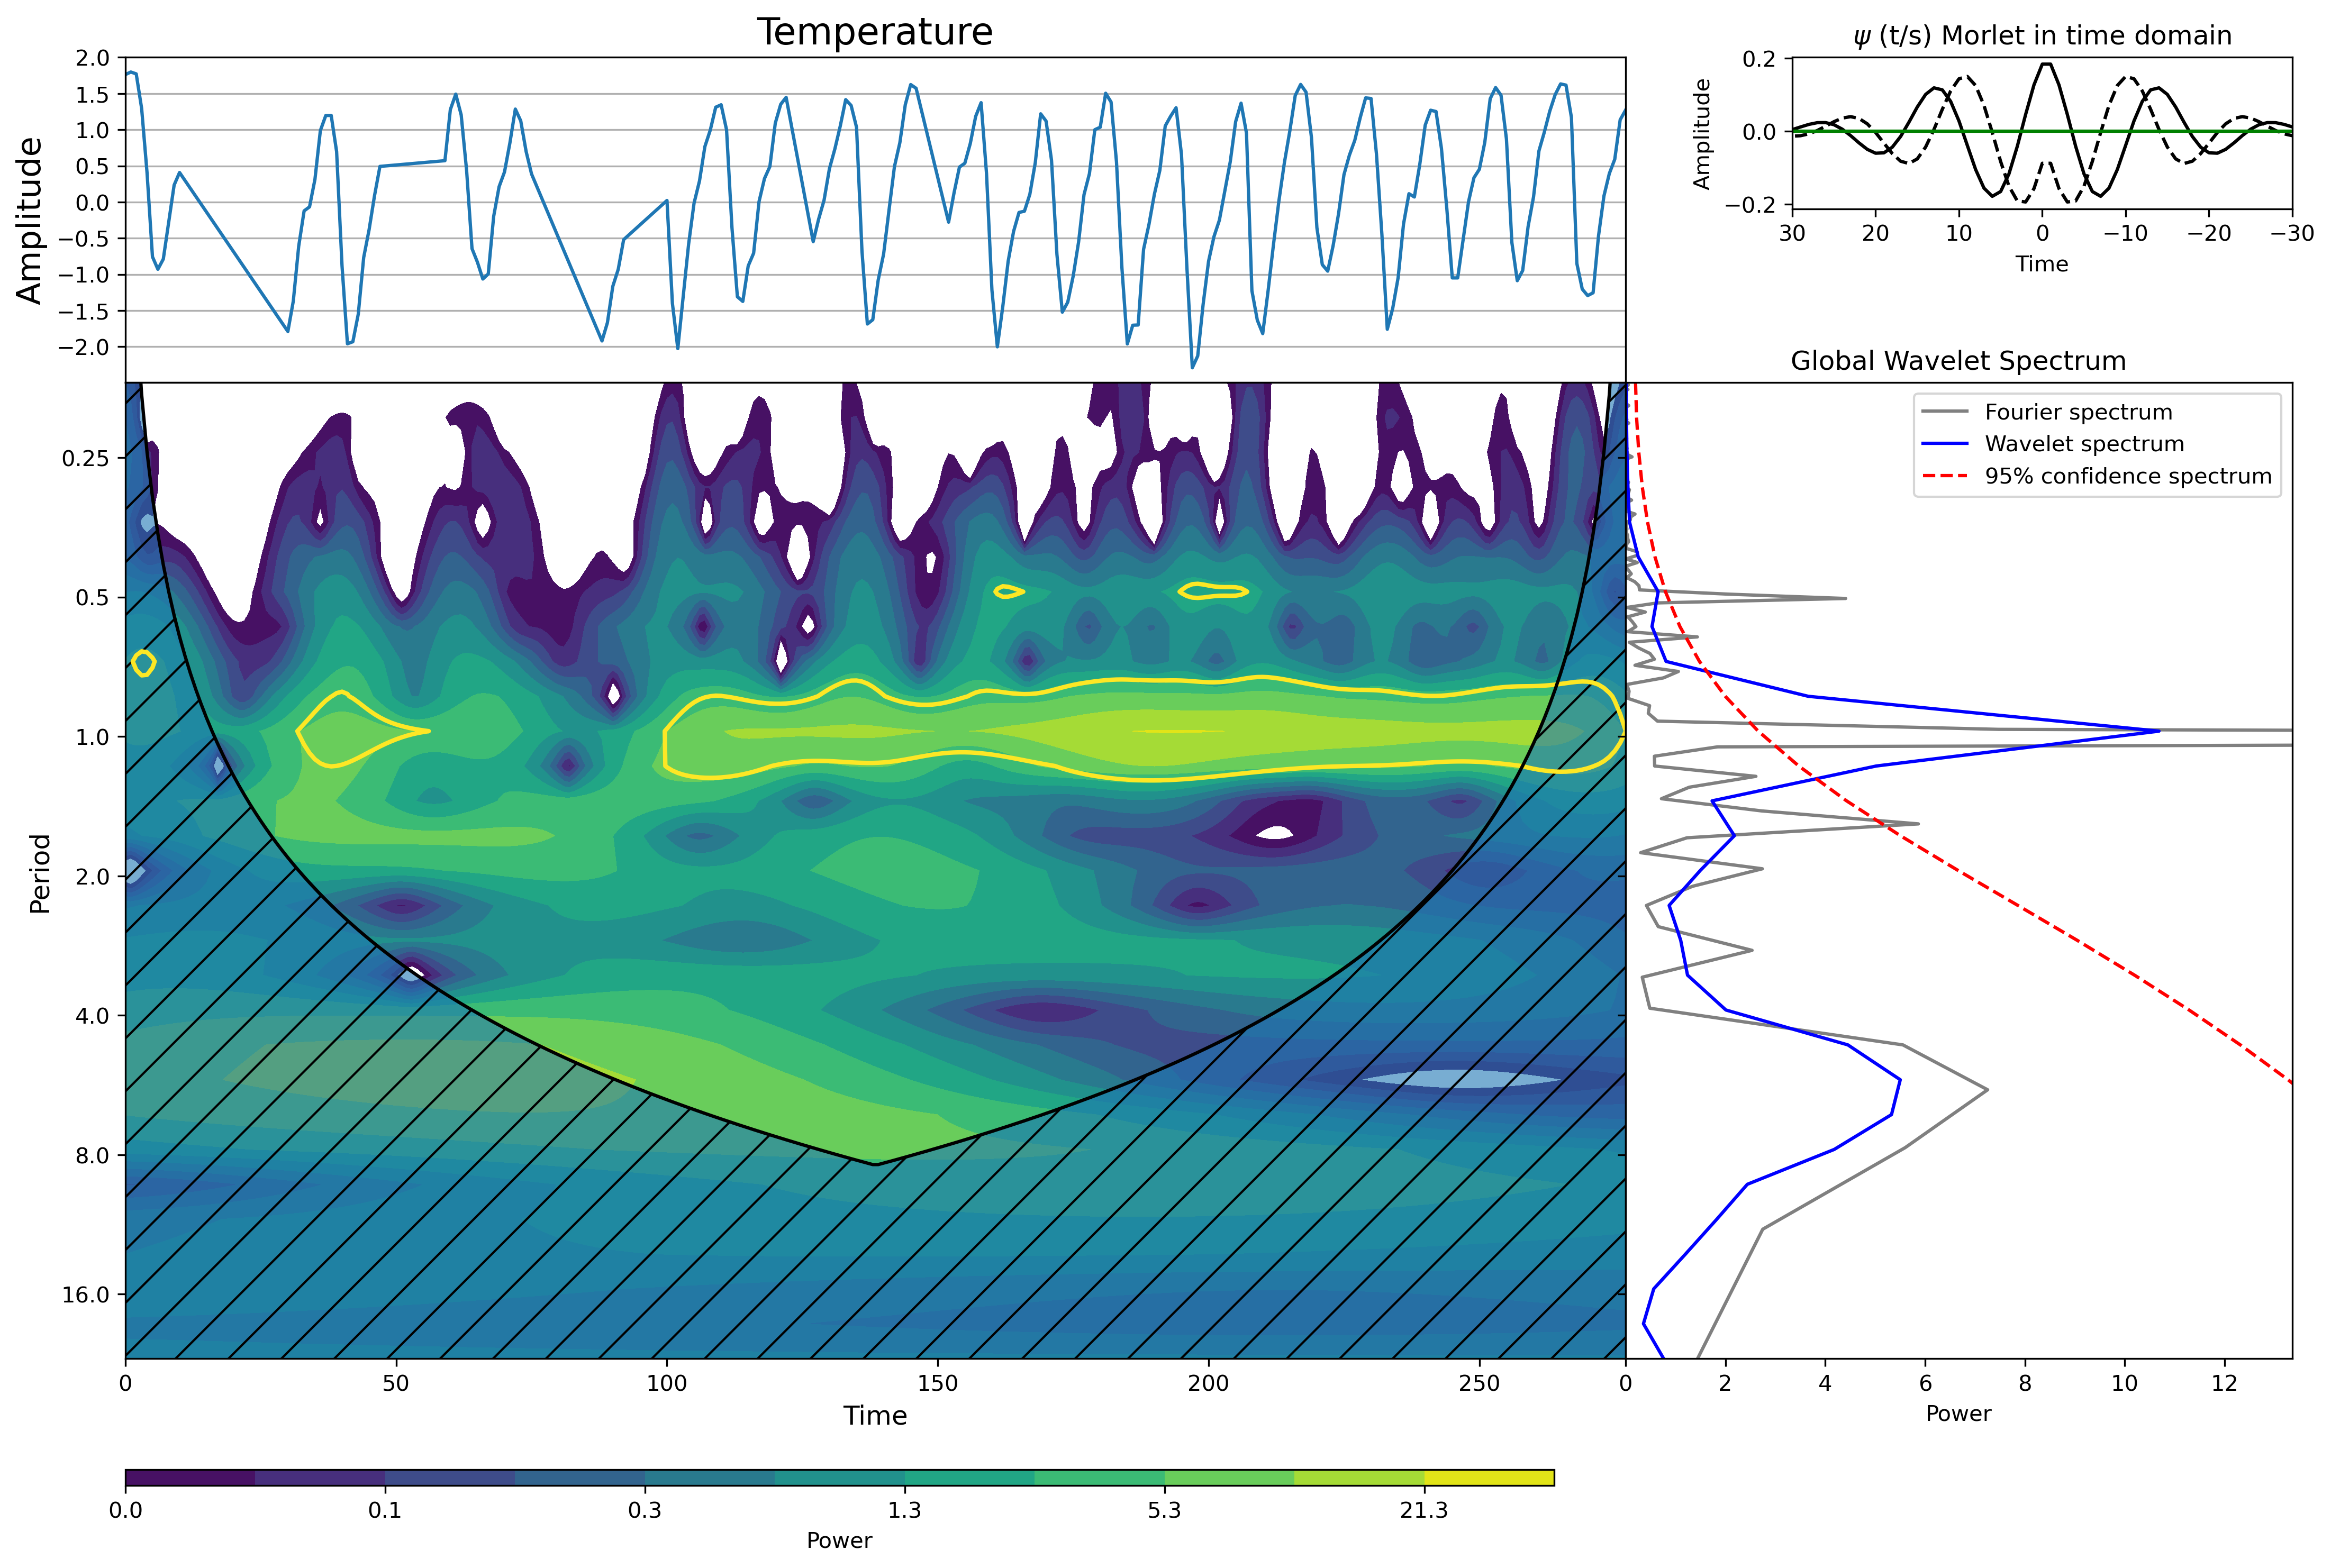

In [40]:
import glob
import netCDF4 as nc
import numpy as np
import pandas as pd
import waipy

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['AT_21'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)
    datas_convertidas = [pd.Timestamp(data.strftime()) for data in datas]
    
    df = pd.DataFrame({
        'Temperatura': temperatura
    }, index=pd.DatetimeIndex(datas_convertidas))
    
    df['Temperatura_Interpolada'] = df['Temperatura'].interpolate(method='linear')
    
    return df

# Assuming you have a DataFrame 'df' with a column 'Temperatura_Interpolada'
# Normalize the data
def preparar_e_analisar_wavelet(df):
    data_norm = waipy.normalize(df['Temperatura_Interpolada'])

    # Time variables
    T1 = df.index[0].year  # Assuming the index is in datetime format and you want the first year
    time = np.arange(len(df))
    dt = 1 / 12  # monthly data

    # Wavelet analysis parameters
    pad = 1
    dj = 0.25
    s0 = 2 * dt  # starting at 2 months if dt is monthly
    j1 = 7 / dj
    lag1 = 0.72  # Example value, adjust based on your data
    param = 6
    mother = 'Morlet'

    result = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother, name='Temperature Analysis')
    var = 'Temperature'
    dtmin = dt / 8  # Example, adjust based on your data

    waipy.wavelet_plot(var, time, data_norm, dtmin, result)

# Example usage
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/AirT/airt0n0e_mon.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

for arquivo in arquivos_netCDF:
    df = ler_dados(arquivo)
    preparar_e_analisar_wavelet(df)
